## Импорты

Импортируем библиотеки и модули

In [6]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 8.2 MB 10.0 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=2aa8eb79124774d2a7b74079c159af21f4e053e390c86c03bde868f5cfbf48a6
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [7]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
! pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 691 kB 5.2 MB/s 
     |████████████████████████████████| 216 kB 65.4 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=24863abef8ac5191662b57095a73e9433520bd5397a2911c8460a3daa6bfab0d
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


In [9]:
import pandas as pd

import re
import numpy as np
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pymorphy2

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import stanza

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Чтение датасетов

In [5]:
!unzip /content/Посты_со_стены_сообщества_ханты_10142022202210140650537081160000.zip -d my_data

Archive:  /content/Посты_со_стены_сообщества_ханты_10142022202210140650537081160000.zip
  inflating: my_data/80547963.xlsx   
  inflating: my_data/25855820.xlsx   
  inflating: my_data/29508524.xlsx   
  inflating: my_data/147338576.xlsx  
  inflating: my_data/191522875.xlsx  
  inflating: my_data/161818002.xlsx  
  inflating: my_data/9239445.xlsx    
  inflating: my_data/106097095.xlsx  
  inflating: my_data/49481173.xlsx   
  inflating: my_data/143613888.xlsx  
  inflating: my_data/176815770.xlsx  
  inflating: my_data/197747704.xlsx  
  inflating: my_data/179198801.xlsx  
  inflating: my_data/96479998.xlsx   
  inflating: my_data/164279613.xlsx  
  inflating: my_data/171580956.xlsx  
  inflating: my_data/160896507.xlsx  
  inflating: my_data/48315919.xlsx   


In [6]:
df1 = pd.read_excel('/content/my_data/106097095.xlsx')

In [7]:
df1

from_id   owner_id                                     domain  \
0  -106097095 -106097095  https://vk.com/feed?w=wall-106097095_1001   
1  -106097095 -106097095   https://vk.com/feed?w=wall-106097095_999   
2  -106097095 -106097095   https://vk.com/feed?w=wall-106097095_998   
3  -106097095 -106097095   https://vk.com/feed?w=wall-106097095_997   
4  -106097095 -106097095   https://vk.com/feed?w=wall-106097095_996   
..        ...        ...                                        ...   
95 -106097095 -106097095   https://vk.com/feed?w=wall-106097095_848   
96 -106097095 -106097095   https://vk.com/feed?w=wall-106097095_847   
97 -106097095 -106097095   https://vk.com/feed?w=wall-106097095_846   
98 -106097095 -106097095   https://vk.com/feed?w=wall-106097095_845   
99 -106097095 -106097095   https://vk.com/feed?w=wall-106097095_843   

                   date                                               text  \
0   2022-10-10 05:20:00  Наши коллеги, [club535572|молодые парламентари...   
1   2022-09-27 06:11:23                                                NaN   
2   2022-09-22 12:17:36                                                NaN   
3   2022-09-06 05:34:14                                                NaN   
4   2022-08-31 06:13:48  У нас отличная новость! [club35608492|Молодые ...   
..                  ...                                                ...   
95  2021-12-14 09:32:52                                                NaN   
96  2021-12-09 18:35:59                                                NaN   
97  2021-12-09 16:34:37                                                NaN   
98  2021-12-09 14:30:00                                                NaN   
99  2021-12-09 13:05:35                                                NaN   

                                            copy_text            copy_date  \
0                                                 NaN                  NaN   
1   Молодым парламентариям Курганской области - 10...  2022-09-27 04:45:00   
2   Сегодня в рамках проекта «Интерактивные встреч...  2022-09-16 11:00:03   
3   Неделю назад получили президентский грант на п...  2022-09-06 05:24:04   
4                                                 NaN                  NaN   
..                                                ...                  ...   
95  📢 Во Дворце творчества и спорта «Пионер» откры...  2021-12-14 08:13:44   
96  В день Героев Отечества в музейной комнате про...  2021-12-09 17:53:42   
97  #РДШ45#9декабря#ДекадаГероевОтечества#УрокМуже...  2021-12-09 15:52:32   
98  #ДЕНЬГЕРОЯОТЕЧЕСТВА Учащиеся 11 класса приняли...  2021-12-09 13:39:06   
99  9⃣декабря - День Героев Отечества.  Мы говорим...  2021-12-09 12:04:54   

    likes_count  comments_count  reposts  views  \
0            20               0        1    266   
1            10               0        1    169   
2             1               0        1    108   
3            15               0        0    150   
4            39               0        3    714   
..          ...             ...      ...    ...   
95            5               0        0    170   
96            4               0        0    129   
97            2               0        0    131   
98            2               0        1    100   
99            4               0        0    134   

                                               likers  comments  commentators  
0   4810511,11807114,9026440,44981958,12143479,212...       NaN           NaN  
1   171380505,296234332,51998297,25752544,93463818...       NaN           NaN  
2                                            19345804       NaN           NaN  
3   171380505,8134498,19345804,77370660,106923760,...       NaN           NaN  
4   171380505,824871,1738121,4810511,8134498,11138...       NaN           NaN  
..                                                ...       ...           ...  
95   19345804,137853145,271191539,300108390,395438594       NaN           NaN  
96             19345804,13

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   from_id         100 non-null    int64  
 1   owner_id        100 non-null    int64  
 2   domain          100 non-null    object 
 3   date            100 non-null    object 
 4   text            9 non-null      object 
 5   copy_text       91 non-null     object 
 6   copy_date       92 non-null     object 
 7   likes_count     100 non-null    int64  
 8   comments_count  100 non-null    int64  
 9   reposts         100 non-null    int64  
 10  views           100 non-null    int64  
 11  likers          100 non-null    object 
 12  comments        0 non-null      float64
 13  commentators    0 non-null      float64
dtypes: float64(2), int64(6), object(6)
memory usage: 11.1+ KB


In [9]:
df2 = pd.read_excel('/content/my_data/143613888.xlsx')
df2

from_id   owner_id                                     domain  \
0  -143613888 -143613888  https://vk.com/feed?w=wall-143613888_1924   
1  -143613888 -143613888  https://vk.com/feed?w=wall-143613888_1909   
2  -143613888 -143613888  https://vk.com/feed?w=wall-143613888_1876   
3  -143613888 -143613888  https://vk.com/feed?w=wall-143613888_1864   
4  -143613888 -143613888  https://vk.com/feed?w=wall-143613888_1862   
..        ...        ...                                        ...   
95 -143613888 -143613888   https://vk.com/feed?w=wall-143613888_538   
96 -143613888 -143613888   https://vk.com/feed?w=wall-143613888_537   
97 -143613888 -143613888   https://vk.com/feed?w=wall-143613888_534   
98 -143613888 -143613888   https://vk.com/feed?w=wall-143613888_532   
99 -143613888 -143613888   https://vk.com/feed?w=wall-143613888_529   

                   date                                               text  \
0   2022-10-09 19:29:19  Слушай, а путешествие в любое время это кайф, ...   
1   2022-09-28 14:34:55         Понеслось, сезон скоро открыт будет зимний   
2   2022-09-16 17:57:23     Порыбачим ? Спорим один бросок сделаю и поймаю   
3   2022-09-14 17:51:19          Вот и добыча рыбы традиционными способами   
4   2022-09-14 17:37:18  Привет, подготовка к зиме уже началась, достат...   
..                  ...                                                ...   
95  2021-03-31 10:30:48  Мордушка   Ссылка на видео - https://youtu.be/...   
96  2021-03-23 13:50:56  Русскинская. Слёт оленеводов. Погоняли на олен...   
97  2021-03-17 08:13:14  Переливы капа уникальны, природа оставляет сво...   
98  2021-03-09 18:55:16                                                NaN   
99  2021-03-07 14:39:55  Хантыйские ножны из березы   ссылка на видео h...   

   copy_text            copy_date  likes_count  comments_count  reposts  \
0        NaN                  NaN          343              28        3   
1        NaN                  NaN          158              13        5   
2        NaN                  NaN          356              30       10   
3        NaN                  NaN          203               5        9   
4        NaN                  NaN          213               0        2   
..       ...                  ...          ...             ...      ...   
95       NaN                  NaN           55               1        4   
96       NaN                  NaN           34               0        0   
97       NaN                  NaN           31               1        0   
98       NaN  2021-03-09 18:31:10           30               1        2   
99       NaN                  NaN           32               1        1   

    views                                             likers  \
0   13495  621359868,325639610,379875151,334467312,514734...   
1    5193  467327440,135987902,33102955,328362141,5376617...   
2    9726  311648292,650382140,413499352,259464683,120684...   
3    9018  156622455,391833224,171789204,406213996,380279...   
4    4313  391833224,406213996,562663376,17147673,885019,...   
..    ...                                                ...   
95   3600  5772126,19022970,53014924,68538833,79315754,10...   
96   3070  15869090,35698342,53014924,66655958,106120707,...   
97   3125  15869090,35698342,39082012,53014924,67146689,1...   
98   2561  50878915,53014924,93717064,109300840,146164354...   
99   3064  2266017,12229476,24780313,35698342,53014924,54...   

                                             comments  \
0   👏👏👏👍 | Истинна | Красавчик, да ещё и мудрый......   
1   Печально .жаль что это не Украина | Красиво, н...   
2   👍👍👍 | Красавчик | Хант, ты лучший... | 👏👏👏 | А...   
3   Круто | 👍 | Катец👍 | Акробаты😂 | Вот наш тради...   
4                                                 NaN   
..                                                ...   
95                               Дневних или дневник?   
96                                                NaN   
97                               

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         100 non-null    int64 
 1   owner_id        100 non-null    int64 
 2   domain          100 non-null    object
 3   date            100 non-null    object
 4   text            88 non-null     object
 5   copy_text       7 non-null      object
 6   copy_date       8 non-null      object
 7   likes_count     100 non-null    int64 
 8   comments_count  100 non-null    int64 
 9   reposts         100 non-null    int64 
 10  views           100 non-null    int64 
 11  likers          99 non-null     object
 12  comments        86 non-null     object
 13  commentators    86 non-null     object
dtypes: int64(6), object(8)
memory usage: 11.1+ KB


In [11]:
df3 = pd.read_excel('/content/my_data/147338576.xlsx')
df3

from_id   owner_id                                     domain  \
0  -147338576 -147338576  https://vk.com/feed?w=wall-147338576_1016   
1  -147338576 -147338576  https://vk.com/feed?w=wall-147338576_1015   
2  -147338576 -147338576  https://vk.com/feed?w=wall-147338576_1014   
3  -147338576 -147338576  https://vk.com/feed?w=wall-147338576_1013   
4  -147338576 -147338576  https://vk.com/feed?w=wall-147338576_1012   
..        ...        ...                                        ...   
95 -147338576 -147338576   https://vk.com/feed?w=wall-147338576_916   
96 -147338576 -147338576   https://vk.com/feed?w=wall-147338576_915   
97 -147338576 -147338576   https://vk.com/feed?w=wall-147338576_914   
98 -147338576 -147338576   https://vk.com/feed?w=wall-147338576_913   
99 -147338576 -147338576   https://vk.com/feed?w=wall-147338576_912   

                   date text  \
0   2022-10-14 04:48:11  NaN   
1   2022-10-10 16:04:26  NaN   
2   2022-10-10 15:56:53  NaN   
3   2022-10-10 14:37:45  NaN   
4   2022-10-10 13:41:06  NaN   
..                  ...  ...   
95  2022-05-04 13:19:54  NaN   
96  2022-05-04 11:14:08  NaN   
97  2022-05-02 04:06:45  NaN   
98  2022-04-29 09:04:43  NaN   
99  2022-04-27 09:00:36  NaN   

                                            copy_text            copy_date  \
0   В окружном «Смотре деятельности этнокультурных...  2022-10-14 04:38:00   
1   ❗Традиции в будущее❗  😃 Дети, любого поколения...  2022-10-10 16:00:11   
2   С 4 по 6 октября 2022г. в г. Ханты-Мансийске п...  2022-10-10 15:48:59   
3   ❗ В городе Ханты-Мансийске, 6 и 7 октября, про...  2022-10-10 14:37:23   
4   ✅ С 4 по 6 октября 2022г. в г. Ханты-Мансийске...  2022-10-10 13:40:43   
..                                                ...                  ...   
95                                                NaN                  NaN   
96  9 мая 1945 года – это не просто историческая д...  2022-05-04 11:00:26   
97                    Как Нижневартовск 1 мая отмечал  2022-05-01 15:05:31   
98  ❗Приглашаем Вас принять участие в параллельном...  2022-04-29 08:57:59   
99  #чистыйизумруд@yadro_nv  Мастер-класс от Арины...  2022-04-22 10:43:11   

    likes_count  comments_count  reposts  views  \
0             1               0        0      7   
1             2               0        0     28   
2             1               0        0     22   
3             2               0        0     20   
4             1               0        2     26   
..          ...             ...      ...    ...   
95            8               0        0     76   
96            3               0        0     30   
97            4               0        1     36   
98            0               0        0     32   
99            6               0        0     47   

                                               likers comments  commentators  
0                                            35122108      NaN           NaN  
1                                  499239276,35122108      NaN           NaN  
2                                           489415286      NaN           NaN  
3                                 108365664,499239276      NaN           NaN  
4                                           499239276      NaN           NaN  
..                                                ...      ...           ...  
95  4402403,65866320,172814863,346645138,356281658...      NaN           NaN  
96                       19401237,489415286,499239276      NaN           NaN  
97             65866320,356281658,489415286,499239276      NaN           NaN  
98                                                NaN      NaN           NaN  
99  19401237,64396194,65866320,489415286,490178593...      NaN           NaN  

[100 rows x 14 columns]

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   from_id         100 non-null    int64  
 1   owner_id        100 non-null    int64  
 2   domain          100 non-null    object 
 3   date            100 non-null    object 
 4   text            3 non-null      object 
 5   copy_text       91 non-null     object 
 6   copy_date       96 non-null     object 
 7   likes_count     100 non-null    int64  
 8   comments_count  100 non-null    int64  
 9   reposts         100 non-null    int64  
 10  views           100 non-null    int64  
 11  likers          61 non-null     object 
 12  comments        1 non-null      object 
 13  commentators    1 non-null      float64
dtypes: float64(1), int64(6), object(7)
memory usage: 11.1+ KB


In [13]:
df4 = pd.read_excel('/content/my_data/160896507.xlsx')
df4

from_id   owner_id                                     domain  \
0  -160896507 -160896507  https://vk.com/feed?w=wall-160896507_3659   
1  -160896507 -160896507  https://vk.com/feed?w=wall-160896507_3661   
2  -160896507 -160896507  https://vk.com/feed?w=wall-160896507_3660   
3  -160896507 -160896507  https://vk.com/feed?w=wall-160896507_3655   
4  -160896507 -160896507  https://vk.com/feed?w=wall-160896507_3647   
..        ...        ...                                        ...   
95 -160896507 -160896507  https://vk.com/feed?w=wall-160896507_3435   
96 -160896507 -160896507  https://vk.com/feed?w=wall-160896507_3430   
97 -160896507 -160896507  https://vk.com/feed?w=wall-160896507_3429   
98 -160896507 -160896507  https://vk.com/feed?w=wall-160896507_3416   
99 -160896507 -160896507  https://vk.com/feed?w=wall-160896507_3411   

                   date                                               text  \
0   2022-10-13 03:38:56  С 1 января 2023 года в редакцию газеты «ЛУХ АВ...   
1   2022-10-13 09:18:00                                                NaN   
2   2022-10-13 09:09:39                                                NaN   
3   2022-10-12 03:08:00  Софья Онина филологической наукайт доктора йис...   
4   2022-10-11 14:29:00  Округ хоятат «Команда Путина» оӆаң премияйн юк...   
..                  ...                                                ...   
95  2022-08-09 03:42:40                                                NaN   
96  2022-08-08 14:17:00  Вераң ханты нэ  Пулңават нэ Ольга Теткина гран...   
97  2022-08-08 07:17:00  Хансты юх   Ӆуң. Кевна усув. Ям наяң аӆаңсахат...   
98  2022-08-08 03:47:19  Няврэм порайн ун хоятат кеман рупитас  Ӆорвош ...   
99  2022-08-07 17:40:35  Хащам лапат сыс туса вератты хоятат Ханты-Муши...   

                                            copy_text            copy_date  \
0                                                 NaN                  NaN   
1   Золотой свадебный юбилей отмечает легендарная ...  2022-10-13 08:02:18   
2   Почему лебеди белые (хантыйская легенда)    Да...  2022-10-12 05:00:00   
3                                                 NaN                  NaN   
4                                                 NaN                  NaN   
..                                                ...                  ...   
95  И ещё, опять, самые активные мастера 7 фестива...  2022-08-08 19:18:05   
96                                                NaN                  NaN   
97                                                NaN                  NaN   
98                                                NaN                  NaN   
99                                                NaN                  NaN   

    likes_count  comments_count  reposts  views  \
0            18               0        3    551   
1            27               0        0    259   
2            14               0        1    130   
3            32               2        2    635   
4            28               2        2    804   
..          ...             ...      ...    ...   
95            3               0        0    134   
96           27               5        3    778   
97           20               0        2    714   
98          140               9       13   2789   
99           56               4        1   1554   

                                               likers  \
0   388995953,152314536,506405572,640856002,299818...   
1   598454636,328572088,506405572,146687965,553015...   
2   246974888,506405572,427266323,448887574,376932...   
3   165286142,183290019,557443375,640856002,278164...   
4   595661770,685761762,598454636,278513670,152314...   
..                                                ...   
95                      324315489,529108732,627541073   
96  160578,760140,34494611,72878232,91683050,13882...   
97  8917097,17783840,107656620,152314536,172538458...   
98  328924299,138362627,760140,7944100,18311731,19...   
99  760140,7520856,28094597,107656620,1

In [14]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         100 non-null    int64 
 1   owner_id        100 non-null    int64 
 2   domain          100 non-null    object
 3   date            100 non-null    object
 4   text            82 non-null     object
 5   copy_text       15 non-null     object
 6   copy_date       15 non-null     object
 7   likes_count     100 non-null    int64 
 8   comments_count  100 non-null    int64 
 9   reposts         100 non-null    int64 
 10  views           100 non-null    int64 
 11  likers          99 non-null     object
 12  comments        25 non-null     object
 13  commentators    25 non-null     object
dtypes: int64(6), object(8)
memory usage: 11.1+ KB


In [15]:
df5 = pd.read_excel('/content/my_data/161818002.xlsx')
df5

from_id   owner_id                                    domain  \
0  -161818002 -161818002  https://vk.com/feed?w=wall-161818002_902   
1  -161818002 -161818002  https://vk.com/feed?w=wall-161818002_914   
2  -161818002 -161818002  https://vk.com/feed?w=wall-161818002_913   
3  -161818002 -161818002  https://vk.com/feed?w=wall-161818002_912   
4  -161818002 -161818002  https://vk.com/feed?w=wall-161818002_911   
..        ...        ...                                       ...   
95 -161818002 -161818002  https://vk.com/feed?w=wall-161818002_715   
96 -161818002 -161818002  https://vk.com/feed?w=wall-161818002_713   
97 -161818002 -161818002  https://vk.com/feed?w=wall-161818002_710   
98 -161818002 -161818002  https://vk.com/feed?w=wall-161818002_709   
99 -161818002 -161818002  https://vk.com/feed?w=wall-161818002_705   

                   date                                               text  \
0   2022-10-10 11:40:26  ПЕРВЫЕ РЕГИОНАЛЬНЫЕ СОРЕВНОВАНИЯ "НУМАС ЮНТ"  ...   
1   2022-10-12 12:10:07                                                NaN   
2   2022-10-12 07:55:27  ПОСЕЩЕНИЕ МУЗЕЯ ПРИРОДЫ И ЧЕЛОВЕКА  В рамках к...   
3   2022-10-12 02:14:44                                                NaN   
4   2022-10-11 13:01:24                                                NaN   
..                  ...                                                ...   
95  2022-07-02 07:18:55  НУМАС ЮНТ   Член Союза художников России, лаур...   
96  2022-07-01 11:31:15  ВЕРА С НАМИ    Вчера мы имели возможность позд...   
97  2022-06-27 12:58:35  ИМЯ ВЛАДИМИРА ВОЛДИНА ВОШЛО В ВИКИПЕДИЮ   На д...   
98  2022-06-24 10:57:47  ПУТЕШЕСТВИЕ ПО СТОЙБИЩУ  В начале этого месяца...   
99  2022-06-21 12:00:00  ЗАГАДКИ ПРО ОЛЕНЯ  Угадай, что за зверь я?  У ...   

                                            copy_text            copy_date  \
0                                                 NaN                  NaN   
1   В Ханты-Мансийске состоялись первые региональн...  2022-10-12 09:27:34   
2                                                 NaN                  NaN   
3   8 - 9 октября в Ханты-Мансийске состоялись Пер...  2022-10-11 17:28:37   
4   В Ханты-Мансийске состоялись I Региональные со...  2022-10-11 12:06:50   
..                                                ...                  ...   
95                                                NaN                  NaN   
96                                                NaN                  NaN   
97                                                NaN                  NaN   
98                                                NaN                  NaN   
99                                                NaN                  NaN   

    likes_count  comments_count  reposts  views  \
0            76               0       17   1550   
1            16               0        1    122   
2            23               0        1    664   
3            16               0        0    160   
4            18               0        0    138   
..          ...             ...      ...    ...   
95           81               5        3   1409   
96          101               5        4   1276   
97           66               1        5   1645   
98           40               0        4    704   
99           21               1        9   1021   

                                               likers  \
0   25242777,676602051,467450519,710914489,3565913...   
1   25242777,3756888,15918332,648837170,141321020,...   
2   25242777,170977597,141343970,10143725,46684966...   
3   25242777,15918332,467450519,424832802,46684966...   
4   25242777,211625842,287553799,629873652,4535052...   
..                                                ...   
95  1279796,2271025,3756888,4555070,5891757,649018...   
96  640484141,254249,616963,2271025,3248121,375688...   
97  760140,1741998,3756888,15376303,15918332,19022...   
98  3649732,3756888,15376303,18540788,21411547,433...   
99  3756888,4555070,6606977,15376303,45350527,6665.

In [16]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         100 non-null    int64 
 1   owner_id        100 non-null    int64 
 2   domain          100 non-null    object
 3   date            100 non-null    object
 4   text            78 non-null     object
 5   copy_text       29 non-null     object
 6   copy_date       31 non-null     object
 7   likes_count     100 non-null    int64 
 8   comments_count  100 non-null    int64 
 9   reposts         100 non-null    int64 
 10  views           100 non-null    int64 
 11  likers          100 non-null    object
 12  comments        20 non-null     object
 13  commentators    20 non-null     object
dtypes: int64(6), object(8)
memory usage: 11.1+ KB


In [17]:
df6 = pd.read_excel('/content/my_data/164279613.xlsx')
df6

from_id   owner_id                                    domain  \
0  -164279613 -164279613  https://vk.com/feed?w=wall-164279613_938   
1  -164279613 -164279613  https://vk.com/feed?w=wall-164279613_937   
2  -164279613 -164279613  https://vk.com/feed?w=wall-164279613_936   
3  -164279613 -164279613  https://vk.com/feed?w=wall-164279613_935   
4  -164279613 -164279613  https://vk.com/feed?w=wall-164279613_934   
..        ...        ...                                       ...   
95 -164279613 -164279613  https://vk.com/feed?w=wall-164279613_834   
96 -164279613 -164279613  https://vk.com/feed?w=wall-164279613_833   
97 -164279613 -164279613  https://vk.com/feed?w=wall-164279613_832   
98 -164279613 -164279613  https://vk.com/feed?w=wall-164279613_831   
99 -164279613 -164279613  https://vk.com/feed?w=wall-164279613_830   

                   date  text  \
0   2022-10-13 06:07:24   NaN   
1   2022-10-07 22:50:19   NaN   
2   2022-10-07 22:50:01   NaN   
3   2022-09-29 11:11:35   NaN   
4   2022-09-29 11:11:15   NaN   
..                  ...   ...   
95  2022-05-01 06:53:04   NaN   
96  2022-05-01 06:50:08   NaN   
97  2022-04-30 13:00:06   NaN   
98  2022-04-30 05:48:45   NaN   
99  2022-04-29 14:42:34   NaN   

                                            copy_text            copy_date  \
0   Мне кажется, что где-то на земле  Есть комната...  2022-10-10 16:27:37   
1   ДЕТСКАЯ ОДЕЖДА  НА ФОТО - рубашка для мальчика...  2022-10-05 06:03:50   
2   Поздравляем Эдуарда Тользина с открытием выста...  2022-10-07 16:40:00   
3   24 сентября состоялось первое мероприятие в ра...  2022-09-24 14:04:24   
4   Село Оймякон (якут. Өймөкөөн) находится в вост...  2022-09-29 05:00:00   
..                                                ...                  ...   
95  С Праздником 1 Мая !.. Дорогие , милые друзья ...  2022-05-01 04:48:58   
96  Ңосовейто ӆоран касӆыты ёх    Ханты хоятӆув ку...  2022-04-30 12:00:00   
97  В рамках проекта под названием "Ямал в лицах",...  2022-04-29 12:36:06   
98  Нянь сораӆты щир    Тащ хотан яңхты хоятат ӆуң...  2022-04-29 12:00:33   
99                                                NaN  2022-04-29 09:20:39   

    likes_count  comments_count  reposts  views  \
0             0               0        0     14   
1             1               0        0     20   
2             1               0        0     19   
3             0               0        0     23   
4             0               0        0     21   
..          ...             ...      ...    ...   
95            5               0        0     31   
96            0               0        0     22   
97            3               0        0     26   
98            0               0        0     17   
99            5               0        0     31   

                                             likers comments commentators  
0                                               NaN      NaN          NaN  
1                                         107656620      NaN          NaN  
2                                         459227008      NaN          NaN  
3                                               NaN      NaN          NaN  
4                                               NaN      NaN          NaN  
..                                              ...      ...          ...  
95  8401900,107656620,347450363,567500946,573196992      NaN          NaN  
96                                              NaN      NaN          NaN  
97                      8401900,554117172,665193352      NaN          NaN  
98                                              NaN      NaN          NaN  
99  2266017,459227008,554117172,573196992,665193352      NaN          NaN  

[100 rows x 14 columns]

In [18]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   from_id         100 non-null    int64  
 1   owner_id        100 non-null    int64  
 2   domain          100 non-null    object 
 3   date            100 non-null    object 
 4   text            0 non-null      float64
 5   copy_text       89 non-null     object 
 6   copy_date       100 non-null    object 
 7   likes_count     100 non-null    int64  
 8   comments_count  100 non-null    int64  
 9   reposts         100 non-null    int64  
 10  views           100 non-null    int64  
 11  likers          50 non-null     object 
 12  comments        2 non-null      object 
 13  commentators    2 non-null      object 
dtypes: float64(1), int64(6), object(7)
memory usage: 11.1+ KB


In [19]:
df7 = pd.read_excel('/content/my_data/171580956.xlsx')
df7

from_id   owner_id                                     domain  \
0  -171580956 -171580956  https://vk.com/feed?w=wall-171580956_8595   
1  -171580956 -171580956  https://vk.com/feed?w=wall-171580956_8668   
2  -171580956 -171580956  https://vk.com/feed?w=wall-171580956_8667   
3  -171580956 -171580956  https://vk.com/feed?w=wall-171580956_8666   
4  -171580956 -171580956  https://vk.com/feed?w=wall-171580956_8665   
..        ...        ...                                        ...   
95 -171580956 -171580956  https://vk.com/feed?w=wall-171580956_8510   
96 -171580956 -171580956  https://vk.com/feed?w=wall-171580956_8509   
97 -171580956 -171580956  https://vk.com/feed?w=wall-171580956_8507   
98 -171580956 -171580956  https://vk.com/feed?w=wall-171580956_8506   
99 -171580956 -171580956  https://vk.com/feed?w=wall-171580956_8505   

                   date                                               text  \
0   2022-10-06 11:44:54  📣 Друзья!  Напоминаем вам, что редакция газет ...   
1   2022-10-13 10:32:54  📢 Земля, рождающая реки - выставка Айрата Гайн...   
2   2022-10-13 09:57:37  📢 В предгорьях Приполярного Урала. О встречах ...   
3   2022-10-13 09:42:21  📢 Продолжается прием заявок на Окружной фестив...   
4   2022-10-13 09:25:14  📢 Югра презентовала проект мостового перехода ...   
..                  ...                                                ...   
95  2022-09-29 04:00:27  📢 Презентации туристского потенциала Ханты-Ман...   
96  2022-09-29 03:51:37  📢 Открыт прием заявок на Окружной фестиваль ху...   
97  2022-09-28 06:53:35                                                NaN   
98  2022-09-28 06:50:07  📢 Жители Югры могут узнать о мерах соцподдержк...   
99  2022-09-28 06:33:19  ✒ Восыӈтӯр нэ̄ яныг ӯсн ва̄нтлыс    Елена Шест...   

                                            copy_text            copy_date  \
0                                                 NaN                  NaN   
1                                                 NaN                  NaN   
2                                                 NaN                  NaN   
3                                                 NaN                  NaN   
4                                                 NaN                  NaN   
..                                                ...                  ...   
95                                                NaN                  NaN   
96                                                NaN                  NaN   
97  📢30 сентября состоится открытие выставки «Ритм...  2022-09-28 04:42:36   
98                                                NaN                  NaN   
99                                                NaN                  NaN   

    likes_count  comments_count  reposts  views  \
0             6               0        5    485   
1             4               0        0    286   
2            42               1        2   1136   
3             0               0        1    193   
4             0               0        0    196   
..          ...             ...      ...    ...   
95            2               0        0    249   
96            0               0        1    218   
97            8               0        0    290   
98            1               0        0    235   
99           10               0        2    420   

                                               likers comments commentators  
0   622166124,162339872,10450980,280916924,1283410...      NaN          NaN  
1               240616606,638384834,175708621,2586617      NaN          NaN  
2   356281658,221688102,564893498,7627717,60594566...    👏👏👏👍❤    494219102  
3                                                 NaN      NaN          NaN  
4                                                 NaN      NaN          NaN  
..                                                ...      ...          ...  
95                                299911535,273224141      NaN          NaN  
96                                        

In [20]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         100 non-null    int64 
 1   owner_id        100 non-null    int64 
 2   domain          100 non-null    object
 3   date            100 non-null    object
 4   text            83 non-null     object
 5   copy_text       16 non-null     object
 6   copy_date       17 non-null     object
 7   likes_count     100 non-null    int64 
 8   comments_count  100 non-null    int64 
 9   reposts         100 non-null    int64 
 10  views           100 non-null    int64 
 11  likers          64 non-null     object
 12  comments        14 non-null     object
 13  commentators    14 non-null     object
dtypes: int64(6), object(8)
memory usage: 11.1+ KB


In [22]:
df8 = pd.read_excel('/content/my_data/176815770.xlsx')
df8

from_id   owner_id                                    domain  \
0  -176815770 -176815770  https://vk.com/feed?w=wall-176815770_573   
1  -176815770 -176815770  https://vk.com/feed?w=wall-176815770_571   
2  -176815770 -176815770  https://vk.com/feed?w=wall-176815770_569   
3  -176815770 -176815770  https://vk.com/feed?w=wall-176815770_568   
4  -176815770 -176815770  https://vk.com/feed?w=wall-176815770_567   
..        ...        ...                                       ...   
95 -176815770 -176815770  https://vk.com/feed?w=wall-176815770_217   
96 -176815770 -176815770  https://vk.com/feed?w=wall-176815770_216   
97 -176815770 -176815770  https://vk.com/feed?w=wall-176815770_214   
98 -176815770 -176815770  https://vk.com/feed?w=wall-176815770_211   
99 -176815770 -176815770  https://vk.com/feed?w=wall-176815770_203   

                   date                                               text  \
0   2022-07-27 15:20:08                           Интервью) Говорим о БКМН   
1   2021-10-22 10:29:20                                                NaN   
2   2021-09-07 15:45:02                                                NaN   
3   2021-07-27 06:06:18                                                NaN   
4   2021-06-30 00:12:33                                                NaN   
..                  ...                                                ...   
95  2019-12-24 16:07:16  У младшего сына Торума много всевозможных имён...   
96  2019-12-20 06:57:06                            🌲🌲🌲Сказка о жадности🌲🌲🌲   
97  2019-12-13 05:54:18  🌲🌲🌲Доброго дня. Сегодня слушаем хантыйскую ска...   
98  2019-12-10 14:41:58  🌲🌲🌲Друзья, здравствуйте!!! Моя студия почти го...   
99  2019-10-02 06:18:10  Хантыйская сказка, записанная Тимофеем Молдано...   

                                            copy_text            copy_date  \
0                                                 NaN                  NaN   
1   Друзья, [id76301447|Федя Ларюшкин] приглашает ...  2021-10-22 09:01:36   
2                                     Запись удалена   2021-09-06 12:11:05   
3                                     Запись удалена   2021-07-26 06:31:43   
4                                     Запись удалена   2021-06-23 07:47:57   
..                                                ...                  ...   
95                                                NaN                  NaN   
96                                                NaN                  NaN   
97                                                NaN                  NaN   
98                                                NaN                  NaN   
99                                                NaN                  NaN   

    likes_count  comments_count  reposts  views  \
0            37               0       10    890   
1             4               0        1    433   
2            23               0        1    473   
3            14               0        3    477   
4            13               0        3    468   
..          ...             ...      ...    ...   
95           21               0        4   1010   
96           31               0        6   1547   
97           49               1        9   1678   
98           52               2        4   1381   
99          106               3       18   4056   

                                               likers  \
0   398212,933181,1651729,1679305,1867797,1903519,...   
1             140408518,188052591,317423122,570467926   
2   2968772,3884340,4647350,6297782,12286888,12768...   
3   9646906,29926970,41640859,45023829,140408518,1...   
4   933181,3465448,12728843,29926970,41640859,6447...   
..                                                ...   
95  5527736,25242777,41640859,50703796,68152358,76...   
96  933181,1867797,1902603,5978157,16937266,252427...   
97  771332,856582,1914147,2239350,2266017,2968772,...   
98  933181,1650922,1902603,3878367,4156360,4789512...   
99  96930,222908,560313,579897,760140,996698,16509.

In [23]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         100 non-null    int64 
 1   owner_id        100 non-null    int64 
 2   domain          100 non-null    object
 3   date            100 non-null    object
 4   text            89 non-null     object
 5   copy_text       8 non-null      object
 6   copy_date       8 non-null      object
 7   likes_count     100 non-null    int64 
 8   comments_count  100 non-null    int64 
 9   reposts         100 non-null    int64 
 10  views           100 non-null    int64 
 11  likers          100 non-null    object
 12  comments        42 non-null     object
 13  commentators    42 non-null     object
dtypes: int64(6), object(8)
memory usage: 11.1+ KB


In [24]:
df9 = pd.read_excel('/content/my_data/179198801.xlsx')
df9

from_id   owner_id                                      domain  \
0  -179198801 -179198801  https://vk.com/feed?w=wall-179198801_12023   
1  -179198801 -179198801  https://vk.com/feed?w=wall-179198801_12022   
2  -179198801 -179198801  https://vk.com/feed?w=wall-179198801_12021   
3  -179198801 -179198801  https://vk.com/feed?w=wall-179198801_12020   
4  -179198801 -179198801  https://vk.com/feed?w=wall-179198801_12019   
..        ...        ...                                         ...   
95 -179198801 -179198801  https://vk.com/feed?w=wall-179198801_11928   
96 -179198801 -179198801  https://vk.com/feed?w=wall-179198801_11927   
97 -179198801 -179198801  https://vk.com/feed?w=wall-179198801_11926   
98   17129543 -179198801  https://vk.com/feed?w=wall-179198801_11925   
99 -179198801 -179198801  https://vk.com/feed?w=wall-179198801_11923   

                   date                                               text  \
0   2022-10-13 17:20:13                                                NaN   
1   2022-10-13 17:11:40                                                NaN   
2   2022-10-13 17:10:30                                                NaN   
3   2022-10-13 17:10:06                                                NaN   
4   2022-10-13 17:04:55                                                NaN   
..                  ...                                                ...   
95  2022-10-07 14:14:49                                                NaN   
96  2022-10-07 14:14:39                                                NaN   
97  2022-10-07 14:13:35                                                NaN   
98  2022-10-05 10:20:37  🌙НОЧЬ ЭТНОГРАФИИ / 14+  ✨8 октября в 18:00 и 2...   
99  2022-10-04 16:26:36                                                NaN   

                                            copy_text            copy_date  \
0   Мы продолжаем рассказ о команде проекта «То̄ру...  2022-10-10 05:10:00   
1   #РусскинскоймузейотАдоЯ У каждого народа есть ...  2022-10-13 07:00:04   
2   👏🏻В Ханты-Мансийске объявлены лауреаты проекта...  2022-10-07 12:19:01   
3   ✨СУВЕНИРНЫЙ САЛОН «ФАБРИКА КУЛЬТУР»  🙌🏻Дорогие...  2022-10-13 10:36:04   
4   📢Разгадайте тайну стерха Ювана Шесталова в муз...  2022-10-12 14:19:00   
..                                                ...                  ...   
95  ПОЗДРАВЛЯЕМ  Поздравляем члена Союза мастеров ...  2022-10-06 11:57:06   
96  Этим гостям наш центр "Касум ёх" рад всегда! Ж...  2022-10-06 18:27:18   
97  Сегодня встречали гостей из "Северянки". Хлеб,...  2022-10-06 18:04:50   
98                                                NaN                  NaN   
99  Добрый вечер,  дорогие друзья!   Вчера  у меня...  2022-10-04 15:56:56   

    likes_count  comments_count  reposts  views               likers  \
0             0               0        0     22                  NaN   
1             0               0        0     14                  NaN   
2             0               0        0     10                  NaN   
3             0               0        0      8                  NaN   
4             0               0        0      7                  NaN   
..          ...             ...      ...    ...                  ...   
95            0               0        0      4                  NaN   
96            0               0        0      3                  NaN   
97            0               0        0      7                  NaN   
98            1               0        0      0            534347283   
99            2               1        0     53  554117172,107656620   

                                             comments  commentators  
0                                                 NaN           NaN  
1                                                 NaN           NaN  
2                                                 NaN           NaN  
3                                                 NaN           NaN  
4                                                 Na

In [25]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   from_id         100 non-null    int64  
 1   owner_id        100 non-null    int64  
 2   domain          100 non-null    object 
 3   date            100 non-null    object 
 4   text            1 non-null      object 
 5   copy_text       97 non-null     object 
 6   copy_date       99 non-null     object 
 7   likes_count     100 non-null    int64  
 8   comments_count  100 non-null    int64  
 9   reposts         100 non-null    int64  
 10  views           100 non-null    int64  
 11  likers          7 non-null      object 
 12  comments        1 non-null      object 
 13  commentators    1 non-null      float64
dtypes: float64(1), int64(6), object(7)
memory usage: 11.1+ KB


In [26]:
df10 = pd.read_excel('/content/my_data/191522875.xlsx')
df10

from_id   owner_id                                    domain  \
0  -191522875 -191522875  https://vk.com/feed?w=wall-191522875_174   
1  -191522875 -191522875  https://vk.com/feed?w=wall-191522875_173   
2  -191522875 -191522875  https://vk.com/feed?w=wall-191522875_172   
3  -191522875 -191522875  https://vk.com/feed?w=wall-191522875_171   
4  -191522875 -191522875  https://vk.com/feed?w=wall-191522875_170   
..        ...        ...                                       ...   
95 -191522875 -191522875   https://vk.com/feed?w=wall-191522875_59   
96 -191522875 -191522875   https://vk.com/feed?w=wall-191522875_58   
97 -191522875 -191522875   https://vk.com/feed?w=wall-191522875_57   
98 -191522875 -191522875   https://vk.com/feed?w=wall-191522875_56   
99 -191522875 -191522875   https://vk.com/feed?w=wall-191522875_55   

                   date                                               text  \
0   2022-10-04 05:00:05                                                NaN   
1   2022-10-02 11:06:37  Приглашаем принять участие в качестве волонтер...   
2   2022-09-28 05:50:42  Фотографии от наших гостей #ЗимнееАлёшкино #Хо...   
3   2022-09-27 11:20:02                                                NaN   
4   2022-09-21 10:10:56  #ЗимнееАлёшкино #ХорошийОтдыхРядом #ОтдыхНаОби...   
..                  ...                                                ...   
95  2020-08-24 06:06:40  Короткое северное лето подходит к завершению, ...   
96  2020-08-09 07:00:23  #Зимнее_Алешкино #Хороший_отдых_рядом #Прогулк...   
97  2020-08-06 09:46:26              #Зимнее_Алешкино #Хороший_отдых_рядом   
98  2020-08-04 06:15:48  Прогулка на катере #Зимнее_Алешкино #Хорошмй_о...   
99  2020-08-03 04:41:10  #Зимнее_Алешкино #Аренда_дома_на_берегу_реки #...   

                                            copy_text            copy_date  \
0   ❗9 ОКТЯБРЯ состоится благотворительный ФОТОДЕН...  2022-10-03 18:25:10   
1                                                 NaN                  NaN   
2                                                 NaN                  NaN   
3   💫Жительница Октябрьского района в числе победи...  2022-09-27 07:46:53   
4                                                 NaN                  NaN   
..                                                ...                  ...   
95                                                NaN                  NaN   
96                                                NaN                  NaN   
97                                                NaN                  NaN   
98                                                NaN                  NaN   
99                                                NaN                  NaN   

    likes_count  comments_count  reposts  views  \
0             2               0        0     77   
1            10               0        0    191   
2            21               0        0    263   
3             4               0        0     83   
4            31               0        1    440   
..          ...             ...      ...    ...   
95            9               0        0    261   
96            5               0        0    207   
97            4               0        0    213   
98            7               0        0    224   
99            9               0        0    219   

                                               likers comments commentators  
0                                 484265236,611618654      NaN          NaN  
1   717150552,57727096,322364031,31477621,76119746...      NaN          NaN  
2   76119746,722358625,525743937,31477621,61161865...      NaN          NaN  
3               450182191,484265236,67973317,92746379      NaN          NaN  
4   344367169,525743937,89159351,722358625,5099169...      NaN          NaN  
..                                                ...      ...          ...  
95  27505248,71402539,76119746,134312986,153411276...      NaN          NaN  
96   76119746,153411276,304976290,431760742,484265236 

In [27]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         100 non-null    int64 
 1   owner_id        100 non-null    int64 
 2   domain          100 non-null    object
 3   date            100 non-null    object
 4   text            57 non-null     object
 5   copy_text       38 non-null     object
 6   copy_date       43 non-null     object
 7   likes_count     100 non-null    int64 
 8   comments_count  100 non-null    int64 
 9   reposts         100 non-null    int64 
 10  views           100 non-null    int64 
 11  likers          97 non-null     object
 12  comments        7 non-null      object
 13  commentators    7 non-null      object
dtypes: int64(6), object(8)
memory usage: 11.1+ KB


In [28]:
df11 = pd.read_excel('/content/my_data/197747704.xlsx')
df11

from_id   owner_id                                    domain  \
0  -197747704 -197747704  https://vk.com/feed?w=wall-197747704_869   
1  -197747704 -197747704  https://vk.com/feed?w=wall-197747704_866   
2  -197747704 -197747704  https://vk.com/feed?w=wall-197747704_841   
3  -197747704 -197747704  https://vk.com/feed?w=wall-197747704_840   
4  -197747704 -197747704  https://vk.com/feed?w=wall-197747704_838   
..        ...        ...                                       ...   
95 -197747704 -197747704  https://vk.com/feed?w=wall-197747704_426   
96 -197747704 -197747704  https://vk.com/feed?w=wall-197747704_425   
97 -197747704 -197747704  https://vk.com/feed?w=wall-197747704_409   
98 -197747704 -197747704  https://vk.com/feed?w=wall-197747704_403   
99 -197747704 -197747704  https://vk.com/feed?w=wall-197747704_400   

                   date                                               text  \
0   2022-10-04 10:32:14                                                NaN   
1   2022-10-03 05:34:18                                                NaN   
2   2022-09-30 12:33:34  30 сентября 2022 года Кельчиной Людмиле Ильини...   
3   2022-09-10 16:02:19                                                NaN   
4   2022-08-09 13:04:43                      C ДНЕМ КОРЕННЫХ НАРОДОВ МИРА!   
..                  ...                                                ...   
95  2021-12-01 11:48:18                                                NaN   
96  2021-12-01 11:08:08                                                NaN   
97  2021-11-29 09:47:44  Маму поздравить никогда не поздно. С празднико...   
98  2021-11-28 13:32:21  ПРИНИМАЕМ ПОЗДРАВЛЕНИЕ С ДНЕМ МАТЕРИ! С ПРАЗДН...   
99  2021-11-28 10:13:00                                                NaN   

                                            copy_text            copy_date  \
0   ‼Департамент культуры объявляет о старте конку...  2022-09-30 10:52:29   
1   ТАЁЖНЫЕ СКАЗКИ (6+)  «Женщина, перегрызающая ж...  2022-10-01 10:00:00   
2                                                 NaN                  NaN   
3   📣 ВНИМАНИЕ, КОНКУРС 📣  🗓С 09 сентября по 07 но...  2022-09-09 08:51:09   
4                                                 NaN                  NaN   
..                                                ...                  ...   
95  (Ханты моньщ)  Владимир Енов  Имоӆты сусн уйт ...  2021-12-01 09:02:21   
96  Через века проходит нить народного хантыйского...  2021-11-09 06:01:08   
97                                                NaN                  NaN   
98                                                NaN                  NaN   
99                                                NaN                  NaN   

    likes_count  comments_count  reposts  views  \
0             3               0        1    110   
1             9               0        1    107   
2           201              25        7   2480   
3             1               0        0    101   
4            30               1        3    868   
..          ...             ...      ...    ...   
95            5               0        1    185   
96            9               0        0    159   
97           29               6        2    553   
98           82              14        4    813   
99           31               0        9    810   

                                               likers  \
0                       322114592,604344867,529108732   
1   251161419,322114592,602250494,256638006,291070...   
2   593286901,477504863,629978403,586387652,406385...   
3                                           322114592   
4   22903170,135709554,140160737,151536908,1603528...   
..                                                ...   
95  322114592,376045224,476879488,566295296,575232990   
96  19022970,322114592,376045224,398639241,4768794...   
97  322590,19022970,34272481,40309238,136519520,17...   
98  2266017,28094597,34272481,65906863,84377273,91...   
99  760140,34494611,152314536,158639252,168892796,.

In [29]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         100 non-null    int64 
 1   owner_id        100 non-null    int64 
 2   domain          100 non-null    object
 3   date            100 non-null    object
 4   text            53 non-null     object
 5   copy_text       36 non-null     object
 6   copy_date       41 non-null     object
 7   likes_count     100 non-null    int64 
 8   comments_count  100 non-null    int64 
 9   reposts         100 non-null    int64 
 10  views           100 non-null    int64 
 11  likers          97 non-null     object
 12  comments        40 non-null     object
 13  commentators    40 non-null     object
dtypes: int64(6), object(8)
memory usage: 11.1+ KB


In [30]:
df12 = pd.read_excel('/content/my_data/25855820.xlsx')
df12

from_id  owner_id                                    domain  \
0   744279751 -25855820  https://vk.com/feed?w=wall-25855820_2146   
1    38073227 -25855820  https://vk.com/feed?w=wall-25855820_2145   
2   585698660 -25855820  https://vk.com/feed?w=wall-25855820_2144   
3   213005047 -25855820  https://vk.com/feed?w=wall-25855820_2141   
4   747734491 -25855820  https://vk.com/feed?w=wall-25855820_2140   
..        ...       ...                                       ...   
95  645154434 -25855820  https://vk.com/feed?w=wall-25855820_2006   
96  670028538 -25855820  https://vk.com/feed?w=wall-25855820_2004   
97  662583127 -25855820  https://vk.com/feed?w=wall-25855820_2003   
98  661938089 -25855820  https://vk.com/feed?w=wall-25855820_2002   
99  598538252 -25855820  https://vk.com/feed?w=wall-25855820_2001   

                   date                                               text  \
0   2022-10-05 06:57:05  С дипломом Вятского ГАТУ можно претендовать на...   
1   2022-09-30 09:10:08  Аппетит ямальцев улучшился! 🤗    Правда, речь ...   
2   2022-09-25 14:51:42  Закупаем лом рогов северного Оленя и Лося в не...   
3   2022-09-23 08:35:34  Необходимо доехать шурышкары-салехард оплата н...   
4   2022-09-21 10:47:54  В этом году в Шурышкарском районе увеличен объ...   
..                  ...                                                ...   
95  2021-08-27 05:49:21            Подскажите где у вас можно подстричься?   
96  2021-08-23 05:10:20  На Ямале около 12 тысяч вакансий. Их число в д...   
97  2021-08-20 12:14:20  Здравствуйте. Ищу работу менеджера, юриста, пр...   
98  2021-08-19 05:45:37  Продажа 2-комн.кв.деревян., ул. Ямальская, эта...   
99  2021-08-17 10:34:32  С ним вы точно заработаете прямо из дома и без...   

    copy_text  copy_date  likes_count  comments_count  reposts  views  \
0         NaN        NaN            0               0        0      0   
1         NaN        NaN            1               0        1      0   
2         NaN        NaN            0               0        0      0   
3         NaN        NaN            0               0        0      0   
4         NaN        NaN            0               0        0      0   
..        ...        ...          ...             ...      ...    ...   
95        NaN        NaN            0               0        0      0   
96        NaN        NaN            1               0        0      0   
97        NaN        NaN            0               0        0      0   
98        NaN        NaN            0               0        0      0   
99        NaN        NaN            0               0        0      0   

      likers comments  commentators  
0        NaN      NaN           NaN  
1   38073227      NaN           NaN  
2        NaN      NaN           NaN  
3        NaN      NaN           NaN  
4        NaN      NaN           NaN  
..       ...      ...           ...  
95       NaN      NaN           NaN  
96  42497085      NaN           NaN  
97       NaN      NaN           NaN  
98       NaN      NaN           NaN  
99       NaN      NaN           NaN  

[100 rows x 14 columns]

In [31]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   from_id         100 non-null    int64  
 1   owner_id        100 non-null    int64  
 2   domain          100 non-null    object 
 3   date            100 non-null    object 
 4   text            89 non-null     object 
 5   copy_text       0 non-null      float64
 6   copy_date       0 non-null      float64
 7   likes_count     100 non-null    int64  
 8   comments_count  100 non-null    int64  
 9   reposts         100 non-null    int64  
 10  views           100 non-null    int64  
 11  likers          14 non-null     object 
 12  comments        1 non-null      object 
 13  commentators    1 non-null      float64
dtypes: float64(3), int64(6), object(5)
memory usage: 11.1+ KB


In [32]:
df13 = pd.read_excel('/content/my_data/29508524.xlsx')
df13

from_id  owner_id                                    domain  \
0   -29508524 -29508524  https://vk.com/feed?w=wall-29508524_8990   
1   -29508524 -29508524  https://vk.com/feed?w=wall-29508524_9029   
2   -29508524 -29508524  https://vk.com/feed?w=wall-29508524_9028   
3   748690573 -29508524  https://vk.com/feed?w=wall-29508524_9027   
4   -29508524 -29508524  https://vk.com/feed?w=wall-29508524_9026   
..        ...       ...                                       ...   
95  -29508524 -29508524  https://vk.com/feed?w=wall-29508524_8891   
96  167770575 -29508524  https://vk.com/feed?w=wall-29508524_8890   
97  -29508524 -29508524  https://vk.com/feed?w=wall-29508524_8889   
98  -29508524 -29508524  https://vk.com/feed?w=wall-29508524_8887   
99  -29508524 -29508524  https://vk.com/feed?w=wall-29508524_8886   

                   date                                               text  \
0   2022-10-09 13:07:47                                                NaN   
1   2022-10-13 18:20:55                                                NaN   
2   2022-10-13 11:54:30                                                NaN   
3   2022-10-13 08:47:54  Сегодня снилось, я опять солдат  Кричу: - За Р...   
4   2022-10-13 04:45:50                                                NaN   
..                  ...                                                ...   
95  2022-09-23 20:11:29                                                NaN   
96  2022-09-23 11:11:54  🖥 На канале «Культура» показали фильм про жизн...   
97  2022-09-22 06:13:03                                                NaN   
98  2022-09-21 13:22:07                                                NaN   
99  2022-09-21 04:15:44                                                NaN   

                                            copy_text            copy_date  \
0   Обязательно поддерживаете этот проект. Если жи...  2022-10-08 17:22:16   
1   Национальной газете «Ханты ясанг» исполнилось ...  2022-10-06 14:03:45   
2   📢Разгадайте тайну стерха Ювана Шесталова в муз...  2022-10-12 14:19:00   
3                                                 NaN                  NaN   
4   📢Участники экофорума в музее «Торум Маа»📢  Рад...  2022-10-11 15:20:00   
..                                                ...                  ...   
95  В России заработала горячая линия по вопросам ...  2022-09-23 11:43:55   
96                                                NaN                  NaN   
97  Учиться, играть, расти! В интернат Варьеганско...  2022-09-21 14:45:00   
98  В минувшую субботу на территории музея в очере...  2022-09-20 11:22:07   
99  📢С 15 сентября по 30 октября пройдут VII район...  2022-09-20 11:09:37   

    likes_count  comments_count  reposts  views  \
0             4               0        0    302   
1            15               0        0    237   
2             2               0        1    221   
3             0               0        0      0   
4             4               0        0    207   
..          ...             ...      ...    ...   
95            2               0        0    406   
96            4               0        1      0   
97            0               0        0    422   
98           23               1        1    662   
99            3               0        0    312   

                                               likers  \
0              93021774,728429022,306399991,299911535   
1   197717278,83548914,356281658,363424898,9015115...   
2                                 246761476,376932786   
3                                                 NaN   
4             292781971,360765005,162909724,250284775   
..                                                ...   
95                                287553799,728429022   
96             190324644,135380901,292781971,62468095   
97                                                NaN   
98  221658029,292781971,7627717,7944100,16596377,1...   
99                      287553799,360765005,689870453   

     

In [33]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         100 non-null    int64 
 1   owner_id        100 non-null    int64 
 2   domain          100 non-null    object
 3   date            100 non-null    object
 4   text            7 non-null      object
 5   copy_text       86 non-null     object
 6   copy_date       93 non-null     object
 7   likes_count     100 non-null    int64 
 8   comments_count  100 non-null    int64 
 9   reposts         100 non-null    int64 
 10  views           100 non-null    int64 
 11  likers          87 non-null     object
 12  comments        19 non-null     object
 13  commentators    19 non-null     object
dtypes: int64(6), object(8)
memory usage: 11.1+ KB


In [34]:
df14 = pd.read_excel('/content/my_data/48315919.xlsx')
df14

from_id  owner_id                                    domain  \
0  -48315919 -48315919  https://vk.com/feed?w=wall-48315919_1236   
1  -48315919 -48315919  https://vk.com/feed?w=wall-48315919_1708   
2  -48315919 -48315919  https://vk.com/feed?w=wall-48315919_1705   
3  -48315919 -48315919  https://vk.com/feed?w=wall-48315919_1697   
4  -48315919 -48315919  https://vk.com/feed?w=wall-48315919_1690   
..       ...       ...                                       ...   
95 -48315919 -48315919  https://vk.com/feed?w=wall-48315919_1435   
96 -48315919 -48315919  https://vk.com/feed?w=wall-48315919_1432   
97 -48315919 -48315919  https://vk.com/feed?w=wall-48315919_1430   
98 -48315919 -48315919  https://vk.com/feed?w=wall-48315919_1429   
99 -48315919 -48315919  https://vk.com/feed?w=wall-48315919_1425   

                   date                                               text  \
0   2019-11-14 12:28:05  Добрый день, односельчане! Предлагайте свои но...   
1   2022-10-05 16:24:40                                                NaN   
2   2022-09-30 19:41:54                                                NaN   
3   2022-09-16 10:36:52                                                NaN   
4   2022-08-09 03:07:17  ‼ [https://vk.com/ksyanao|Закон, принятый в Ям...   
..                  ...                                                ...   
95  2020-05-26 09:11:26  Навигация-2020: в Шурышкарском районе появится...   
96  2020-05-23 11:30:42        какой номер в аэропорту, скажите пожалуйста   
97  2020-05-20 14:12:46                                                NaN   
98  2020-05-20 11:15:21                                                NaN   
99  2020-05-16 09:50:14                                                NaN   

                                            copy_text            copy_date  \
0                                                 NaN                  NaN   
1   Вот оно, новое поколение педагогов    Уроженцы...  2022-10-05 07:00:01   
2   Завершаем пятницу спортивными победами из Сале...  2022-09-30 18:35:26   
3   Сегодня специалистами СДК с.Шурышкары была про...  2022-09-15 04:00:01   
4                                                 NaN                  NaN   
..                                                ...                  ...   
95                                                NaN                  NaN   
96                                                NaN                  NaN   
97  Трижды первые!    МБУ «Шурышкарская централизо...  2020-05-20 06:03:04   
98  👪👪👪 Семья как «маленькая родина»   Активная жи...  2020-05-19 07:30:00   
99  🦆🦆🦆 Особенности весенней охоты - 2020  На пери...  2020-05-16 09:00:05   

    likes_count  comments_count  reposts  views  \
0            10               1        0  11114   
1            21               3        2    234   
2            23               2        3    339   
3             0               0        0    144   
4             0               0        1    396   
..          ...             ...      ...    ...   
95           10               0        1    810   
96            0               0        0    587   
97            1               0        1    575   
98            5               0        0    489   
99            3               0        0    579   

                                               likers  \
0   171728295,268318061,328572088,384482335,433832...   
1   609271929,231517090,463929097,591818988,319578...   
2   438816699,135149004,303659731,680810978,339809...   
3                                                 NaN   
4                                                 NaN   
..                                                ...   
95  3134752,99195181,135136893,268318061,276186215...   
96                                                NaN   
97                                          240017314   
98   71766891,384778593,423616005,451856395,598834605   
99                       99195181,339095670,458509488   

                

In [35]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         100 non-null    int64 
 1   owner_id        100 non-null    int64 
 2   domain          100 non-null    object
 3   date            100 non-null    object
 4   text            49 non-null     object
 5   copy_text       48 non-null     object
 6   copy_date       49 non-null     object
 7   likes_count     100 non-null    int64 
 8   comments_count  100 non-null    int64 
 9   reposts         100 non-null    int64 
 10  views           100 non-null    int64 
 11  likers          85 non-null     object
 12  comments        15 non-null     object
 13  commentators    15 non-null     object
dtypes: int64(6), object(8)
memory usage: 11.1+ KB


In [36]:
df15 = pd.read_excel('/content/my_data/49481173.xlsx')
df15

from_id  owner_id                                    domain  \
0  -49481173 -49481173  https://vk.com/feed?w=wall-49481173_9789   
1  -49481173 -49481173  https://vk.com/feed?w=wall-49481173_9788   
2  -49481173 -49481173  https://vk.com/feed?w=wall-49481173_9787   
3  -49481173 -49481173  https://vk.com/feed?w=wall-49481173_9786   
4  -49481173 -49481173  https://vk.com/feed?w=wall-49481173_9784   
..       ...       ...                                       ...   
95 -49481173 -49481173  https://vk.com/feed?w=wall-49481173_9647   
96 -49481173 -49481173  https://vk.com/feed?w=wall-49481173_9646   
97 -49481173 -49481173  https://vk.com/feed?w=wall-49481173_9644   
98 -49481173 -49481173  https://vk.com/feed?w=wall-49481173_9642   
99 -49481173 -49481173  https://vk.com/feed?w=wall-49481173_9641   

                   date text  \
0   2022-09-23 06:31:26  NaN   
1   2022-09-22 18:52:53  NaN   
2   2022-09-19 16:12:22  NaN   
3   2022-09-06 02:10:14  NaN   
4   2022-08-31 10:51:23  NaN   
..                  ...  ...   
95  2022-05-07 05:50:21  NaN   
96  2022-05-07 00:49:53  NaN   
97  2022-05-06 05:38:56  NaN   
98  2022-05-05 07:52:08  NaN   
99  2022-05-05 07:49:46  NaN   

                                            copy_text            copy_date  \
0   Сетепосадочные и сетеремонтные иглы, а детские...  2022-09-23 06:28:40   
1   Фото из серии:"Было - стало". Провяз: фал, поп...  2022-09-22 18:52:26   
2                                                 NaN  2022-09-19 15:41:28   
3   ✒ Ӯст ма̄нь пащар йӣвыт ӯнттуве̄сыт    Во̄ртур...  2022-09-05 13:13:56   
4   Ар йингк янгтэн кутан нанг  Ар мув янгтэн кута...  2022-08-31 09:53:55   
..                                                ...                  ...   
95  ДОБРОЕ УТРО,  ДОРОГИЕ ДРУЗЬЯ!  Спешу сообщить ...  2022-05-07 04:41:46   
96  Стартует народное голосование конкурса «Дочь Я...  2022-05-05 09:35:24   
97  👏 Песней "День Победы" на ханты языке поздрави...  2022-05-06 03:33:53   
98  В Научном центре изучения Арктики уточняются д...  2022-05-04 06:10:03   
99  ‼ДОРОГИЕ ДРУЗЬЯ, СЕГОДНЯ КОЛЛЕКТИВ ШУРЫШКАРСКО...  2022-05-05 07:41:18   

    likes_count  comments_count  reposts  views  \
0             4               0        0    321   
1             5               1        0    389   
2             0               0        0    222   
3             7               0        0    421   
4             4               1        1    294   
..          ...             ...      ...    ...   
95            8               0        0    268   
96            4               0        0    148   
97           20               0        1    300   
98            8               0        0    248   
99           27               2        1    315   

                                               likers  \
0             604438146,567638843,556326416,507140397   
1   197717278,689974600,291364169,518584968,353847545   
2                                                 NaN   
3   47647021,168892796,222567369,298051701,3190636...   
4              47647021,342312658,441390908,598454636   
..                                                ...   
95  179930046,309183447,415564168,421087390,494827...   
96            173911655,197717278,424832802,499239276   
97  47647021,168341615,179930046,192718301,2093764...   
98  47647021,142048626,278513670,356281658,4948275...   
99  2266017,34272481,47647021,151536908,166803039,...   

                                             comments         commentators  
0                                                 NaN                  NaN  
1   Если я это умею,  и корни глубоко в душе, исто...            197717278  
2                                                 NaN                  NaN  
3                                                 NaN                  NaN  
4                        Добрый день! А перевод есть?            158170234  
..                                                ...                  ...  
95                           

In [37]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         100 non-null    int64 
 1   owner_id        100 non-null    int64 
 2   domain          100 non-null    object
 3   date            100 non-null    object
 4   text            2 non-null      object
 5   copy_text       96 non-null     object
 6   copy_date       98 non-null     object
 7   likes_count     100 non-null    int64 
 8   comments_count  100 non-null    int64 
 9   reposts         100 non-null    int64 
 10  views           100 non-null    int64 
 11  likers          96 non-null     object
 12  comments        20 non-null     object
 13  commentators    20 non-null     object
dtypes: int64(6), object(8)
memory usage: 11.1+ KB


In [38]:
df16 = pd.read_excel('/content/my_data/80547963.xlsx')
df16

from_id  owner_id                                    domain  \
0    59001777 -80547963  https://vk.com/feed?w=wall-80547963_1109   
1    59001777 -80547963  https://vk.com/feed?w=wall-80547963_1107   
2    59001777 -80547963  https://vk.com/feed?w=wall-80547963_1106   
3    59001777 -80547963  https://vk.com/feed?w=wall-80547963_1104   
4    59001777 -80547963  https://vk.com/feed?w=wall-80547963_1103   
..        ...       ...                                       ...   
95  503675026 -80547963   https://vk.com/feed?w=wall-80547963_956   
96   64903986 -80547963   https://vk.com/feed?w=wall-80547963_954   
97   71708132 -80547963   https://vk.com/feed?w=wall-80547963_953   
98  358444872 -80547963   https://vk.com/feed?w=wall-80547963_952   
99  280721871 -80547963   https://vk.com/feed?w=wall-80547963_950   

                   date                                               text  \
0   2022-10-08 13:56:04  Пропал Космос ( 3-й день нет ) и его компания!...   
1   2022-10-08 11:33:21  ПОТЕРЯЛАСЬ СОБАКА!! 6 октября в районе ул. Пол...   
2   2022-10-05 03:29:07  Друзья, Джерри убежал от хозяйки, пожалуйста, ...   
3   2022-10-03 10:24:51  Несколько дней на Шевченко обитает щенок один,...   
4   2022-10-03 10:16:04  01.10, С СОТ "Движенец" убежал кобель хаски, ч...   
..                  ...                                                ...   
95  2020-11-02 09:37:48  всем привет 🙋‍♀️  может кто видел щенка или се...   
96  2020-11-02 03:47:13         Чья собачка. На красногвардейской мёрзнет.   
97  2020-11-01 17:57:56  Здравствуйте куда отдать кота. Родился ребёнок...   
98  2020-10-31 15:31:59  Добрый день шенки хаски только вчера родились ...   
99  2020-10-31 03:44:55                   Сбежал кабель хаски. 89048723540   

    copy_text  copy_date  likes_count  comments_count  reposts  views  \
0         NaN        NaN            0               0        0      0   
1         NaN        NaN            0               0        0      0   
2         NaN        NaN            0               0        0      0   
3         NaN        NaN            0               0        0      0   
4         NaN        NaN            0               1        0      0   
..        ...        ...          ...             ...      ...    ...   
95        NaN        NaN            5               0        0      0   
96        NaN        NaN            3               0        0      0   
97        NaN        NaN            0               4        0      0   
98        NaN        NaN            3               0        0      0   
99        NaN        NaN            1               2        0      0   

                                               likers  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
..                                                ...   
95  119003491,198573661,495213622,516726638,523040432   
96                      495213622,516726638,523040432   
97                                                NaN   
98                      357897987,516726638,523040432   
99                                          516726638   

                                             comments  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                              Найден   
..                                                ...   
95                                                NaN   
96                                                NaN   
97  Пунктов приема ставших ненужными животных в го...   
98                                                NaN   
99            Нашелся? | Да, спасибо! В тот же вече

In [39]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   from_id         100 non-null    int64  
 1   owner_id        100 non-null    int64  
 2   domain          100 non-null    object 
 3   date            100 non-null    object 
 4   text            97 non-null     object 
 5   copy_text       0 non-null      float64
 6   copy_date       0 non-null      float64
 7   likes_count     100 non-null    int64  
 8   comments_count  100 non-null    int64  
 9   reposts         100 non-null    int64  
 10  views           100 non-null    int64  
 11  likers          38 non-null     object 
 12  comments        17 non-null     object 
 13  commentators    17 non-null     object 
dtypes: float64(2), int64(6), object(6)
memory usage: 11.1+ KB


In [40]:
df17 = pd.read_excel('/content/my_data/9239445.xlsx')
df17

from_id  owner_id                                   domain  \
0    -9239445  -9239445  https://vk.com/feed?w=wall-9239445_2040   
1    -9239445  -9239445  https://vk.com/feed?w=wall-9239445_2039   
2    -9239445  -9239445  https://vk.com/feed?w=wall-9239445_2038   
3     2827357  -9239445  https://vk.com/feed?w=wall-9239445_2037   
4    -9239445  -9239445  https://vk.com/feed?w=wall-9239445_2036   
..        ...       ...                                      ...   
95   -9239445  -9239445  https://vk.com/feed?w=wall-9239445_1891   
96   -9239445  -9239445  https://vk.com/feed?w=wall-9239445_1890   
97  414800119  -9239445  https://vk.com/feed?w=wall-9239445_1889   
98   -9239445  -9239445  https://vk.com/feed?w=wall-9239445_1888   
99   -9239445  -9239445  https://vk.com/feed?w=wall-9239445_1887   

                   date                                               text  \
0   2022-10-13 05:09:31  "Как сохранить хантыйский язык?": https://yout...   
1   2022-10-11 09:32:29                                                NaN   
2   2022-10-06 10:27:04                                                NaN   
3   2022-10-03 21:13:24  Архив iR. В Югре запахло сепаратизмом. Ханты х...   
4   2022-10-03 11:52:40                                                NaN   
..                  ...                                                ...   
95  2021-04-30 08:44:32                                                NaN   
96  2021-04-30 05:37:12                                                NaN   
97  2021-04-29 10:29:17  Здравствуйте! Я студентка направления "Социаль...   
98  2021-04-23 13:41:26                                                NaN   
99  2021-04-21 08:46:07                                                NaN   

                                            copy_text            copy_date  \
0                                                 NaN                  NaN   
1   [club84438562|Итак, простые люди].    Новый вы...  2022-10-11 06:00:02   
2   Когда появились в лесу звери, самым главным у ...  2022-10-06 08:00:00   
3                                                 NaN                  NaN   
4                                                 NaN                  NaN   
..                                                ...                  ...   
95  📢Обряд «Встреча Лебедя» в современном культурн...  2021-04-29 14:25:00   
96  январь 1991 год, фото А. Линтроп Юильск. Медве...  2021-04-28 09:15:01   
97                                                NaN                  NaN   
98  22 апреля - 93 года со дня рождения Евдокии Ро...  2021-04-22 18:54:30   
99  Жили-были.. Немельгины.. 19 век.. (из книги У....  2021-04-18 10:12:38   

    likes_count  comments_count  reposts  views  \
0             4               0        0    141   
1             2               0        0     57   
2             4               0        3    139   
3             0               0        0      0   
4            17               0        3    606   
..          ...             ...      ...    ...   
95           10               0        1    338   
96            8               0        1    302   
97            1               0        0      0   
98            5               0        0    296   
99           16               0        5    333   

                                               likers comments commentators  
0               17673398,188052591,107656620,26532374      NaN          NaN  
1                                 188052591,137087860      NaN          NaN  
2              155855830,188052591,17331656,529108732      NaN          NaN  
3                                                 NaN      NaN          NaN  
4   113818866,9097712,356281658,231007442,16838949...      NaN          NaN  
..                                                ...      ...          ...  
95  2827357,21712056,29534723,34494611,107656620,1...      NaN          NaN  
96  2827357,4864707,29534723,188052591,432189299,5...      NaN          NaN  


In [41]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         100 non-null    int64 
 1   owner_id        100 non-null    int64 
 2   domain          100 non-null    object
 3   date            100 non-null    object
 4   text            24 non-null     object
 5   copy_text       73 non-null     object
 6   copy_date       75 non-null     object
 7   likes_count     100 non-null    int64 
 8   comments_count  100 non-null    int64 
 9   reposts         100 non-null    int64 
 10  views           100 non-null    int64 
 11  likers          92 non-null     object
 12  comments        19 non-null     object
 13  commentators    19 non-null     object
dtypes: int64(6), object(8)
memory usage: 11.1+ KB


In [42]:
df18 = pd.read_excel('/content/my_data/96479998.xlsx')
df18

from_id  owner_id                                   domain  \
0  -96479998 -96479998  https://vk.com/feed?w=wall-96479998_503   
1  -96479998 -96479998  https://vk.com/feed?w=wall-96479998_502   
2  -96479998 -96479998  https://vk.com/feed?w=wall-96479998_501   
3  -96479998 -96479998  https://vk.com/feed?w=wall-96479998_500   
4  -96479998 -96479998  https://vk.com/feed?w=wall-96479998_499   
..       ...       ...                                      ...   
95 -96479998 -96479998  https://vk.com/feed?w=wall-96479998_381   
96 -96479998 -96479998  https://vk.com/feed?w=wall-96479998_380   
97 -96479998 -96479998  https://vk.com/feed?w=wall-96479998_378   
98 -96479998 -96479998  https://vk.com/feed?w=wall-96479998_377   
99 -96479998 -96479998  https://vk.com/feed?w=wall-96479998_376   

                   date text  \
0   2022-10-13 08:02:21  NaN   
1   2022-10-10 12:29:14  NaN   
2   2022-10-10 07:36:07  NaN   
3   2022-10-08 08:14:43  NaN   
4   2022-10-05 13:27:31  NaN   
..                  ...  ...   
95  2020-11-16 19:12:58  NaN   
96  2020-11-10 17:57:30  NaN   
97  2020-11-07 16:36:22  NaN   
98  2020-11-01 06:53:13  NaN   
99  2020-10-30 13:48:09  NaN   

                                            copy_text            copy_date  \
0   #РусскинскоймузейотАдоЯ У каждого народа есть ...  2022-10-13 07:00:04   
1   #национальныевидыспорта #слёт #боймешкаминабре...  2022-10-10 12:00:02   
2   Дорогие друзья! Сегодня исполняется 90 лет со ...  2022-10-10 01:02:30   
3   Крапивная мастерская [club12694497|Тобольского...  2022-10-08 05:20:00   
4   Третья ночь, святая ночь. Ночь песен Великих Б...  2022-10-04 18:41:16   
..                                                ...                  ...   
95  Акция " Бабушкина акань"  Участник - Михляева ...  2020-11-16 15:00:28   
96  По линиям судьбы в точку пересечения 💫  Медвеж...  2020-11-10 10:00:03   
97  Акция "Бабушкина акань" Участник - Фирсова Ири...  2020-11-07 07:57:50   
98  Новосибирские этнографы показали интересные на...  2020-11-01 05:00:08   
99  Art Challenge. День 29  Тема - обувь.  #экспон...  2020-10-29 17:29:43   

    likes_count  comments_count  reposts  views  \
0             3               0        1     53   
1             0               0        0     58   
2             0               0        0     39   
3             0               0        0     80   
4             2               0        0     54   
..          ...             ...      ...    ...   
95            3               0        0    167   
96            9               0        3    198   
97            4               0        0    168   
98            7               0        0    208   
99            2               0        0    175   

                                               likers comments  commentators  
0                        183248230,11693766,156205190      NaN           NaN  
1                                                 NaN      NaN           NaN  
2                                                 NaN      NaN           NaN  
3                                                 NaN      NaN           NaN  
4                                 364130554,156205190      NaN           NaN  
..                                                ...      ...           ...  
95                      183248230,284014155,328572088      NaN           NaN  
96  9821911,11041410,17166066,66655958,162427089,2...      NaN           NaN  
97               9821911,66655958,328572088,339303340      NaN           NaN  
98  3419900,6606977,11041410,11072921,54497810,328...      NaN           NaN  
99                                 11041410,227395532      NaN           NaN  

[100 rows x 14 columns]

In [43]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   from_id         100 non-null    int64  
 1   owner_id        100 non-null    int64  
 2   domain          100 non-null    object 
 3   date            100 non-null    object 
 4   text            4 non-null      object 
 5   copy_text       93 non-null     object 
 6   copy_date       96 non-null     object 
 7   likes_count     100 non-null    int64  
 8   comments_count  100 non-null    int64  
 9   reposts         100 non-null    int64  
 10  views           100 non-null    int64  
 11  likers          92 non-null     object 
 12  comments        1 non-null      object 
 13  commentators    1 non-null      float64
dtypes: float64(1), int64(6), object(7)
memory usage: 11.1+ KB


## Объединение датасетов

In [44]:
df = df1.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df = df.append(df5, ignore_index=True)
df = df.append(df6, ignore_index=True)
df = df.append(df7, ignore_index=True)
df = df.append(df8, ignore_index=True)
df = df.append(df9, ignore_index=True)
df = df.append(df10, ignore_index=True)
df = df.append(df11, ignore_index=True)
df = df.append(df12, ignore_index=True)
df = df.append(df13, ignore_index=True)
df = df.append(df14, ignore_index=True)
df = df.append(df15, ignore_index=True)
df = df.append(df16, ignore_index=True)
df = df.append(df17, ignore_index=True)
df = df.append(df18, ignore_index=True)


In [45]:
df

from_id   owner_id                                     domain  \
0    -106097095 -106097095  https://vk.com/feed?w=wall-106097095_1001   
1    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_999   
2    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_998   
3    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_997   
4    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_996   
...         ...        ...                                        ...   
1795  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_381   
1796  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_380   
1797  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_378   
1798  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_377   
1799  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_376   

                     date                                               text  \
0     2022-10-10 05:20:00  Наши коллеги, [club535572|молодые парламентари...   
1     2022-09-27 06:11:23                                                NaN   
2     2022-09-22 12:17:36                                                NaN   
3     2022-09-06 05:34:14                                                NaN   
4     2022-08-31 06:13:48  У нас отличная новость! [club35608492|Молодые ...   
...                   ...                                                ...   
1795  2020-11-16 19:12:58                                                NaN   
1796  2020-11-10 17:57:30                                                NaN   
1797  2020-11-07 16:36:22                                                NaN   
1798  2020-11-01 06:53:13                                                NaN   
1799  2020-10-30 13:48:09                                                NaN   

                                              copy_text            copy_date  \
0                                                   NaN                  NaN   
1     Молодым парламентариям Курганской области - 10...  2022-09-27 04:45:00   
2     Сегодня в рамках проекта «Интерактивные встреч...  2022-09-16 11:00:03   
3     Неделю назад получили президентский грант на п...  2022-09-06 05:24:04   
4                                                   NaN                  NaN   
...                                                 ...                  ...   
1795  Акция " Бабушкина акань"  Участник - Михляева ...  2020-11-16 15:00:28   
1796  По линиям судьбы в точку пересечения 💫  Медвеж...  2020-11-10 10:00:03   
1797  Акция "Бабушкина акань" Участник - Фирсова Ири...  2020-11-07 07:57:50   
1798  Новосибирские этнографы показали интересные на...  2020-11-01 05:00:08   
1799  Art Challenge. День 29  Тема - обувь.  #экспон...  2020-10-29 17:29:43   

      likes_count  comments_count  reposts  views  \
0              20               0        1    266   
1              10               0        1    169   
2               1               0        1    108   
3              15               0        0    150   
4              39               0        3    714   
...           ...             ...      ...    ...   
1795            3               0        0    167   
1796            9               0        3    198   
1797            4               0        0    168   
1798            7               0        0    208   
1799            2               0        0    175   

                                                 likers comments commentators  
0     4810511,11807114,9026440,44981958,12143479,212...      NaN          NaN  
1     171380505,296234332,51998297,25752544,93463818...      NaN          NaN  
2                                              19345804      NaN          NaN  
3     171380505,8134498,19345804,77370660,106923760,...      NaN          NaN  
4     171380505,824871,1738121,4810511,8134498,11138...      NaN          NaN  
...                                                 ...      ...          ...  
1795        

In [46]:
df.to_csv('df.csv', index = False)

In [47]:
df = pd.read_csv('df.csv')

In [48]:
df

from_id   owner_id                                     domain  \
0    -106097095 -106097095  https://vk.com/feed?w=wall-106097095_1001   
1    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_999   
2    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_998   
3    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_997   
4    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_996   
...         ...        ...                                        ...   
1795  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_381   
1796  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_380   
1797  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_378   
1798  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_377   
1799  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_376   

                     date                                               text  \
0     2022-10-10 05:20:00  Наши коллеги, [club535572|молодые парламентари...   
1     2022-09-27 06:11:23                                                NaN   
2     2022-09-22 12:17:36                                                NaN   
3     2022-09-06 05:34:14                                                NaN   
4     2022-08-31 06:13:48  У нас отличная новость! [club35608492|Молодые ...   
...                   ...                                                ...   
1795  2020-11-16 19:12:58                                                NaN   
1796  2020-11-10 17:57:30                                                NaN   
1797  2020-11-07 16:36:22                                                NaN   
1798  2020-11-01 06:53:13                                                NaN   
1799  2020-10-30 13:48:09                                                NaN   

                                              copy_text            copy_date  \
0                                                   NaN                  NaN   
1     Молодым парламентариям Курганской области - 10...  2022-09-27 04:45:00   
2     Сегодня в рамках проекта «Интерактивные встреч...  2022-09-16 11:00:03   
3     Неделю назад получили президентский грант на п...  2022-09-06 05:24:04   
4                                                   NaN                  NaN   
...                                                 ...                  ...   
1795  Акция " Бабушкина акань"  Участник - Михляева ...  2020-11-16 15:00:28   
1796  По линиям судьбы в точку пересечения 💫  Медвеж...  2020-11-10 10:00:03   
1797  Акция "Бабушкина акань" Участник - Фирсова Ири...  2020-11-07 07:57:50   
1798  Новосибирские этнографы показали интересные на...  2020-11-01 05:00:08   
1799  Art Challenge. День 29  Тема - обувь.  #экспон...  2020-10-29 17:29:43   

      likes_count  comments_count  reposts  views  \
0              20               0        1    266   
1              10               0        1    169   
2               1               0        1    108   
3              15               0        0    150   
4              39               0        3    714   
...           ...             ...      ...    ...   
1795            3               0        0    167   
1796            9               0        3    198   
1797            4               0        0    168   
1798            7               0        0    208   
1799            2               0        0    175   

                                                 likers comments commentators  
0     4810511,11807114,9026440,44981958,12143479,212...      NaN          NaN  
1     171380505,296234332,51998297,25752544,93463818...      NaN          NaN  
2                                              19345804      NaN          NaN  
3     171380505,8134498,19345804,77370660,106923760,...      NaN          NaN  
4     171380505,824871,1738121,4810511,8134498,11138...      NaN          NaN  
...                                                 ...      ...          ...  
1795        

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         1800 non-null   int64 
 1   owner_id        1800 non-null   int64 
 2   domain          1800 non-null   object
 3   date            1800 non-null   object
 4   text            815 non-null    object
 5   copy_text       913 non-null    object
 6   copy_date       961 non-null    object
 7   likes_count     1800 non-null   int64 
 8   comments_count  1800 non-null   int64 
 9   reposts         1800 non-null   int64 
 10  views           1800 non-null   int64 
 11  likers          1378 non-null   object
 12  comments        330 non-null    object
 13  commentators    330 non-null    object
dtypes: int64(6), object(8)
memory usage: 197.0+ KB


In [50]:
df[~df['copy_text'].isnull()]['text'].value_counts()

НУМАС ЮНТ В ЛЯМИНА. ОТБОРОЧНЫЙ ТУРНИР                                                                  2
НУМАС ЮНТ В СОРУМЕ. ОТБОРОЧНЫЙ ТУРНИР                                                                  2
Благодарим руководителя и команду из Лямина за участие в турнире                                       1
Об участии команды из с. Кышик в соревнованиях                                                         1
НУМАС ЮНТ В КАЗЫМЕ. ОТБОРОЧНЫЙ ТУРНИР                                                                  1
НУМАС ЮНТ В НЯГАНИ. ОТБОРОЧНЫЙ ТУРНИР                                                                  1
Спасибо за отзыв, ждем  в гости каждого 🌲😊                                                             1
Соболезнуем...                                                                                         1
Дмитриев-Садовников Г. На Вахе // Тобольск и вся Сибирь. Сургут. Тобольск. 2004. Вып. 2. С. 227-232    1
Name: text, dtype: int64

## Добавление столбцов

In [51]:
df = pd.read_csv('df.csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_id         1800 non-null   int64 
 1   owner_id        1800 non-null   int64 
 2   domain          1800 non-null   object
 3   date            1800 non-null   object
 4   text            815 non-null    object
 5   copy_text       913 non-null    object
 6   copy_date       961 non-null    object
 7   likes_count     1800 non-null   int64 
 8   comments_count  1800 non-null   int64 
 9   reposts         1800 non-null   int64 
 10  views           1800 non-null   int64 
 11  likers          1378 non-null   object
 12  comments        330 non-null    object
 13  commentators    330 non-null    object
dtypes: int64(6), object(8)
memory usage: 197.0+ KB


Добавим новые признаки, пока мы не нормализовали тексты

Итак, у нас есто три столбца с текстом - text, copy_text и comments

In [53]:
stop_words = set(stopwords.words('russian'))

In [54]:
# длина комментария
df['num_of_sent'] = df['text'].apply(lambda x: len(re.findall('\n',str(x)))+1)
# количество слов
df['num_of_word'] = df['text'].apply(lambda x: len(str(x).split()))
# количество уникальных слов
df['num_of_unique_word'] = df['text'].apply(lambda x: len(set(str(x).split())))
# количество символов
df['num_of_letters'] = df['text'].apply(lambda x: len(str(x)))
# количество знаков препинания
df["num_of_punct"] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
# количество слов капсом
df["num_of_words_upper"] = df['text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
# количество слов с заглавной буквы
df["num_of_words_title"] = df['text'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
# количество стоп-слов
df["num_of_stopwords"] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))
# средняя длина слова в тексте
df["mean_word_len"] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# процент уникальных слов
df['word_unique_percent'] = df['num_of_unique_word']*100/df['num_of_word']
# процент знаков пунктуации
df['punct_percent'] = df['num_of_punct']*100/df['num_of_word']

In [55]:
# длина комментария
df['copy_num_of_sent_'] = df['copy_text'].apply(lambda x: len(re.findall('\n',str(x)))+1)
# количество слов
df['copy_num_of_word'] = df['copy_text'].apply(lambda x: len(str(x).split()))
# количество уникальных слов
df['copy_num_of_unique_word'] = df['copy_text'].apply(lambda x: len(set(str(x).split())))
# количество символов
df['copy_num_of_letters'] = df['copy_text'].apply(lambda x: len(str(x)))
# количество знаков препинания
df["copy_num_of_punct"] = df['copy_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
# количество слов капсом
df["copy_num_of_words_upper"] = df['copy_text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
# количество слов с заглавной буквы
df["copy_num_of_words_title"] = df['copy_text'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
# количество стоп-слов
df["copy_num_of_stopwords"] = df['copy_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))
# средняя длина слова в тексте
df["copy_mean_word_len"] = df['copy_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# процент уникальных слов
df['copy_word_unique_percent'] = df['copy_num_of_unique_word']*100/df['copy_num_of_word']
# процент знаков пунктуации
df['copy_punct_percent'] = df['copy_num_of_punct']*100/df['copy_num_of_word']

In [56]:
# длина комментария
df['comments_num_of_sent_'] = df['comments'].apply(lambda x: len(re.findall('\n',str(x)))+1)
# количество слов
df['comments_num_of_word'] = df['comments'].apply(lambda x: len(str(x).split()))
# количество уникальных слов
df['comments_num_of_unique_word'] = df['comments'].apply(lambda x: len(set(str(x).split())))
# количество символов
df['comments_num_of_letters'] = df['comments'].apply(lambda x: len(str(x)))
# количество знаков препинания
df["comments_num_of_punct"] = df['comments'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
# количество слов капсом
df["comments_num_of_words_upper"] = df['comments'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
# количество слов с заглавной буквы
df["comments_num_of_words_title"] = df['comments'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
# количество стоп-слов
df["comments_num_of_stopwords"] = df['comments'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))
# средняя длина слова в тексте
df["comments_mean_word_len"] = df['comments'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# процент уникальных слов
df['comments_word_unique_percent'] = df['comments_num_of_unique_word']*100/df['comments_num_of_word']
# процент знаков пунктуации
df['comments_punct_percent'] = df['comments_num_of_punct']*100/df['comments_num_of_word']

### Гистограммы

In [59]:
df['comments_num_of_sent_'].value_counts()

1    1800
Name: comments_num_of_sent_, dtype: int64

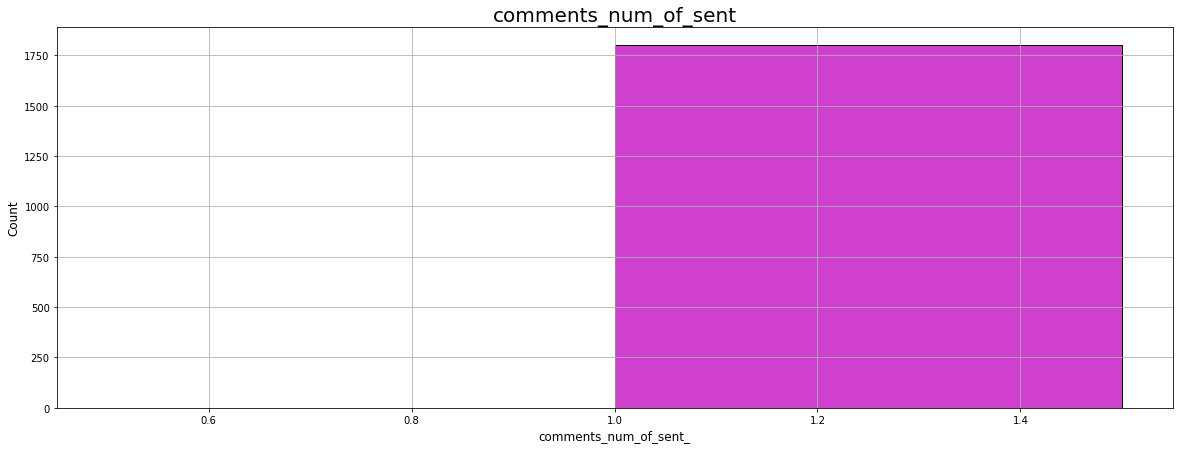

In [60]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_sent', fontsize=20)
sns.histplot(df['comments_num_of_sent_'], color='m', kde=False, bins=2);
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_sent_', fontsize=12)
plt.grid(True);

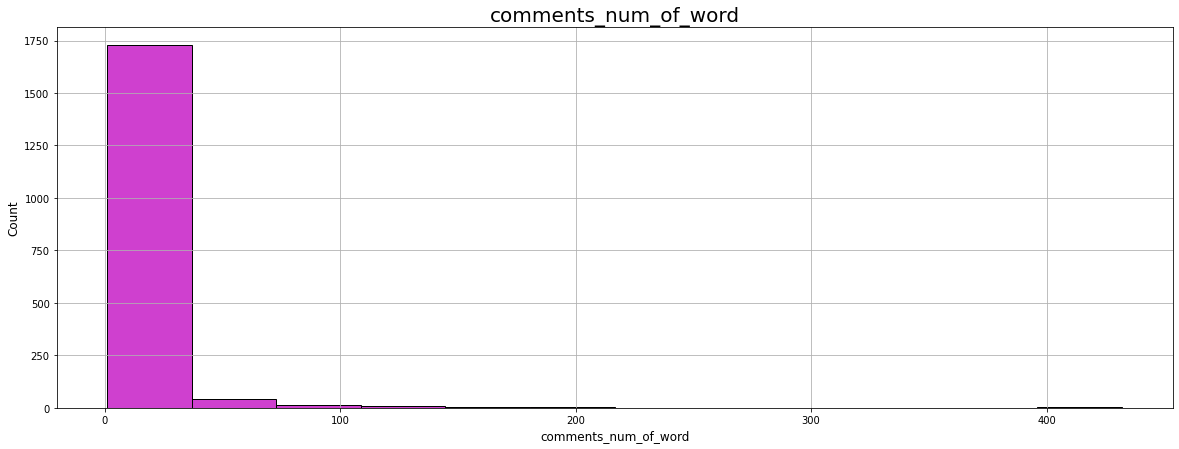

In [61]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_word', fontsize=20)
sns.histplot(df['comments_num_of_word'], color='m', kde=False);
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_word', fontsize=12)
plt.grid(True);

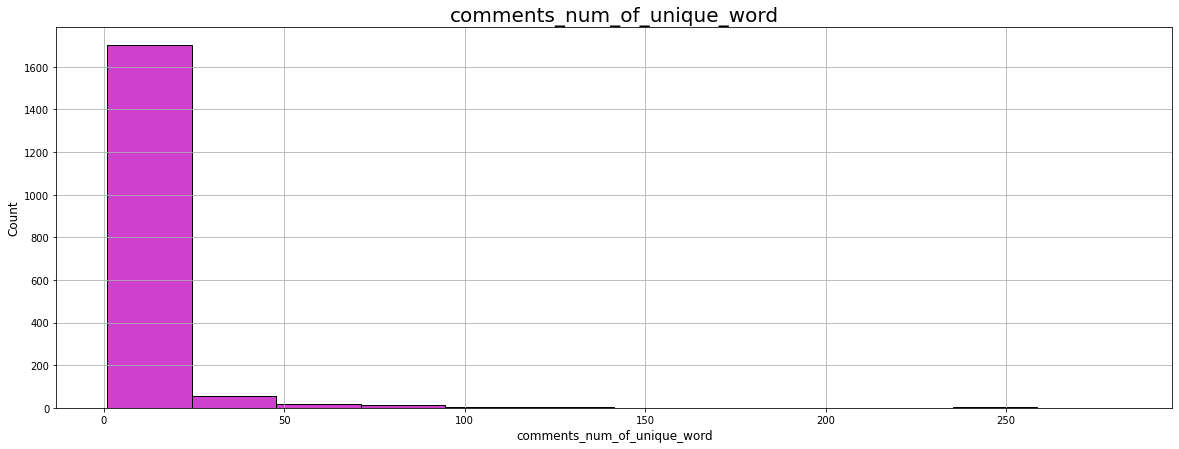

In [62]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_unique_word', fontsize=20)
sns.histplot(df['comments_num_of_unique_word'], color='m', kde=False);
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_unique_word', fontsize=12)
plt.grid(True);

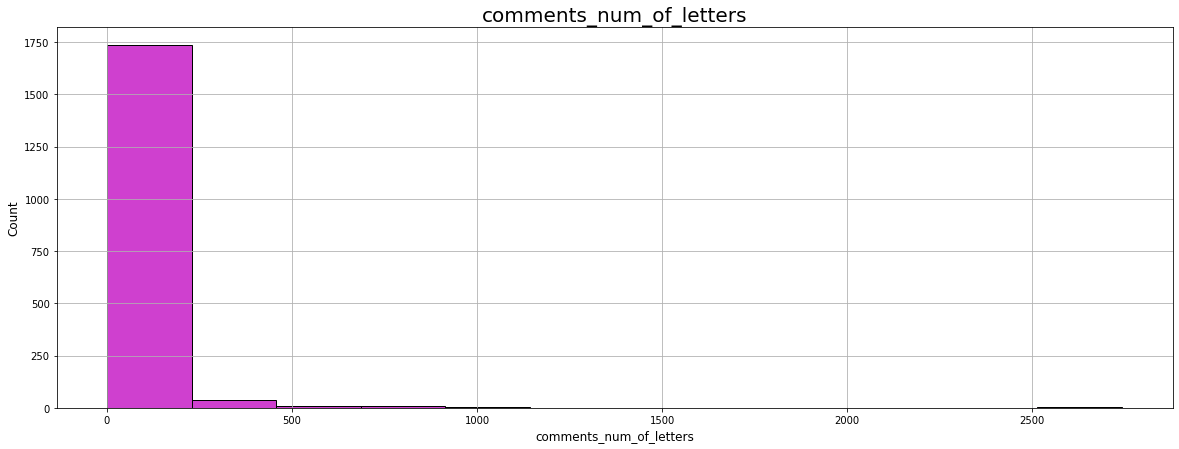

In [63]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_letters', fontsize=20)
sns.histplot(df['comments_num_of_letters'], color='m', kde=False);
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_letters', fontsize=12)
plt.grid(True);

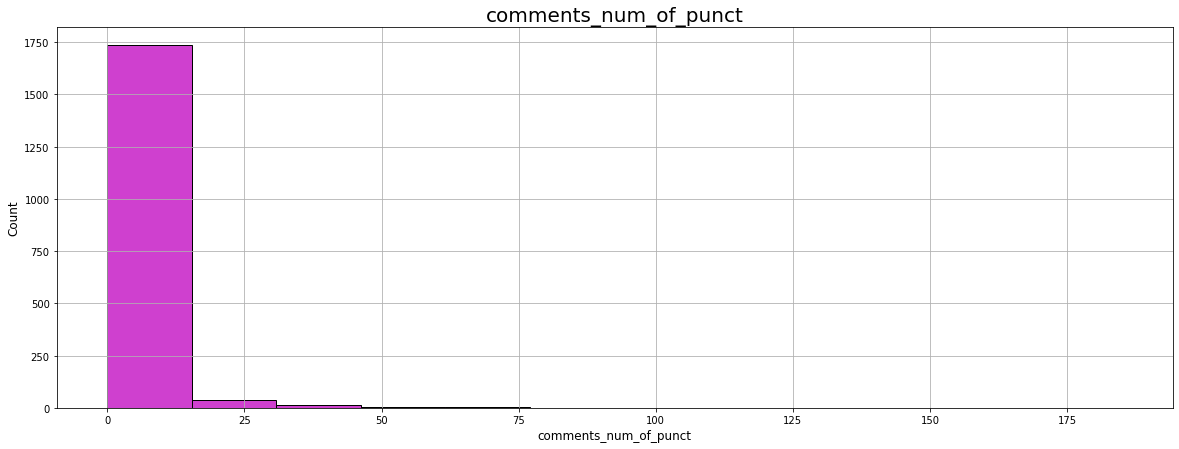

In [64]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_punct', fontsize=20)
sns.histplot(df['comments_num_of_punct'], color='m', kde=False);
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_punct', fontsize=12)
plt.grid(True);

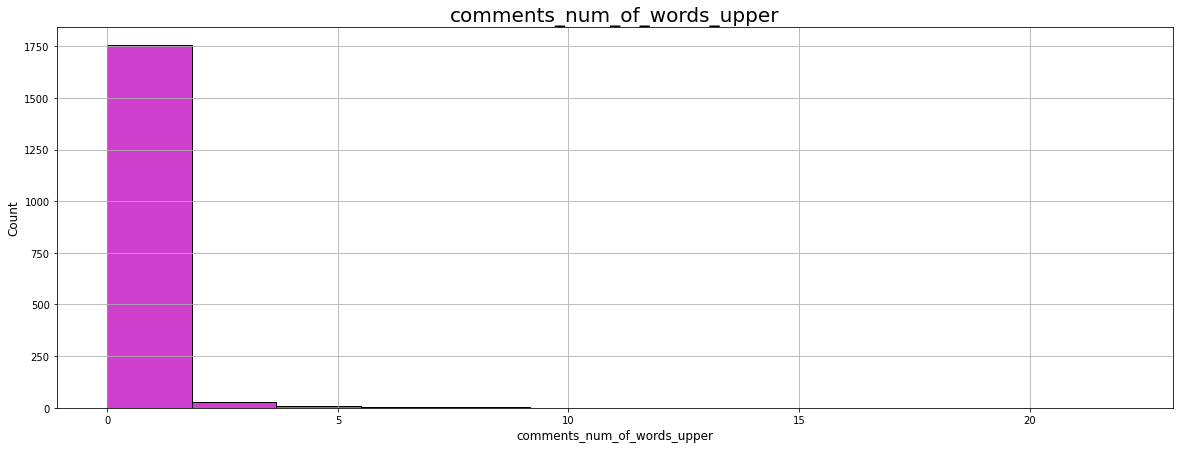

In [65]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_words_upper', fontsize=20)
sns.histplot(df['comments_num_of_words_upper'], color='m', kde=False);
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_words_upper', fontsize=12)
plt.grid(True);

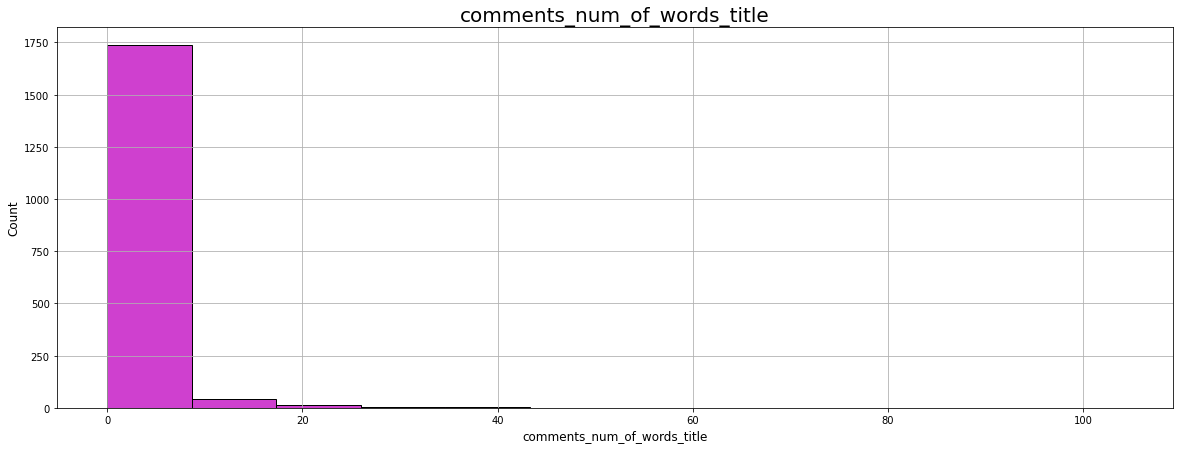

In [66]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_words_title', fontsize=20)
sns.histplot(df['comments_num_of_words_title'], color='m', kde=False);
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_words_title', fontsize=12)
plt.grid(True);

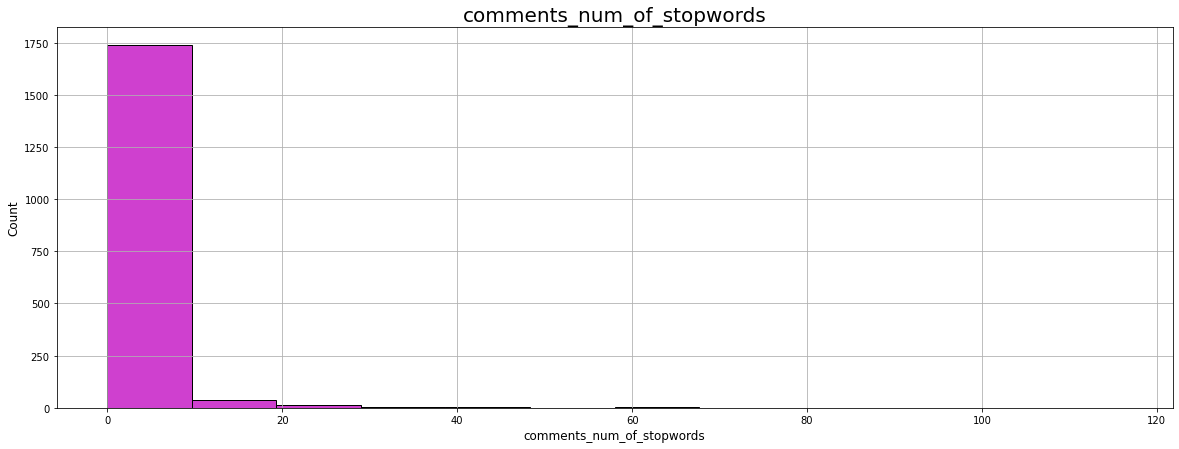

In [67]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_stopwords', fontsize=20)
sns.histplot(df['comments_num_of_stopwords'], color='m', kde=False);
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_stopwords', fontsize=12)
plt.grid(True);

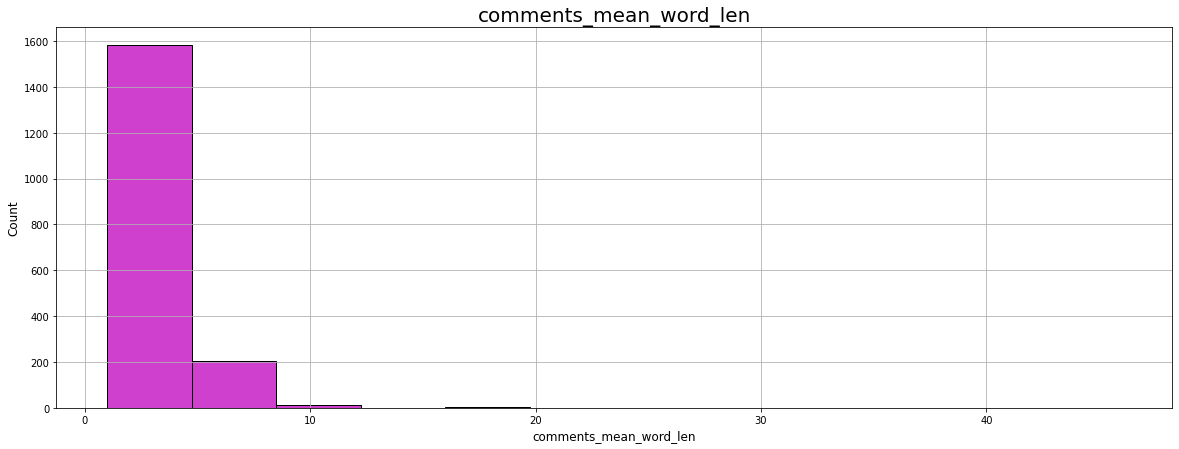

In [68]:
plt.figure(figsize=(20, 7))
plt.title('comments_mean_word_len', fontsize=20)
sns.histplot(df['comments_mean_word_len'], color='m', kde=False);
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_mean_word_len', fontsize=12)
plt.grid(True);

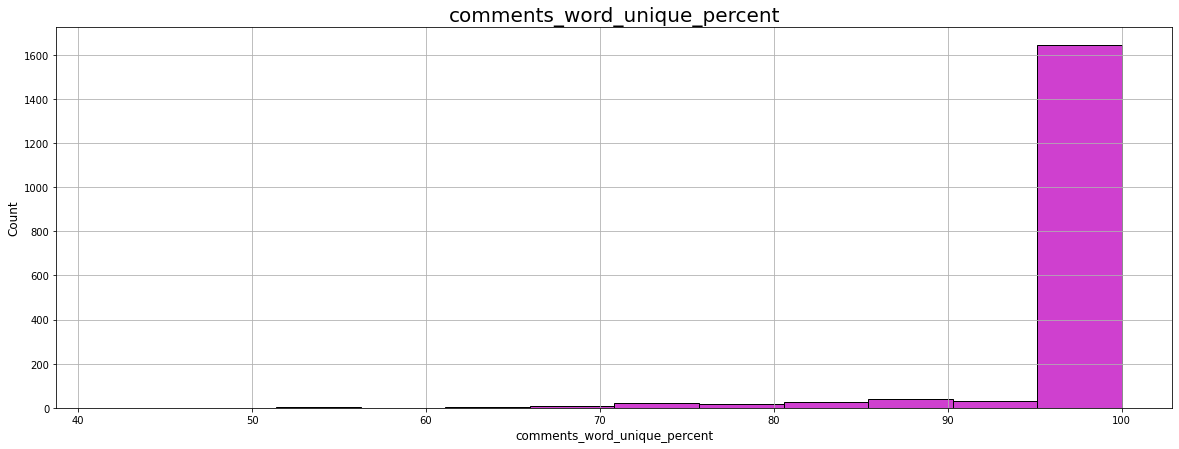

In [69]:
plt.figure(figsize=(20, 7))
plt.title('comments_word_unique_percent', fontsize=20)
sns.histplot(df['comments_word_unique_percent'], color='m', kde=False);
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_word_unique_percent', fontsize=12)
plt.grid(True);

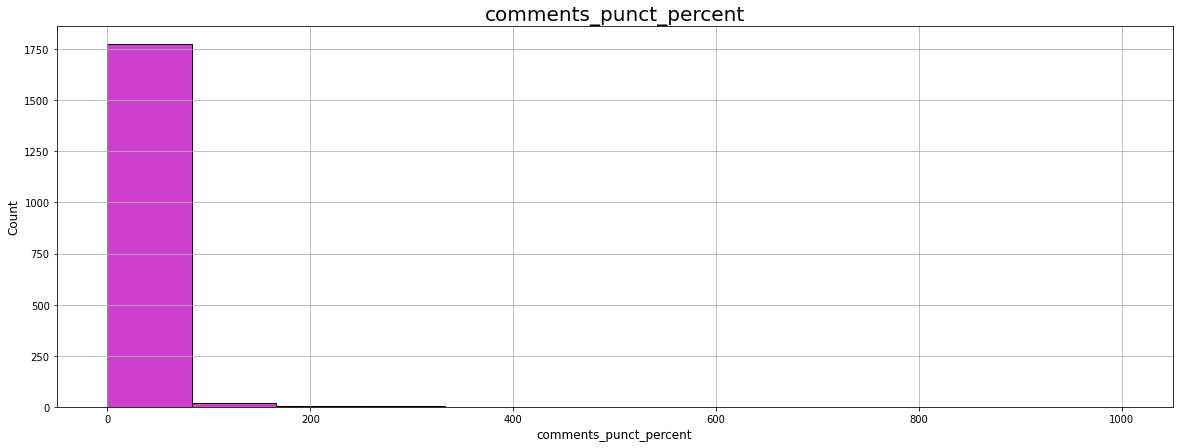

In [70]:
plt.figure(figsize=(20, 7))
plt.title('comments_punct_percent', fontsize=20)
sns.histplot(df['comments_punct_percent'], color='m', kde=False);
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_punct_percent', fontsize=12)
plt.grid(True);

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   from_id                       1800 non-null   int64  
 1   owner_id                      1800 non-null   int64  
 2   domain                        1800 non-null   object 
 3   date                          1800 non-null   object 
 4   text                          815 non-null    object 
 5   copy_text                     913 non-null    object 
 6   copy_date                     961 non-null    object 
 7   likes_count                   1800 non-null   int64  
 8   comments_count                1800 non-null   int64  
 9   reposts                       1800 non-null   int64  
 10  views                         1800 non-null   int64  
 11  likers                        1378 non-null   object 
 12  comments                      330 non-null    object 
 13  com

In [73]:
df.to_csv('df_full.csv', index = False)

## Предобработка

In [74]:
df = pd.read_csv('df_full.csv')

In [75]:
patterns = "[!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"

morph = pymorphy2.MorphAnalyzer()
def lemmatize(doc):
    j = ''
    doc = doc.lower()
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stop_words:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            tokens.append(token)
            j = ' '.join(tokens)
    
    return j

In [76]:
df['text'] = df['text'].fillna('0')

In [77]:
df['text'] = df['text'].apply(lemmatize)

In [78]:
df['copy_text'] = df['copy_text'].fillna('0')

In [79]:
df['copy_text'] = df['copy_text'].apply(lemmatize)

In [80]:
df['comments'] = df['comments'].fillna('0')

In [81]:
df['comments'] = df['comments'].apply(lemmatize)

In [82]:
df

from_id   owner_id                                     domain  \
0    -106097095 -106097095  https://vk.com/feed?w=wall-106097095_1001   
1    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_999   
2    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_998   
3    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_997   
4    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_996   
...         ...        ...                                        ...   
1795  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_381   
1796  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_380   
1797  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_378   
1798  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_377   
1799  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_376   

                     date                                               text  \
0     2022-10-10 05:20:00  наш коллега club535572 молодой парламентарий ю...   
1     2022-09-27 06:11:23                                                  0   
2     2022-09-22 12:17:36                                                  0   
3     2022-09-06 05:34:14                                                  0   
4     2022-08-31 06:13:48  отличный новость club35608492 молодой парламен...   
...                   ...                                                ...   
1795  2020-11-16 19:12:58                                                  0   
1796  2020-11-10 17:57:30                                                  0   
1797  2020-11-07 16:36:22                                                  0   
1798  2020-11-01 06:53:13                                                  0   
1799  2020-10-30 13:48:09                                                  0   

                                              copy_text            copy_date  \
0                                                     0                  NaN   
1     молодой парламентарий курганский область 10 го...  2022-09-27 04:45:00   
2     сегодня рамка проект «интерактивный встреча «к...  2022-09-16 11:00:03   
3     неделя назад получить президентский грант прод...  2022-09-06 05:24:04   
4                                                     0                  NaN   
...                                                 ...                  ...   
1795  акция бабушкин акануть участник михляева татья...  2020-11-16 15:00:28   
1796  линия судьба точка пересечение 💫 медвежий праз...  2020-11-10 10:00:03   
1797  акция бабушкин акануть участник фирсова ирина ...  2020-11-07 07:57:50   
1798  новосибирский этнограф показать интересный нах...  2020-11-01 05:00:08   
1799  art challenge день 29 тема обувь экспонатыкото...  2020-10-29 17:29:43   

      likes_count  comments_count  reposts  ...  comments_num_of_word  \
0              20               0        1  ...                     1   
1              10               0        1  ...                     1   
2               1               0        1  ...                     1   
3              15               0        0  ...                     1   
4              39               0        3  ...                     1   
...           ...             ...      ...  ...                   ...   
1795            3               0        0  ...                     1   
1796            9               0        3  ...                     1   
1797            4               0        0  ...                     1   
1798            7               0        0  ...                     1   
1799            2               0        0  ...                     1   

     comments_num_of_unique_word comments_num_of_letters  \
0                              1                       3   
1                              1                       3   
2                              1                       3   
3                              1                       3   
4                              1

In [83]:
df.to_csv('df_lemm.csv', index = False)

In [84]:
df = pd.read_csv('df_lemm.csv')

In [85]:
df

from_id   owner_id                                     domain  \
0    -106097095 -106097095  https://vk.com/feed?w=wall-106097095_1001   
1    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_999   
2    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_998   
3    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_997   
4    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_996   
...         ...        ...                                        ...   
1795  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_381   
1796  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_380   
1797  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_378   
1798  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_377   
1799  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_376   

                     date                                               text  \
0     2022-10-10 05:20:00  наш коллега club535572 молодой парламентарий ю...   
1     2022-09-27 06:11:23                                                  0   
2     2022-09-22 12:17:36                                                  0   
3     2022-09-06 05:34:14                                                  0   
4     2022-08-31 06:13:48  отличный новость club35608492 молодой парламен...   
...                   ...                                                ...   
1795  2020-11-16 19:12:58                                                  0   
1796  2020-11-10 17:57:30                                                  0   
1797  2020-11-07 16:36:22                                                  0   
1798  2020-11-01 06:53:13                                                  0   
1799  2020-10-30 13:48:09                                                  0   

                                              copy_text            copy_date  \
0                                                     0                  NaN   
1     молодой парламентарий курганский область 10 го...  2022-09-27 04:45:00   
2     сегодня рамка проект «интерактивный встреча «к...  2022-09-16 11:00:03   
3     неделя назад получить президентский грант прод...  2022-09-06 05:24:04   
4                                                     0                  NaN   
...                                                 ...                  ...   
1795  акция бабушкин акануть участник михляева татья...  2020-11-16 15:00:28   
1796  линия судьба точка пересечение 💫 медвежий праз...  2020-11-10 10:00:03   
1797  акция бабушкин акануть участник фирсова ирина ...  2020-11-07 07:57:50   
1798  новосибирский этнограф показать интересный нах...  2020-11-01 05:00:08   
1799  art challenge день 29 тема обувь экспонатыкото...  2020-10-29 17:29:43   

      likes_count  comments_count  reposts  ...  comments_num_of_word  \
0              20               0        1  ...                     1   
1              10               0        1  ...                     1   
2               1               0        1  ...                     1   
3              15               0        0  ...                     1   
4              39               0        3  ...                     1   
...           ...             ...      ...  ...                   ...   
1795            3               0        0  ...                     1   
1796            9               0        3  ...                     1   
1797            4               0        0  ...                     1   
1798            7               0        0  ...                     1   
1799            2               0        0  ...                     1   

     comments_num_of_unique_word comments_num_of_letters  \
0                              1                       3   
1                              1                       3   
2                              1                       3   
3                              1                       3   
4                              1

## Topic modeling

### Text

In [86]:
df_text = df[df['text'] != '0']

In [87]:
df_text = df_text.reset_index(drop=True)

In [88]:
df_text

from_id   owner_id                                     domain  \
0   -106097095 -106097095  https://vk.com/feed?w=wall-106097095_1001   
1   -106097095 -106097095   https://vk.com/feed?w=wall-106097095_996   
2   -106097095 -106097095   https://vk.com/feed?w=wall-106097095_995   
3   -106097095 -106097095   https://vk.com/feed?w=wall-106097095_992   
4   -106097095 -106097095   https://vk.com/feed?w=wall-106097095_985   
..         ...        ...                                        ...   
810  414800119   -9239445    https://vk.com/feed?w=wall-9239445_1889   
811  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_498   
812  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_497   
813  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_461   
814  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_415   

                    date                                               text  \
0    2022-10-10 05:20:00  наш коллега club535572 молодой парламентарий ю...   
1    2022-08-31 06:13:48  отличный новость club35608492 молодой парламен...   
2    2022-07-14 07:21:59  приглашение коллега принять участие акция цель...   
3    2022-07-05 06:07:26  5 июль 1943 год начаться курский битва наш зем...   
4    2022-05-12 09:05:15  друг фонд президентский грант проводить оценка...   
..                   ...                                                ...   
810  2021-04-29 10:29:17  здравствуйте студентка направление социально э...   
811  2022-09-18 04:51:09           березовский районный краеведческий музей   
812  2022-08-20 08:30:09  дмитриев садовник г ваха тобольск весь сибирь ...   
813  2022-01-12 12:43:54  богордаев женский праздничный костюм хант манс...   
814  2021-03-23 10:18:28  манжета вероятно верхний часть шуба сшить мех ...   

                         copy_text            copy_date  likes_count  \
0                                0                  NaN           20   
1                                0                  NaN           39   
2                                0                  NaN            3   
3                                0                  NaN           22   
4                                0                  NaN            4   
..                             ...                  ...          ...   
810                              0                  NaN            1   
811                              0                  NaN            3   
812  альманах тобольск весь сибирь  2022-08-20 06:39:07            0   
813                              0                  NaN           39   
814                              0                  NaN           14   

     comments_count  reposts  ...  comments_num_of_word  \
0                 0        1  ...                     1   
1                 0        3  ...                     1   
2                 0        0  ...                     1   
3                 0        2  ...                     1   
4                 0        2  ...                     1   
..              ...      ...  ...                   ...   
810               0        0  ...                     1   
811               0        0  ...                     1   
812               0        0  ...                     1   
813               0       22  ...                     1   
814               0        6  ...                     1   

    comments_num_of_unique_word comments_num_of_letters comments_num_of_punct  \
0                             1                       3                     0   
1                             1                       3                     0   
2                             1                       3                     0   
3                             1                       3                     0   
4                             1                       3                     0   
..                          ...                     ...                   ...   
810                           1                     

In [89]:
count_vect = CountVectorizer()
doc_term_matrix = count_vect.fit_transform(df_text['text'].values.astype('U'))

In [90]:
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [91]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 30 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 30 words for topic #0:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['требоваться', 'звонить', 'продать', 'сало', 'гос', 'приобретение', '2000', 'первый', 'сайт', 'деньга', 'поставщик', 'исключать', '2004', 'квадратный', 'метр', 'компания', 'населить', 'недвижимость', 'наш', 'последний', '3х', 'пункт', 'ваш', 'дом', 'квартира', 'постройка', 'год', 'менее', 'ранее', 'этаж']


Top 30 words for topic #1:
['человек', 'шурышкарский', 'новый', 'центр', 'ru', 'культурный', 'соревнование', 'округ', 'участник', 'свой', 'друг', 'команда', 'участие', 'место', 'турнир', 'https', 'мансийский', 'культура', 'проект', 'наш', 'который', 'год', 'народ', 'день', 'район', 'игра', 'югра', 'нумас', 'юнт', 'хант']


Top 30 words for topic #2:
['постоянный', 'тело', 'гыть', 'хантымансимир', 'югра', 'малочисленный', 'северный', 'са', 'vk', 'материал', 'be', 'youtu', 'com', 'ва', 'коренной', 'хо', 'та', 'ссылка', 'район', 'цена', 'хант', 'сайт', 'ос', 'народ', 'khanty', 'yasang', 'год', 'ru', 'ма', 'https']


Top 30 words for topic #3:
['хатӆ', 'уна', 'верот', 'искать', 'ус', '

Эмпирическим путём было установлено, что наиболее осмысленном получается деление на 5 тем:

1. Посты, связанные с куплей-продажой 
2. Посты, связанные с соревнованиями, конкурсами, культурой
3. Посты, связанные с публикацией материалов о народе на каком-то сайте
4. Посты на хантыйском языке, которые в будущих исследованиях нужно будет проанализировать отдельно, поскольку с ними модель работает плохо
5. Посты, связанные с обычной жизнью, повседневными делами

In [92]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape


(815, 5)

In [93]:
df_text['Topic'] = topic_values.argmax(axis=1)

In [94]:
df_text['Topic'].value_counts()

4    265
1    253
2    153
3     87
0     57
Name: Topic, dtype: int64

Градация количества постов по каждой теме следующая:
* повседневная жизнь (265) > конкурсы (253) > публикации (153) > хантыйский (87) > купля-продажа (57)

In [95]:
df_text.to_csv('df_text.csv', index = False)

#### Графики

In [96]:
df_text = pd.read_csv('df_text.csv')

In [97]:
df_text

from_id   owner_id                                     domain  \
0   -106097095 -106097095  https://vk.com/feed?w=wall-106097095_1001   
1   -106097095 -106097095   https://vk.com/feed?w=wall-106097095_996   
2   -106097095 -106097095   https://vk.com/feed?w=wall-106097095_995   
3   -106097095 -106097095   https://vk.com/feed?w=wall-106097095_992   
4   -106097095 -106097095   https://vk.com/feed?w=wall-106097095_985   
..         ...        ...                                        ...   
810  414800119   -9239445    https://vk.com/feed?w=wall-9239445_1889   
811  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_498   
812  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_497   
813  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_461   
814  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_415   

                    date                                               text  \
0    2022-10-10 05:20:00  наш коллега club535572 молодой парламентарий ю...   
1    2022-08-31 06:13:48  отличный новость club35608492 молодой парламен...   
2    2022-07-14 07:21:59  приглашение коллега принять участие акция цель...   
3    2022-07-05 06:07:26  5 июль 1943 год начаться курский битва наш зем...   
4    2022-05-12 09:05:15  друг фонд президентский грант проводить оценка...   
..                   ...                                                ...   
810  2021-04-29 10:29:17  здравствуйте студентка направление социально э...   
811  2022-09-18 04:51:09           березовский районный краеведческий музей   
812  2022-08-20 08:30:09  дмитриев садовник г ваха тобольск весь сибирь ...   
813  2022-01-12 12:43:54  богордаев женский праздничный костюм хант манс...   
814  2021-03-23 10:18:28  манжета вероятно верхний часть шуба сшить мех ...   

                         copy_text            copy_date  likes_count  \
0                                0                  NaN           20   
1                                0                  NaN           39   
2                                0                  NaN            3   
3                                0                  NaN           22   
4                                0                  NaN            4   
..                             ...                  ...          ...   
810                              0                  NaN            1   
811                              0                  NaN            3   
812  альманах тобольск весь сибирь  2022-08-20 06:39:07            0   
813                              0                  NaN           39   
814                              0                  NaN           14   

     comments_count  reposts  ...  comments_num_of_unique_word  \
0                 0        1  ...                            1   
1                 0        3  ...                            1   
2                 0        0  ...                            1   
3                 0        2  ...                            1   
4                 0        2  ...                            1   
..              ...      ...  ...                          ...   
810               0        0  ...                            1   
811               0        0  ...                            1   
812               0        0  ...                            1   
813               0       22  ...                            1   
814               0        6  ...                            1   

    comments_num_of_letters comments_num_of_punct comments_num_of_words_upper  \
0                         3                     0                           0   
1                         3                     0                           0   
2                         3                     0                           0   
3                         3                     0                           0   
4                         3                     0                           0   
..                      ...                   ...

Посмотрим в зависимости от темы разные показатели

In [98]:
df_text_0 = df_text[df_text['Topic'] == 0]

In [99]:
df_text_1 = df_text[df_text['Topic'] == 1]

In [100]:
df_text_2 = df_text[df_text['Topic'] == 2]

In [101]:
df_text_3 = df_text[df_text['Topic'] == 3]

In [102]:
df_text_4 = df_text[df_text['Topic'] == 4]

##### Гистограммы

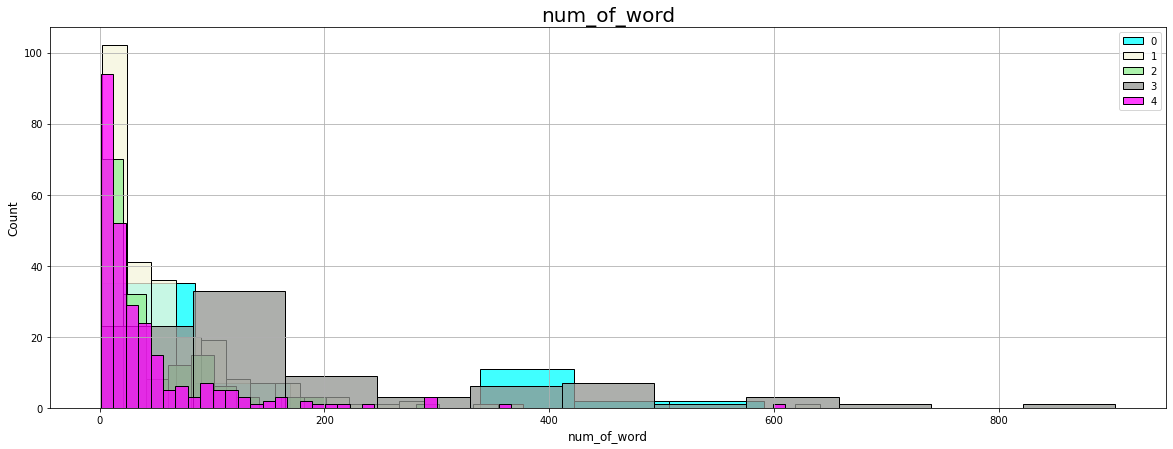

In [104]:
plt.figure(figsize=(20, 7))
plt.title('num_of_word', fontsize=20)
sns.histplot(df_text_0['num_of_word'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_text_1['num_of_word'], color='#F5F5DC', kde=False, label='1');
sns.histplot(df_text_2['num_of_word'], color='#90EE90', kde=False, label='2');
sns.histplot(df_text_3['num_of_word'], color='#929591', kde=False, label='3');
sns.histplot(df_text_4['num_of_word'], color='#FF00FF', kde=False, label='4');
plt.ylabel('Count', fontsize=12)
plt.xlabel('num_of_word', fontsize=12)
plt.legend()

plt.grid(True);

In [105]:
fig = px.histogram(df_text, x="num_of_word", color="Topic")
fig.show()

В целом, данные по количеству слов для каждой темы распределены схожим образом. Значителное количество постов имеет меньше 100 слов, причём пик приходится на значение от 0 до 19 слов в каждой теме. 

Разница в выбросах. 
* В теме купли-продажи есть пик около 400 слов, а наибольшая длина поста от 580 до 599 слов. 
* В теме с конкурсами в целом большинство постов меньше 200 слов, максимальная длина - от 640 до 659
* В теме с публикациями выбросов особо нет, максимальная длина поста от 300 до 319 слов
* В теме с хантыйскими словами встречается пик от 100 до 119 слов, максимальная длина поста больше 900 слов
* В теме с повседневной жизнью выбросов особо нет, максимальная длина поста от 600 до 619 слов

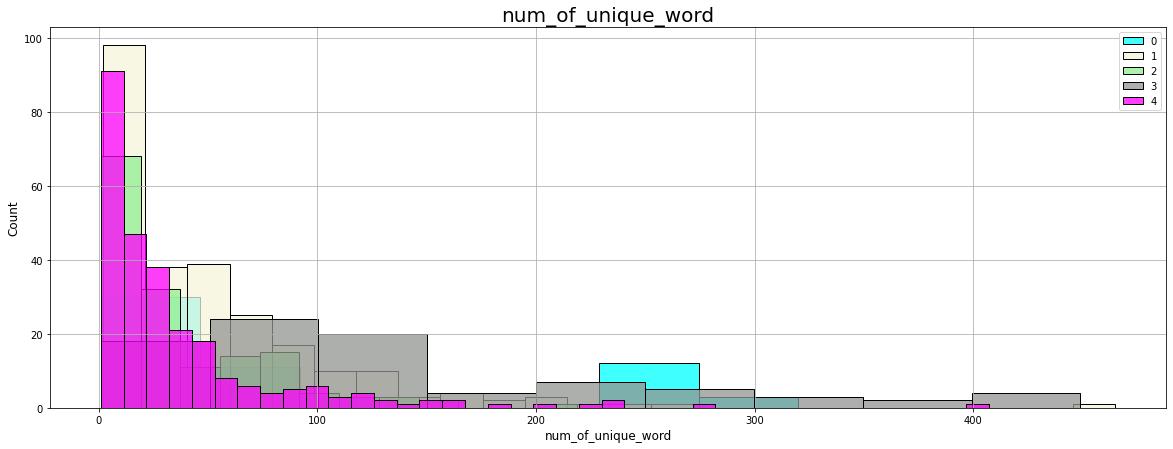

In [106]:
plt.figure(figsize=(20, 7))
plt.title('num_of_unique_word', fontsize=20)
sns.histplot(df_text_0['num_of_unique_word'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_text_1['num_of_unique_word'], color='#F5F5DC', kde=False, label='1');
sns.histplot(df_text_2['num_of_unique_word'], color='#90EE90', kde=False, label='2');
sns.histplot(df_text_3['num_of_unique_word'], color='#929591', kde=False, label='3');
sns.histplot(df_text_4['num_of_unique_word'], color='#FF00FF', kde=False, label='4');
plt.ylabel('Count', fontsize=12)
plt.xlabel('num_of_unique_word', fontsize=12)
plt.legend()

plt.grid(True);

In [107]:
fig = px.histogram(df_text, x="num_of_unique_word", color="Topic")
fig.show()

По уникальным словам мы видим схожую картину с распределениям по обычным словам по темам, только снижаются пики

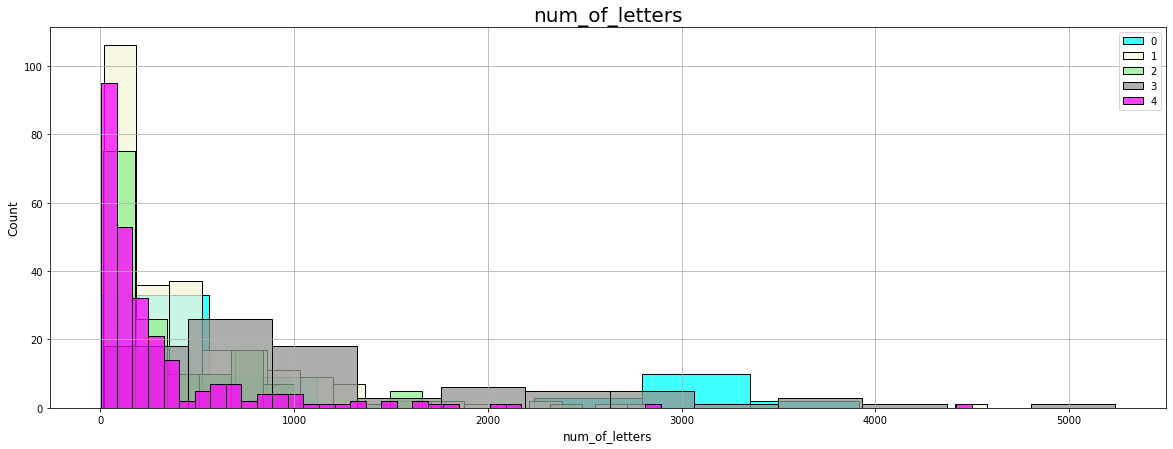

In [108]:
plt.figure(figsize=(20, 7))
plt.title('num_of_letters', fontsize=20)
sns.histplot(df_text_0['num_of_letters'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_text_1['num_of_letters'], color='#F5F5DC', kde=False, label='1');
sns.histplot(df_text_2['num_of_letters'], color='#90EE90', kde=False, label='2');
sns.histplot(df_text_3['num_of_letters'], color='#929591', kde=False, label='3');
sns.histplot(df_text_4['num_of_letters'], color='#FF00FF', kde=False, label='4');
plt.ylabel('Count', fontsize=12)
plt.xlabel('num_of_letters', fontsize=12)
plt.legend()

plt.grid(True);

In [109]:
fig = px.histogram(df_text, x="num_of_letters", color="Topic")
fig.show()

По количеству букв ситуация не сильно отличается. 
 * для темы про куплю-продпжу помимо пика от 0 до 99, есть пик в районе 2800 букв, максимальное значение - более 3900
 * для темы про конкурсы распределение аналогично распределению со словами, максимальная длина поста - выше 4500 букв
 * для темы с публикациями ситуация аналогичная, максимальная длина поста выше 2400 букв
 * для темы с хантыйским наибольшая длина поста выше 5200 букв
 * для темы с повседневностью наибольшая длина поста выше 4400 букв

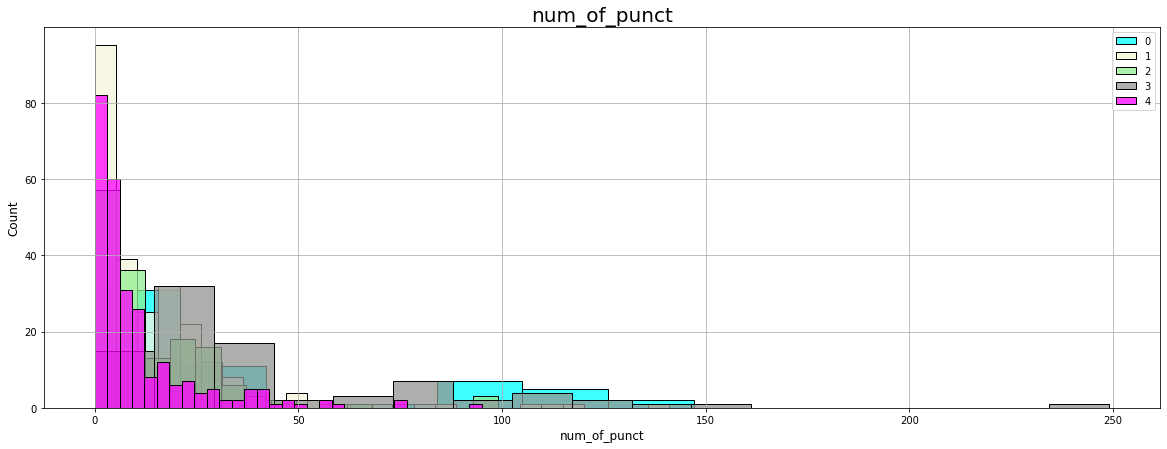

In [110]:
plt.figure(figsize=(20, 7))
plt.title('num_of_punct', fontsize=20)
sns.histplot(df_text_0['num_of_punct'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_text_1['num_of_punct'], color='#F5F5DC', kde=False, label='1');
sns.histplot(df_text_2['num_of_punct'], color='#90EE90', kde=False, label='2');
sns.histplot(df_text_3['num_of_punct'], color='#929591', kde=False, label='3');
sns.histplot(df_text_4['num_of_punct'], color='#FF00FF', kde=False, label='4');
plt.ylabel('Count', fontsize=12)
plt.xlabel('num_of_punct', fontsize=12)
plt.legend()

plt.grid(True);

In [111]:
fig = px.histogram(df_text, x="num_of_punct", color="Topic")
fig.show()

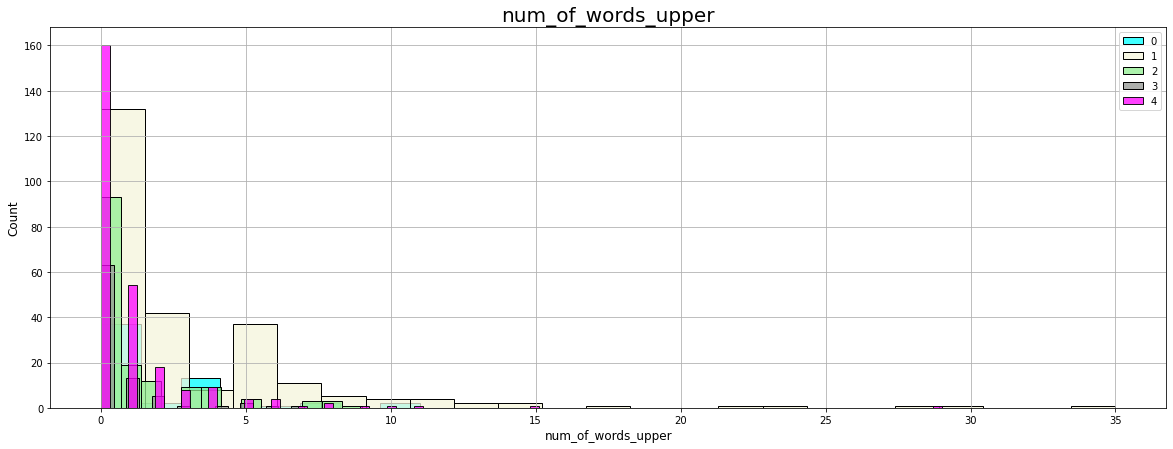

In [112]:
plt.figure(figsize=(20, 7))
plt.title('num_of_words_upper', fontsize=20)
sns.histplot(df_text_0['num_of_words_upper'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_text_1['num_of_words_upper'], color='#F5F5DC', kde=False, label='1');
sns.histplot(df_text_2['num_of_words_upper'], color='#90EE90', kde=False, label='2');
sns.histplot(df_text_3['num_of_words_upper'], color='#929591', kde=False, label='3');
sns.histplot(df_text_4['num_of_words_upper'], color='#FF00FF', kde=False, label='4');
plt.ylabel('Count', fontsize=12)
plt.xlabel('num_of_words_upper', fontsize=12)
plt.legend()

plt.grid(True);

In [113]:
fig = px.histogram(df_text, x="num_of_words_upper", color="Topic")
fig.show()

* В теме с куплей продажей максимальное количество слов капсом в одном посте 11
* В теме с конкурсами есть выбросы, где капсом написаны 18, 22, 24, 30 слов, максимальное количество слов капсом в одном посте 35
* В теме про публикации очень мало слов капсом
* В теме про хантыйский тоже
* В теме про повседневность встречаются выбросы - в посте может быть 15 слов, написанных капсом или даже 29

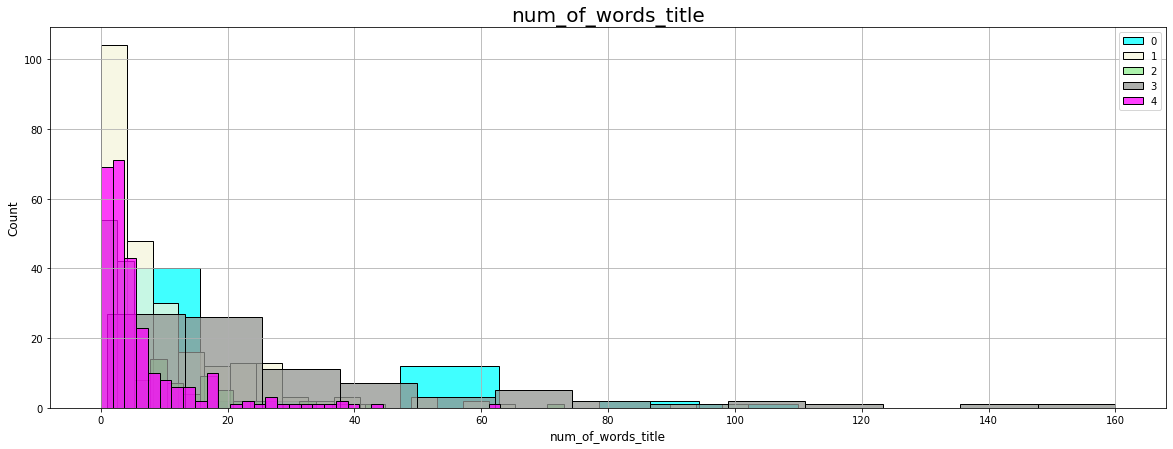

In [114]:
plt.figure(figsize=(20, 7))
plt.title('num_of_words_title', fontsize=20)
sns.histplot(df_text_0['num_of_words_title'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_text_1['num_of_words_title'], color='#F5F5DC', kde=False, label='1');
sns.histplot(df_text_2['num_of_words_title'], color='#90EE90', kde=False, label='2');
sns.histplot(df_text_3['num_of_words_title'], color='#929591', kde=False, label='3');
sns.histplot(df_text_4['num_of_words_title'], color='#FF00FF', kde=False, label='4');
plt.ylabel('Count', fontsize=12)
plt.xlabel('num_of_words_title', fontsize=12)
plt.legend()

plt.grid(True);

In [115]:
fig = px.histogram(df_text, x="num_of_words_title", color="Topic")
fig.show()

Интересных особенностей обнаружено не было

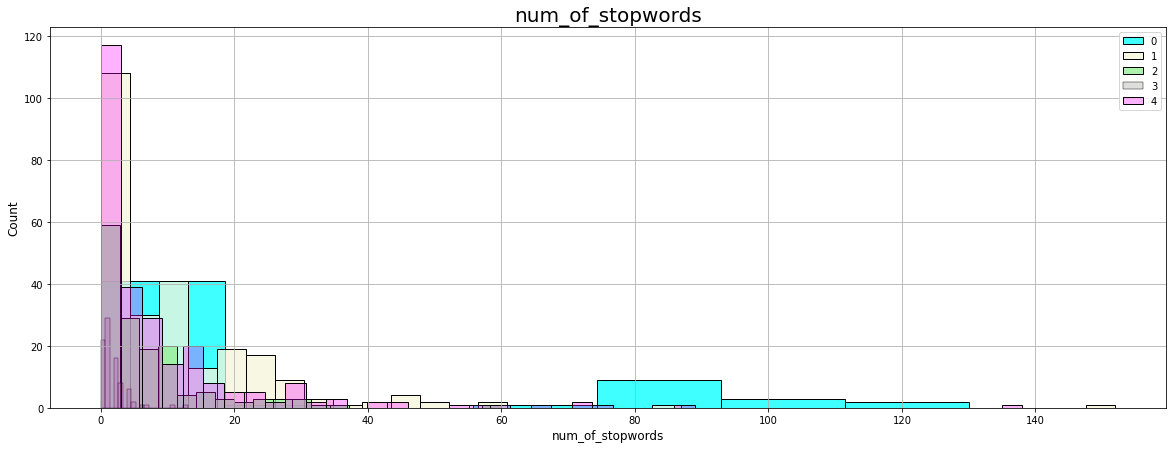

In [116]:
plt.figure(figsize=(20, 7))
plt.title('num_of_stopwords', fontsize=20)
sns.histplot(df_text_0['num_of_stopwords'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_text_1['num_of_stopwords'], color='#F5F5DC', kde=False, label='1');
sns.histplot(df_text_2['num_of_stopwords'], color='#90EE90', kde=False, label='2');
sns.histplot(df_text_3['num_of_stopwords'], color='#929591', alpha=0.3, kde=False, label='3');
sns.histplot(df_text_4['num_of_stopwords'], color='#FF00FF', alpha=0.3, kde=False, label='4');
plt.ylabel('Count', fontsize=12)
plt.xlabel('num_of_stopwords', fontsize=12)
plt.legend()

plt.grid(True);

In [117]:
fig = px.histogram(df_text, x="num_of_stopwords", color="Topic")
fig.show()

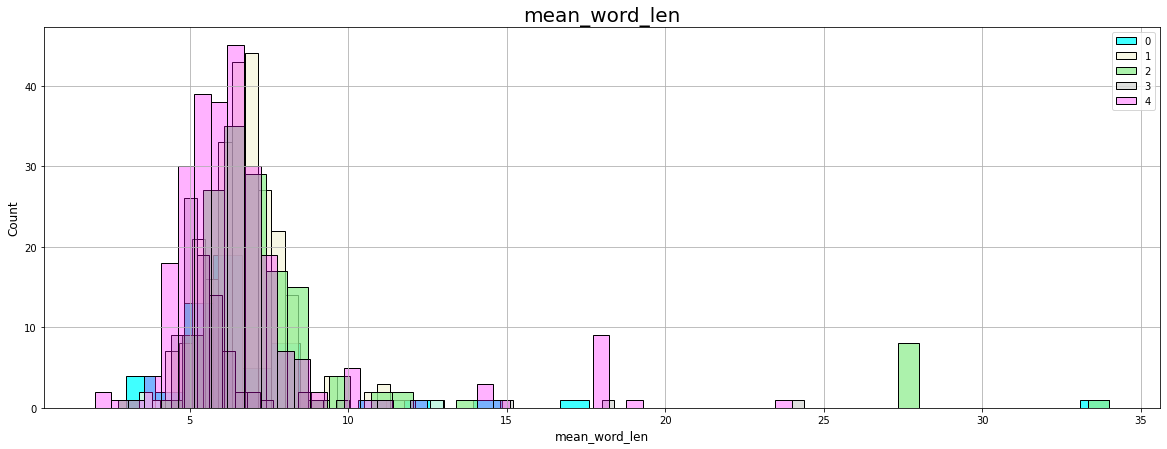

In [118]:
plt.figure(figsize=(20, 7))
plt.title('mean_word_len', fontsize=20)
sns.histplot(df_text_0['mean_word_len'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_text_1['mean_word_len'], color='#F5F5DC', kde=False, label='1');
sns.histplot(df_text_2['mean_word_len'], color='#90EE90', kde=False, label='2');
sns.histplot(df_text_3['mean_word_len'], color='#929591', alpha=0.3, kde=False, label='3');
sns.histplot(df_text_4['mean_word_len'], color='#FF00FF', alpha=0.3, kde=False, label='4');
plt.ylabel('Count', fontsize=12)
plt.xlabel('mean_word_len', fontsize=12)
plt.legend()

plt.grid(True);

In [119]:
fig = px.histogram(df_text, x="mean_word_len", color="Topic")
fig.show()

Видим, что в среднем, для описания постов с конкурсами используются более короткие слова, чем для описания постов с публикациями. Хантыйские слова в среднем короче. А наиболее длинные слова используются для описания купли-продажи и рассказов о публикациях.

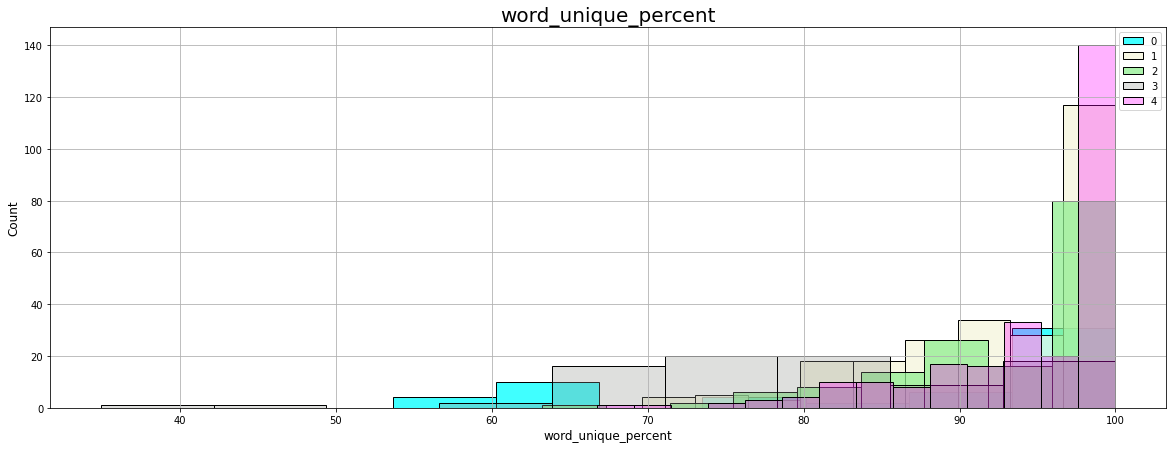

In [120]:
plt.figure(figsize=(20, 7))
plt.title('word_unique_percent', fontsize=20)
sns.histplot(df_text_0['word_unique_percent'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_text_1['word_unique_percent'], color='#F5F5DC', kde=False, label='1');
sns.histplot(df_text_2['word_unique_percent'], color='#90EE90', kde=False, label='2');
sns.histplot(df_text_3['word_unique_percent'], color='#929591', alpha=0.3, kde=False, label='3');
sns.histplot(df_text_4['word_unique_percent'], color='#FF00FF', alpha=0.3, kde=False, label='4');
plt.ylabel('Count', fontsize=12)
plt.xlabel('word_unique_percent', fontsize=12)
plt.legend()

plt.grid(True);

In [121]:
fig = px.histogram(df_text, x="word_unique_percent", color="Topic")
fig.show()

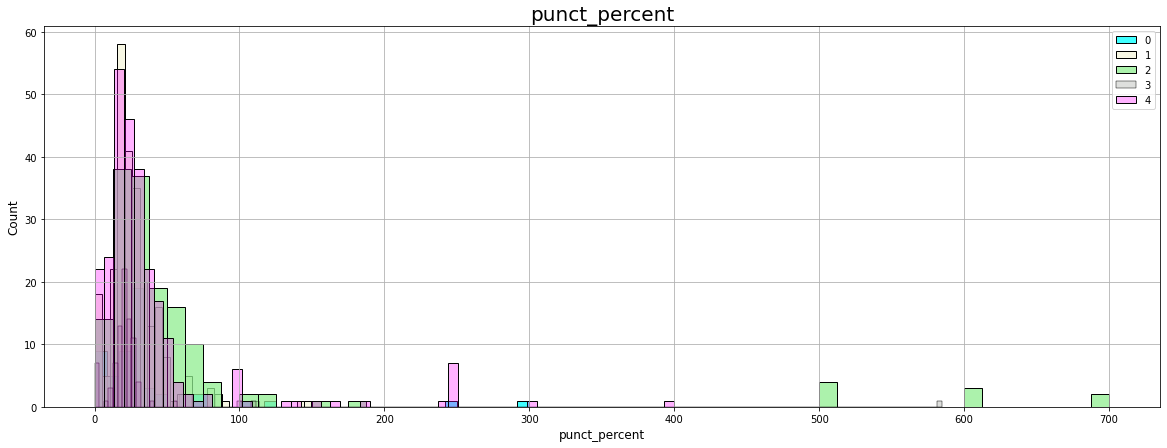

In [122]:
plt.figure(figsize=(20, 7))
plt.title('punct_percent', fontsize=20)
sns.histplot(df_text_0['punct_percent'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_text_1['punct_percent'], color='#F5F5DC', kde=False, label='1');
sns.histplot(df_text_2['punct_percent'], color='#90EE90', kde=False, label='2');
sns.histplot(df_text_3['punct_percent'], color='#929591', alpha=0.3, kde=False, label='3');
sns.histplot(df_text_4['punct_percent'], color='#FF00FF', alpha=0.3, kde=False, label='4');
plt.ylabel('Count', fontsize=12)
plt.xlabel('punct_percent', fontsize=12)
plt.legend()

plt.grid(True);

In [123]:
fig = px.histogram(df_text, x="punct_percent", color="Topic")
fig.show()

##### Word Cloud

###### Группа 0

In [124]:
df_text_0['text']

0      наш коллега club535572 молодой парламентарий ю...
36                             инь ян драться бешенный 🥵
52     включать полноэкранный режим наслаждаться 🔥 мы...
69     помнить мужичок вонтко 🤣мельница говорить сделать
70                         погнать олень далеко горизонт
89     оленина казан костёр ссылка видео https youtu ...
257    имя владимир волдин войти википедия день сайт ...
272    ✒ хутысый айкеӆӑт ӑкӑтта айӆат ёх пиӆ рәпитта ...
273    📢 правительство югра планировать капитальный р...
277    ✒ арсыр кӑнуть мәшӑт эвӑӆт прививка вєрот мосӆ...
306    ✒ ама яныга ащо̄йка ос яныга ане̄ква па̄влэ̄н ...
314    📢 октябрьский район завершиться первый этап ка...
324    ✒ кӑт щурӑскєм вўӆ ӆавӑӆ щи оӆӑӊӑн мўвтєӆ мир ...
332    ✒ карка айӆат хә югра мўвевна ар айӆат хуить в...
337    ✒ «ӆыӆӑӊ союм» 15 оӆа йис ветхущъяӊ оӆ юхӆ щит...
367         🌲🌲🌲остяк сирелиус точно служить тот царь 🌲🌲🌲
375                        🌲🌲🌲с северный ветер шутить🌲🌲🌲
379                            

In [125]:
text0_as_str = ''

In [126]:
for index, row in df_text_0.iterrows(): 
    text0_as_str = text0_as_str + str(row['text']) + ' '

При помощи регулярных выражений удалим лишние символы


In [127]:
text0_as_str = re.sub('[,—\'\[\]]', '', text0_as_str)
text0_as_str

'наш коллега club535572 молодой парламентарий югра участвовать создание короткометражный художественный фильм герой великий отечественный война молодёжный парламент дума югра совместно «центр развитие парламентаризм проектный деятельность общественный инициатив» вести производство короткометражный художественный фильм «по приказ совести» рамка проект «северный фронт дойти победа » фильм выстраиваться история герой великий отечественный война хант мансийский автономный округ – югра создаваться реконструкция подвиг помощь актёр привлечение волонтёр основа короткометражный художественный фильм лежать два история земляк – гавриил епифанович собянин николай дмитриевич мултановый гавриил собянин родиться 25 май 1896 год деревня шайтановка чердынский уезд пермский область 1918 год семья переехать постоянный место жительство берёзовский район омский ныне тюменский область 1914 1916 год гавриил епифанович участвовать i мировой война начаться великий отечественный война август 1942 год уйти добр

Составим "словарь" из 50 наиболее частотных слов


In [128]:
text0_tokens = word_tokenize(text0_as_str)
text0_text = nltk.Text(text0_tokens)
fdist_text0 = FreqDist(text0_text)
fdist_text0_most_c = fdist_text0.most_common(50)

Визуализируем облако частотных слов


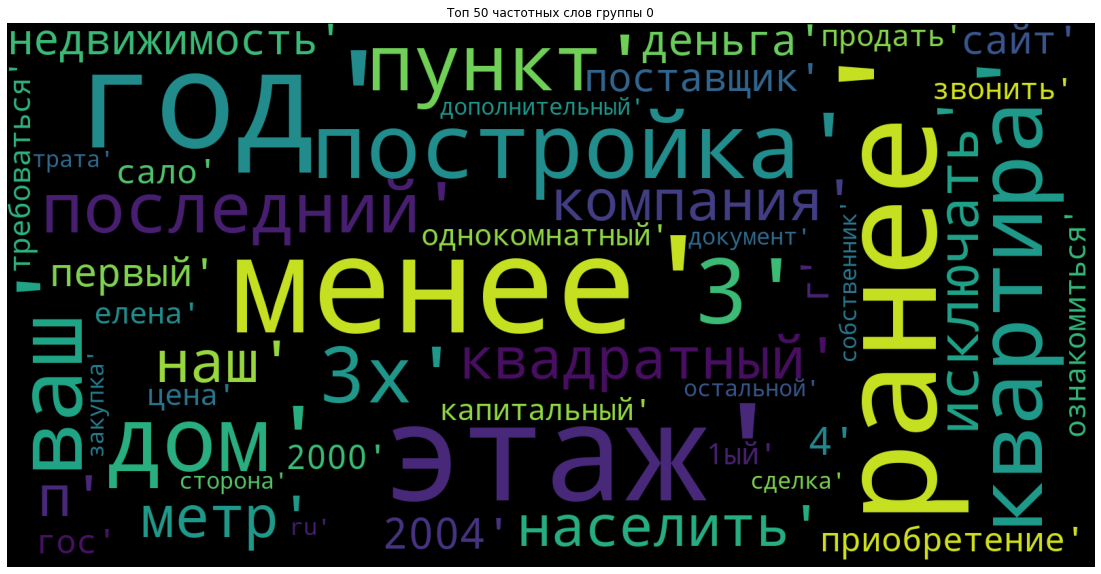

In [129]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_text0_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

###### Группа 1

In [130]:
df_text_1['text']

5      представлять фильм 368 й стрелковый печенгский...
6      настать 77 й день победа 77 сердце наполнить р...
12                       добыча рыба традиционный способ
18     возможно уехать уехать один цель вернуться ост...
19                клюква пойти мало спелый открыть сезон
                             ...                        
796    добрый время дорогой друг звать сергей борзов ...
797    уважаемый админ пропустить пожалуйста пост пом...
798    уважаемый соотечественник движение профессиона...
811             березовский районный краеведческий музей
814    манжета вероятно верхний часть шуба сшить мех ...
Name: text, Length: 253, dtype: object

In [131]:
text1_as_str = ''

In [132]:
for index, row in df_text_1.iterrows(): 
    text1_as_str = text1_as_str + str(row['text']) + ' '

При помощи регулярных выражений удалим лишние символы


In [133]:
text1_as_str = re.sub('[,—\'\[\]]', '', text1_as_str)
text1_as_str

'представлять фильм 368 й стрелковый печенгский краснознамённый дивизия который создать наш коллега тюменский область хант мансийский автономный округ югра настать 77 й день победа 77 сердце наполнить радость грусть 77 мысленно воспоминание представление погрузиться тот страшный война сегодня хотеться сказать слово песня олег митяев «я видеть война смотреть фильм слелай всё непременно весь мир оставаться такой зваться «довоенным» молодыегероизауралье про45 курган курганскаяобласть добыча рыба традиционный способ возможно уехать уехать один цель вернуться оставить след история этот культура жить вечно клюква пойти мало спелый открыть сезон сезон ягода активно идти черника морошка активно идти сбор брусника сбор дикорос один важный дело сезон кушать поделиться угадать есть обратный путь таймлапс 🏔 сходить поставить система набрать свеженький берёзовый сок сеучас самый время выхлоп вырвать дорога установка чума выглядеть каркас затем идти покрытие самый смелый залезть наверх закрепить тру

Составим "словарь" из 50 наиболее частотных слов


In [134]:
text1_tokens = word_tokenize(text1_as_str)
text1_text = nltk.Text(text1_tokens)
fdist_text1 = FreqDist(text1_text)
fdist_text1_most_c = fdist_text1.most_common(50)

Визуализируем облако частотных слов


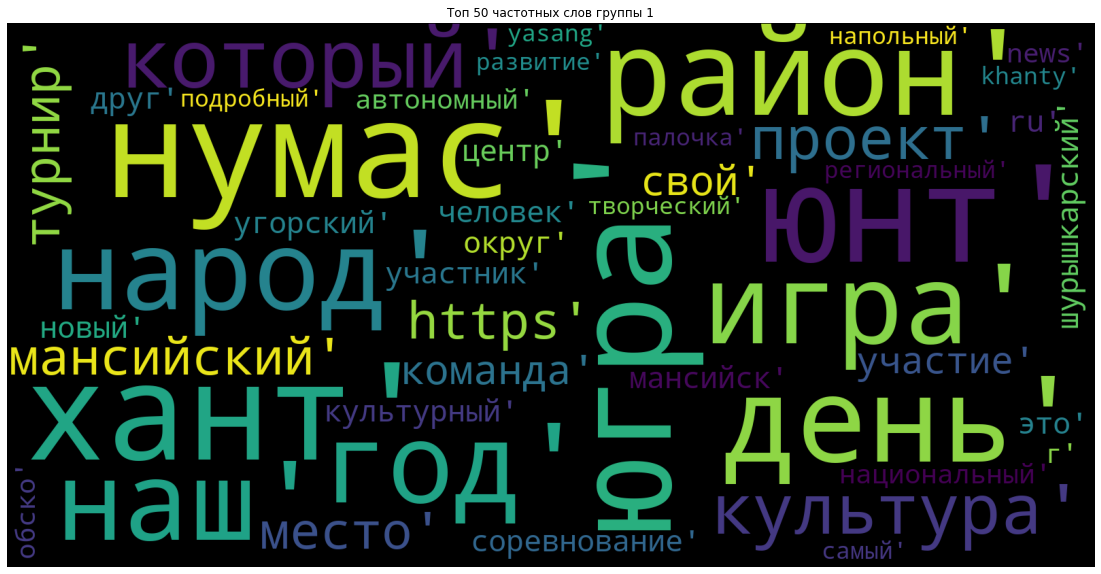

In [135]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_text1_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 1')
plt.axis("off")
plt.show()

###### Группа 2

In [136]:
df_text_2['text']

2      приглашение коллега принять участие акция цель...
15     пообедать ресторан вонтко самый натуральный cl...
20                                     аккуратный болото
30     месяц назад приходить бешенный лиса последстви...
31     вернуться соц сеть ютуба находиться дом почему...
                             ...                        
806                           https youtu be ulr 0qtkk88
807                           https youtu be mzphv7snn0k
808                           https youtu be tgqdymksrju
809                           https youtu be r4kfjkpe4dq
813    богордаев женский праздничный костюм хант манс...
Name: text, Length: 153, dtype: object

In [137]:
text2_as_str = ''

In [138]:
for index, row in df_text_2.iterrows(): 
    text2_as_str = text2_as_str + str(row['text']) + ' '

При помощи регулярных выражений удалим лишние символы


In [139]:
text2_as_str = re.sub('[,—\'\[\]]', '', text2_as_str)
text2_as_str

'приглашение коллега принять участие акция цель сохранение исторический память гражданско патриотический воспитание популяризация изучение история наш страна помощь современный формат всероссийский общественный движение «волонтёр победы» далее – движение 17 июль 2022 год 12 00 час московский время проводить международный акция «код доступ сталинград» далее – акция приурочить 80 й годовщина начало сталинградский битва акция проходить формат интерактивный прямой трансляция русский английский язык официальный аккаунт движение вконтакте https vk com vsezapobedu канал youtube https youtube com vsezapobedu ход трансляция участник погрузиться история великий отечественный война смочь узнать основный событие её переломный момент – сталинградский битва итог трансляция состояться интерактивный сессия каждый смочь проверить свой знание ответить вопрос участник который набрать больший количество балл смочь получить подарок движение участник возраст 14 год прошедшее обязательный регистрация принять

Составим "словарь" из 50 наиболее частотных слов


In [140]:
text2_tokens = word_tokenize(text2_as_str)
text2_text = nltk.Text(text2_tokens)
fdist_text2 = FreqDist(text2_text)
fdist_text2_most_c = fdist_text2.most_common(50)

Визуализируем облако частотных слов


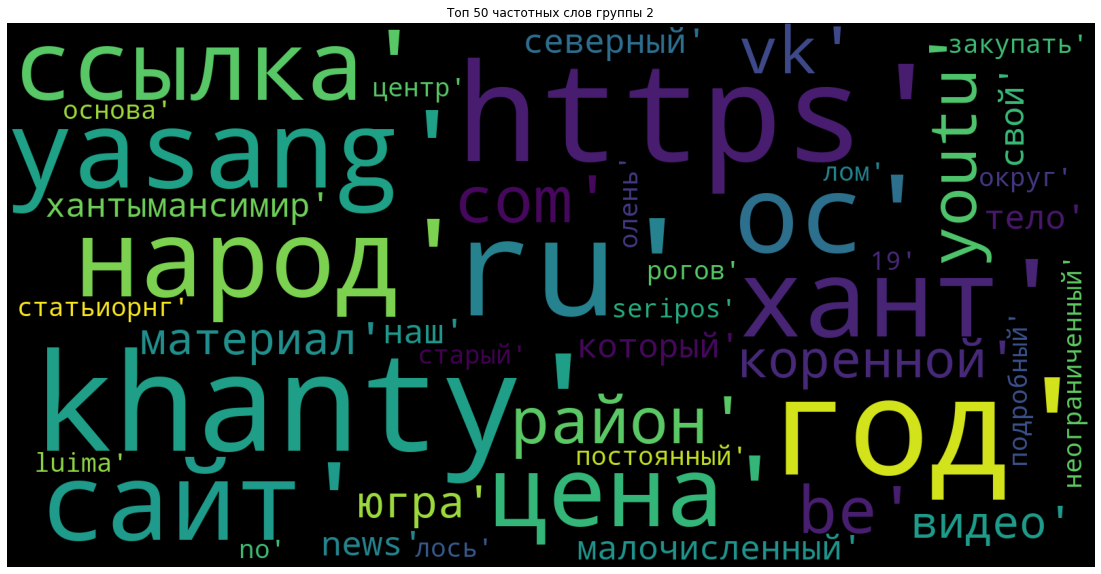

In [141]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_text2_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 2')
plt.axis("off")
plt.show()

###### Группа 3

In [142]:
df_text_3['text']

11             порыбачить спорить бросок сделать поймать
53                                               огурчик
101    софья онина филологический наукайт доктор йис ...
102    округ хоятат «команда путина» оӆаң премияйн юк...
104    сара таӆт они хув порайна хонда холна ярый ант...
                             ...                        
583                                    каслающемумузею20
619    удалённый занятость оказание рекламный информа...
652                    услуга расколка дрова 89822677786
742             весьма вероятно это джек рассесть терьер
790    здравствуйте просить разместить информация нов...
Name: text, Length: 87, dtype: object

In [143]:
text3_as_str = ''

In [144]:
for index, row in df_text_3.iterrows(): 
    text3_as_str = text3_as_str + str(row['text']) + ' '

При помощи регулярных выражений удалим лишние символы


In [145]:
text3_as_str = re.sub('[,—\'\[\]]', '', text3_as_str)
text3_as_str

'порыбачить спорить бросок сделать поймать огурчик софья онина филологический наукайт доктор йис хащи тыӆащанин москва вошн россия мув наукайт академия хота хощ уӆт арсыр ясңат ӆэрамтта институтн хант учёный нэ софья владимирович онина талигин филологический наукайт доктор нэм хоӆамтас ӆув «способ выражение побуждение хантыйский языке» нэмпить докторский диссертация ханшас софья владимирович щи вера оӆаңать ош паятсаӆӆ па научный нэпекат ханшас филологический наукайт хуӆ доктор хоить щит андрей данилович каксина евгений александрович цыпанов па валентина николаевич соловар оппонентат усатый па мирхота порайна ар вера эваӆт иньщассать доктор нэм хоӆамт порайна 50 кто уна учёнойт усатый ӆыв искать арсыр верат эӆт иньщассать софья онина ястас «щи уна научный нэпекать ханшмемна ма ош пайтсэм мета воӆаң – щит муй ханнэхо потартаӆ щаӆт кимета вера – па хоить эӆт моӆт вохта хоить хоӆт пеӆ партта рахаӆ щи тумпийна итухаӆ порайна нушать хойма ёх иньщасӆат муй верот щи порайна хантэта ант веритӆ

Составим "словарь" из 50 наиболее частотных слов


In [146]:
text3_tokens = word_tokenize(text3_as_str)
text3_text = nltk.Text(text3_tokens)
fdist_text3 = FreqDist(text3_text)
fdist_text3_most_c = fdist_text3.most_common(50)

Визуализируем облако частотных слов


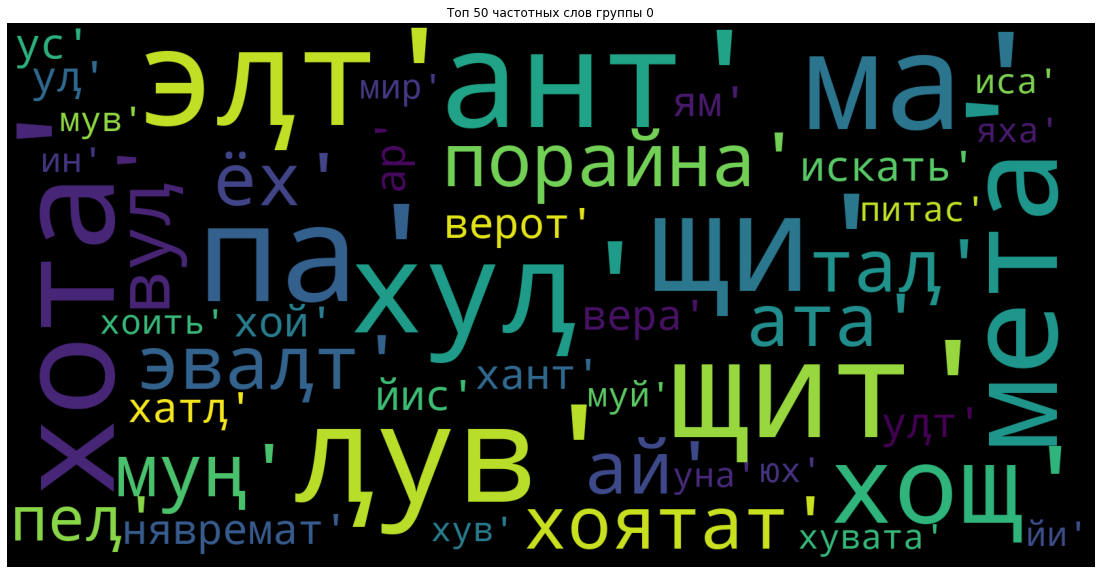

In [147]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_text3_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

###### Группа 4

In [148]:
df_text_4['text']

1      отличный новость club35608492 молодой парламен...
3      5 июль 1943 год начаться курский битва наш зем...
4      друг фонд президентский грант проводить оценка...
7      день 10 летие проект «молодая герой зауралья» ...
8      представлять информационный урок основа матери...
                             ...                        
791    пройти путь формирование бизнес идея открытие ...
801    23 сентябрь ждать театр солнце спектакль щанри...
802    семейный команда приглашать участие всероссийс...
810    здравствуйте студентка направление социально э...
812    дмитриев садовник г ваха тобольск весь сибирь ...
Name: text, Length: 265, dtype: object

In [149]:
text4_as_str = ''

In [150]:
for index, row in df_text_4.iterrows(): 
    text4_as_str = text4_as_str + str(row['text']) + ' '

При помощи регулярных выражений удалим лишние символы


In [151]:
text4_as_str = re.sub('[,—\'\[\]]', '', text4_as_str)
text4_as_str

'отличный новость club35608492 молодой парламентарий курганский область получить грант club205606768 президентский фонд культурный инициатива проект культурно образовательный исторический экспозиция молодой герой зауралье экспозиция включать интерактивный диорама стенд виртуальный реальность реконструкция подвиг стенд дополнить реальность кинолекторий плазменный монитор документальный игровой фильм реконструкция интерактивный сенсорный стол аудиостенд запись сводка совинформбюро интеллектуальный зона настольный познавательный игра «молодая герой зауралья» стенд голограмма реконструкция большой напольный пазл карта курганский область место рождение герой значительный часть экспозиция создать благодаря ранее реализовать президентский грант дополнительно создать анимационный фильм дошкольник школьник молодой герой зауралье снятой короткометражный фильм реконструкция вклад тыл победа также короткометражный фильм «солдатский труд история один снимка» кинореконструкция знаменитый фотоснимок 

Составим "словарь" из 50 наиболее частотных слов


In [152]:
text4_tokens = word_tokenize(text4_as_str)
text4_text = nltk.Text(text4_tokens)
fdist_text4 = FreqDist(text4_text)
fdist_text4_most_c = fdist_text4.most_common(50)

Визуализируем облако частотных слов


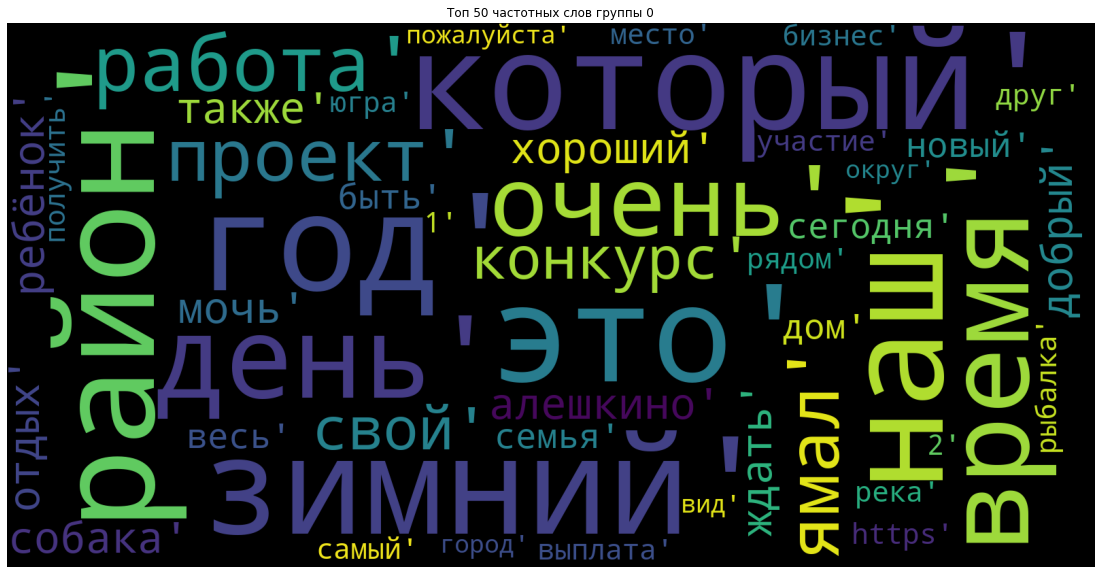

In [153]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_text4_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

In [154]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   from_id                       815 non-null    int64  
 1   owner_id                      815 non-null    int64  
 2   domain                        815 non-null    object 
 3   date                          815 non-null    object 
 4   text                          814 non-null    object 
 5   copy_text                     815 non-null    object 
 6   copy_date                     14 non-null     object 
 7   likes_count                   815 non-null    int64  
 8   comments_count                815 non-null    int64  
 9   reposts                       815 non-null    int64  
 10  views                         815 non-null    int64  
 11  likers                        621 non-null    object 
 12  comments                      815 non-null    object 
 13  comme

#### Likes

In [155]:
like_mean_0 = df_text_0['likes_count'].mean()
like_mean_0

23.982456140350877

In [156]:
like_mean_1 = df_text_1['likes_count'].mean()
like_mean_1

42.00395256916996

In [157]:
like_mean_2 = df_text_2['likes_count'].mean()
like_mean_2

25.30718954248366

In [158]:
like_mean_3 = df_text_3['likes_count'].mean()
like_mean_3

32.49425287356322

In [159]:
like_mean_4 = df_text_4['likes_count'].mean()
like_mean_4

49.40754716981132

По количеству лайков видим, что наиболее популярны посты, связанные с повседневной жизнью (49). Чуть меньше лайков в среднем набирают посты о публикациях (42). Далее идут посты на хантыйском (32). И меньше всего в среднем собирают лайков посты о купле-продаже (25) (видимо, потому что после того, как сделака состоялась, пост становится неинтересным) и посты о конкурсах (24)

#### Comments

In [160]:
comments_mean_0 = df_text_0['likes_count'].mean()
comments_mean_0

23.982456140350877

In [161]:
comments_mean_1 = df_text_1['comments_count'].mean()
comments_mean_1

2.4624505928853755

In [162]:
comments_mean_2 = df_text_2['comments_count'].mean()
comments_mean_2

1.4379084967320261

In [163]:
comments_mean_3 = df_text_3['comments_count'].mean()
comments_mean_3

1.7586206896551724

In [164]:
comments_mean_4 = df_text_4['comments_count'].mean()
comments_mean_4

2.7962264150943397

Наиболее обсуждаемыми являются посты о купле-продаже (23). Количество комментариев там значительно превышает количество в остальных категориях. Прочие темы с небольшим отрывом можно выстроить в такую градацию: 
повседневность (2.8) > конкурсы (2.46) > хантыйский (1.76) > публикации (1.43)

#### Reposts

In [165]:
reposts_mean_0 = df_text_0['reposts'].mean()
reposts_mean_0

1.8596491228070176

In [166]:
reposts_mean_1 = df_text_1['reposts'].mean()
reposts_mean_1

4.126482213438735

In [167]:
reposts_mean_2 = df_text_2['reposts'].mean()
reposts_mean_2

1.9019607843137254

In [168]:
reposts_mean_3 = df_text_3['reposts'].mean()
reposts_mean_3

2.2298850574712645

In [169]:
reposts_mean_4 = df_text_4['reposts'].mean()
reposts_mean_4

2.158490566037736

По репостам мы видим, что посты о конкурсах в два раза выше остальных (4,13). Далее с небольшой разницей градация: хантыйский (2,23) > повседневность (2,16) > публикации (1,9) > купля-продажа (1,86)

#### Views

In [170]:
reposts_mean_0 = df_text_0['views'].mean()
reposts_mean_0

956.9649122807018

In [171]:
reposts_mean_1 = df_text_1['views'].mean()
reposts_mean_1

1213.7193675889328

In [172]:
reposts_mean_2 = df_text_2['views'].mean()
reposts_mean_2

1274.8823529411766

In [173]:
reposts_mean_3 = df_text_3['views'].mean()
reposts_mean_3

934.6781609195402

In [174]:
reposts_mean_4 = df_text_4['views'].mean()
reposts_mean_4

1708.5018867924528

Если изучить среднее количество просмотров, то можно сказать, что больше всего просмотров набирают посты о поведневности (1709). Далее: публикации (1275) > конкурсы (1214) > купля-продажа (957) > хантыйский (934)

### Copy_text

In [176]:
df_copy_text = df[df['copy_text'] != '0']

In [177]:
df_copy_text = df_copy_text.reset_index(drop=True)

In [10]:
df_copy_text = pd.read_csv('df_copy_text.csv')

In [11]:
df_copy_text

from_id   owner_id                                    domain  \
0   -106097095 -106097095  https://vk.com/feed?w=wall-106097095_999   
1   -106097095 -106097095  https://vk.com/feed?w=wall-106097095_998   
2   -106097095 -106097095  https://vk.com/feed?w=wall-106097095_997   
3   -106097095 -106097095  https://vk.com/feed?w=wall-106097095_994   
4   -106097095 -106097095  https://vk.com/feed?w=wall-106097095_993   
..         ...        ...                                       ...   
908  -96479998  -96479998   https://vk.com/feed?w=wall-96479998_381   
909  -96479998  -96479998   https://vk.com/feed?w=wall-96479998_380   
910  -96479998  -96479998   https://vk.com/feed?w=wall-96479998_378   
911  -96479998  -96479998   https://vk.com/feed?w=wall-96479998_377   
912  -96479998  -96479998   https://vk.com/feed?w=wall-96479998_376   

                    date text  \
0    2022-09-27 06:11:23    0   
1    2022-09-22 12:17:36    0   
2    2022-09-06 05:34:14    0   
3    2022-07-14 07:10:54    0   
4    2022-07-11 08:46:11    0   
..                   ...  ...   
908  2020-11-16 19:12:58    0   
909  2020-11-10 17:57:30    0   
910  2020-11-07 16:36:22    0   
911  2020-11-01 06:53:13    0   
912  2020-10-30 13:48:09    0   

                                             copy_text            copy_date  \
0    молодой парламентарий курганский область 10 го...  2022-09-27 04:45:00   
1    сегодня рамка проект «интерактивный встреча «к...  2022-09-16 11:00:03   
2    неделя назад получить президентский грант прод...  2022-09-06 05:24:04   
3    хранить история помнить прошлое будущее дс № 5...  2022-07-11 11:30:07   
4    наш вика курган организация пограничник заурал...  2022-07-08 13:37:08   
..                                                 ...                  ...   
908  акция бабушкин акануть участник михляева татья...  2020-11-16 15:00:28   
909  линия судьба точка пересечение 💫 медвежий праз...  2020-11-10 10:00:03   
910  акция бабушкин акануть участник фирсова ирина ...  2020-11-07 07:57:50   
911  новосибирский этнограф показать интересный нах...  2020-11-01 05:00:08   
912  art challenge день 29 тема обувь экспонатыкото...  2020-10-29 17:29:43   

     likes_count  comments_count  reposts  ...  comments_num_of_unique_word  \
0             10               0        1  ...                            1   
1              1               0        1  ...                            1   
2             15               0        0  ...                            1   
3              2               0        0  ...                            1   
4              2               0        0  ...                            1   
..           ...             ...      ...  ...                          ...   
908            3               0        0  ...                            1   
909            9               0        3  ...                            1   
910            4               0        0  ...                            1   
911            7               0        0  ...                            1   
912            2               0        0  ...                            1   

    comments_num_of_letters comments_num_of_punct comments_num_of_words_upper  \
0                         3                     0                           0   
1                         3                     0                           0   
2                         3                     0                           0   
3                         3                     0                           0   
4                         3                     0                           0   
..                      ...                   ...                         ...   
908                       3                     0                           0   
909                       3                     0                           0   
910                       3                     0                           0   
911                       3                     0

In [12]:
count_vect = CountVectorizer()
doc_term_matrix = count_vect.fit_transform(df_copy_text['copy_text'].values.astype('U'))

In [13]:
LDA = LatentDirichletAllocation(n_components=6, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=6, random_state=42)

In [14]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 30 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 30 words for topic #0:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['конференция', 'ребёнок', 'школа', 'khanty', 'yasang', 'творчество', '2022', 'такой', 'новый', 'выставка', 'мансийский', 'мир', 'север', 'наш', 'ru', 'па', 'музей', 'родный', 'который', 'ма', 'https', 'хант', 'свой', 'культура', 'югра', 'район', 'коренной', 'язык', 'год', 'народ']


Top 30 words for topic #1:
['югра', '00', 'сегодня', 'выставка', 'участник', 'конкурс', 'пройти', 'победа', 'свой', 'мастер', 'стать', 'человек', 'подвиг', 'музей', 'ребята', 'https', 'отечественный', 'проект', 'который', 'игра', 'великий', 'история', 'война', 'день', 'класс', 'зауралье', 'наш', 'молодой', 'год', 'герой']


Top 30 words for topic #2:
['щи', 'ёх', 'хантыйский', 'василиевич', 'вуӆ', 'наука', 'это', 'этнография', 'украшение', 'манси', 'который', 'олово', 'хота', 'праздник', 'народ', 'день', 'щит', 'https', 'хоятат', 'сибирь', 'мир', 'ёхан', 'па', 'ӆув', 'наш', 'музей', 'язык', 'эӆт', 'хант', 'год']


Top 30 words for topic #3:
['этап', 'наш', 'дело', 'образовательный', 'мгимо', 'дипломатии', 

Эмпирическим путём было установлено, что наиболее осмысленным получается деление на 6 категорий:
 * конференции (преимущественно для школьников)
 * патриотизм 
 * культура и быт
 * международные конкурсы
 * фольклор
 * повседневность

In [15]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(913, 6)

In [16]:
df_copy_text['Topic'] = topic_values.argmax(axis=1)

In [17]:
df_copy_text['Topic'].value_counts()

1    254
5    211
4    138
3    117
2     99
0     94
Name: Topic, dtype: int64

Градация количества постов по каждой теме следующая:
 * патриотизм > повседневность > фольклор > международные конкурсы > культура и быт > конференции

In [18]:
df_copy_text.to_csv('df_copy_text.csv', index = False)

#### Графики

In [194]:
df_copy_text = pd.read_csv('df_copy_text.csv')

In [195]:
df_copy_text

from_id   owner_id                                    domain  \
0   -106097095 -106097095  https://vk.com/feed?w=wall-106097095_999   
1   -106097095 -106097095  https://vk.com/feed?w=wall-106097095_998   
2   -106097095 -106097095  https://vk.com/feed?w=wall-106097095_997   
3   -106097095 -106097095  https://vk.com/feed?w=wall-106097095_994   
4   -106097095 -106097095  https://vk.com/feed?w=wall-106097095_993   
..         ...        ...                                       ...   
908  -96479998  -96479998   https://vk.com/feed?w=wall-96479998_381   
909  -96479998  -96479998   https://vk.com/feed?w=wall-96479998_380   
910  -96479998  -96479998   https://vk.com/feed?w=wall-96479998_378   
911  -96479998  -96479998   https://vk.com/feed?w=wall-96479998_377   
912  -96479998  -96479998   https://vk.com/feed?w=wall-96479998_376   

                    date text  \
0    2022-09-27 06:11:23    0   
1    2022-09-22 12:17:36    0   
2    2022-09-06 05:34:14    0   
3    2022-07-14 07:10:54    0   
4    2022-07-11 08:46:11    0   
..                   ...  ...   
908  2020-11-16 19:12:58    0   
909  2020-11-10 17:57:30    0   
910  2020-11-07 16:36:22    0   
911  2020-11-01 06:53:13    0   
912  2020-10-30 13:48:09    0   

                                             copy_text            copy_date  \
0    молодой парламентарий курганский область 10 го...  2022-09-27 04:45:00   
1    сегодня рамка проект «интерактивный встреча «к...  2022-09-16 11:00:03   
2    неделя назад получить президентский грант прод...  2022-09-06 05:24:04   
3    хранить история помнить прошлое будущее дс № 5...  2022-07-11 11:30:07   
4    наш вика курган организация пограничник заурал...  2022-07-08 13:37:08   
..                                                 ...                  ...   
908  акция бабушкин акануть участник михляева татья...  2020-11-16 15:00:28   
909  линия судьба точка пересечение 💫 медвежий праз...  2020-11-10 10:00:03   
910  акция бабушкин акануть участник фирсова ирина ...  2020-11-07 07:57:50   
911  новосибирский этнограф показать интересный нах...  2020-11-01 05:00:08   
912  art challenge день 29 тема обувь экспонатыкото...  2020-10-29 17:29:43   

     likes_count  comments_count  reposts  ...  comments_num_of_unique_word  \
0             10               0        1  ...                            1   
1              1               0        1  ...                            1   
2             15               0        0  ...                            1   
3              2               0        0  ...                            1   
4              2               0        0  ...                            1   
..           ...             ...      ...  ...                          ...   
908            3               0        0  ...                            1   
909            9               0        3  ...                            1   
910            4               0        0  ...                            1   
911            7               0        0  ...                            1   
912            2               0        0  ...                            1   

    comments_num_of_letters comments_num_of_punct comments_num_of_words_upper  \
0                         3                     0                           0   
1                         3                     0                           0   
2                         3                     0                           0   
3                         3                     0                           0   
4                         3                     0                           0   
..                      ...                   ...                         ...   
908                       3                     0                           0   
909                       3                     0                           0   
910                       3                     0                           0   
911                       3                     0

Посмотрим в зависимости от темы разные показатели

In [19]:
df_copy_text_0 = df_copy_text[df_copy_text['Topic'] == 0]

In [20]:
df_copy_text_1 = df_copy_text[df_copy_text['Topic'] == 1]

In [21]:
df_copy_text_2 = df_copy_text[df_copy_text['Topic'] == 2]

In [22]:
df_copy_text_3 = df_copy_text[df_copy_text['Topic'] == 3]

In [23]:
df_copy_text_4 = df_copy_text[df_copy_text['Topic'] == 4]

In [24]:
df_copy_text_5 = df_copy_text[df_copy_text['Topic'] == 5]

##### Гистограммы

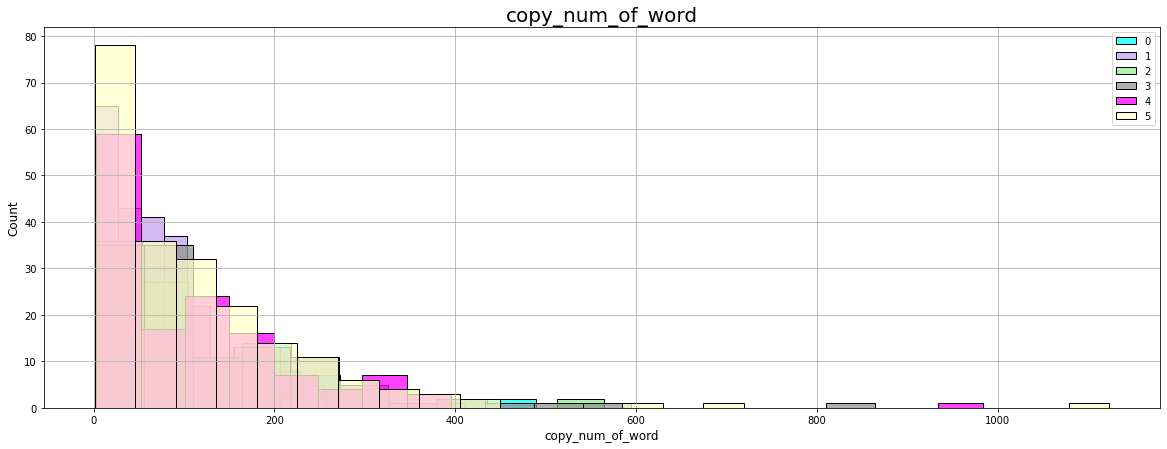

In [215]:
plt.figure(figsize=(20, 7))
plt.title('copy_num_of_word', fontsize=20)
sns.histplot(df_copy_text_0['copy_num_of_word'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_copy_text_1['copy_num_of_word'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_copy_text_2['copy_num_of_word'], color='#90EE90', kde=False, label='2');
sns.histplot(df_copy_text_3['copy_num_of_word'], color='#929591', kde=False, label='3');
sns.histplot(df_copy_text_4['copy_num_of_word'], color='#FF00FF', kde=False, label='4');
sns.histplot(df_copy_text_5['copy_num_of_word'], color='#FFFFCB', kde=False, label='5');
plt.ylabel('Count', fontsize=12)
plt.xlabel('copy_num_of_word', fontsize=12)
plt.legend()

plt.grid(True);

In [207]:
fig = px.histogram(df_copy_text, x="copy_num_of_word", color="Topic")
fig.show()

По количеству слов в посте 
 * в теме про конференции большая часть постов имеет длину менее 200 слов.Встречаются редкие выбросы, максимальная длина поста от 480 до 499 слов
 * в теме про патриотизм основная часть постов имеет длину до 100 слов, но выбросы можно увидеть вплоть до более чем 300 слов
 * в теме про культуру и быт ситуация аналогично теме про выставки, но выбросы можно встретить до более чем 500 слов
 * в теме про международные конкурсы пик значений находится от 0 до 19 слов, а выбросы доходят до более чем 860 слов
 * в теме про фольклор пик также находится от 0 до 19 слов и все значения располодены до 379 слов, но есть одиночный выброс на более чем 980 слов
 * в теме про повседневность пик также приходится на значение от 0 до 19 слов. Выбросы доходят до более чем 1120 слов в посте

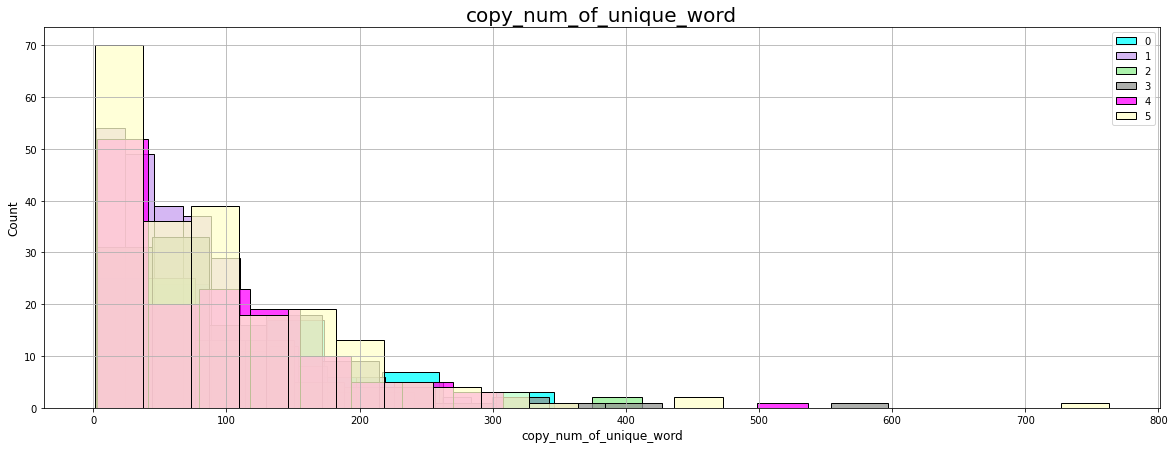

In [216]:
plt.figure(figsize=(20, 7))
plt.title('copy_num_of_unique_word', fontsize=20)
sns.histplot(df_copy_text_0['copy_num_of_unique_word'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_copy_text_1['copy_num_of_unique_word'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_copy_text_2['copy_num_of_unique_word'], color='#90EE90', kde=False, label='2');
sns.histplot(df_copy_text_3['copy_num_of_unique_word'], color='#929591', kde=False, label='3');
sns.histplot(df_copy_text_4['copy_num_of_unique_word'], color='#FF00FF', kde=False, label='4');
sns.histplot(df_copy_text_5['copy_num_of_unique_word'], color='#FFFFCB', kde=False, label='5');
plt.ylabel('Count', fontsize=12)
plt.xlabel('copy_num_of_unique_word', fontsize=12)
plt.legend()

plt.grid(True);

In [209]:
fig = px.histogram(df_copy_text, x="copy_num_of_unique_word", color="Topic")
fig.show()

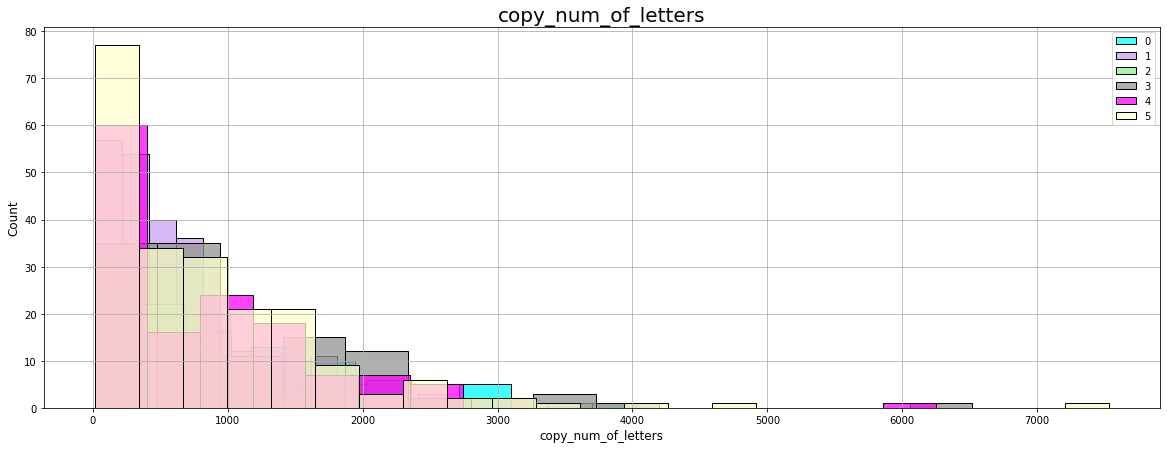

In [217]:
plt.figure(figsize=(20, 7))
plt.title('copy_num_of_letters', fontsize=20)
sns.histplot(df_copy_text_0['copy_num_of_letters'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_copy_text_1['copy_num_of_letters'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_copy_text_2['copy_num_of_letters'], color='#90EE90', kde=False, label='2');
sns.histplot(df_copy_text_3['copy_num_of_letters'], color='#929591', kde=False, label='3');
sns.histplot(df_copy_text_4['copy_num_of_letters'], color='#FF00FF', kde=False, label='4');
sns.histplot(df_copy_text_5['copy_num_of_letters'], color='#FFFFCB', kde=False, label='5');
plt.ylabel('Count', fontsize=12)
plt.xlabel('copy_num_of_letters', fontsize=12)
plt.legend()

plt.grid(True);

In [211]:
fig = px.histogram(df_copy_text, x="copy_num_of_letters", color="Topic")
fig.show()

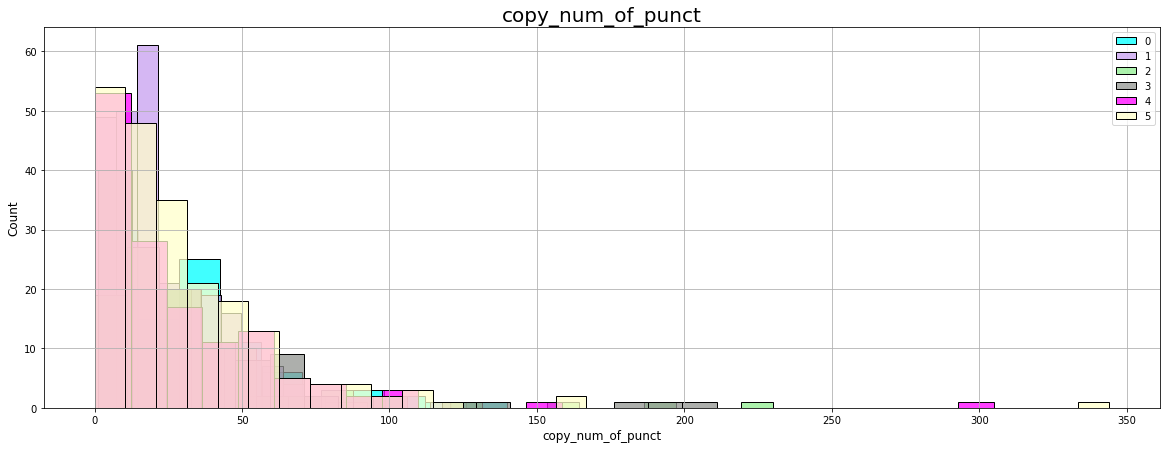

In [218]:
plt.figure(figsize=(20, 7))
plt.title('copy_num_of_punct', fontsize=20)
sns.histplot(df_copy_text_0['copy_num_of_punct'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_copy_text_1['copy_num_of_punct'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_copy_text_2['copy_num_of_punct'], color='#90EE90', kde=False, label='2');
sns.histplot(df_copy_text_3['copy_num_of_punct'], color='#929591', kde=False, label='3');
sns.histplot(df_copy_text_4['copy_num_of_punct'], color='#FF00FF', kde=False, label='4');
sns.histplot(df_copy_text_5['copy_num_of_punct'], color='#FFFFCB', kde=False, label='5');
plt.ylabel('Count', fontsize=12)
plt.xlabel('copy_num_of_punct', fontsize=12)
plt.legend()

plt.grid(True);

In [219]:
fig = px.histogram(df_copy_text, x="copy_num_of_punct", color="Topic")
fig.show()

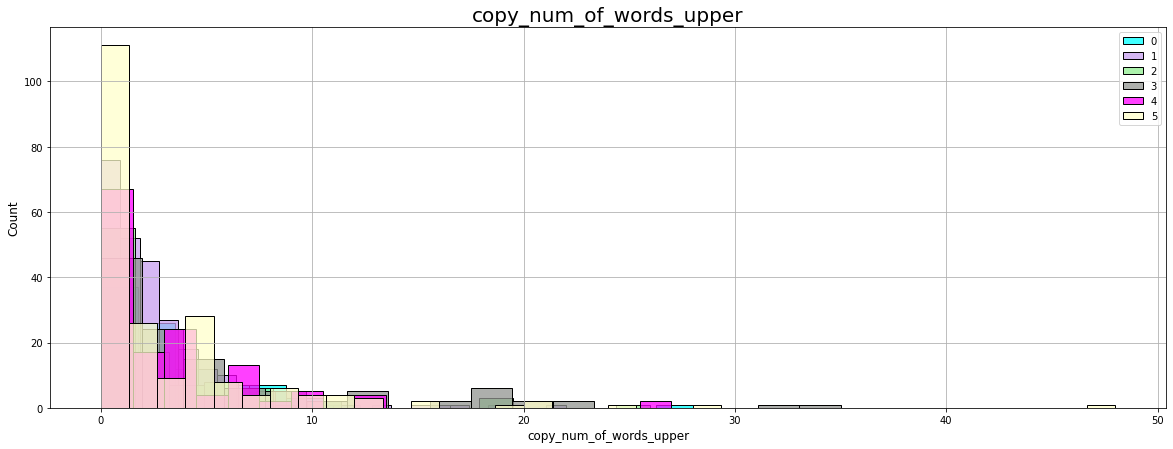

In [220]:
plt.figure(figsize=(20, 7))
plt.title('copy_num_of_words_upper', fontsize=20)
sns.histplot(df_copy_text_0['copy_num_of_words_upper'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_copy_text_1['copy_num_of_words_upper'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_copy_text_2['copy_num_of_words_upper'], color='#90EE90', kde=False, label='2');
sns.histplot(df_copy_text_3['copy_num_of_words_upper'], color='#929591', kde=False, label='3');
sns.histplot(df_copy_text_4['copy_num_of_words_upper'], color='#FF00FF', kde=False, label='4');
sns.histplot(df_copy_text_5['copy_num_of_words_upper'], color='#FFFFCB', kde=False, label='5');
plt.ylabel('Count', fontsize=12)
plt.xlabel('copy_num_of_words_upper', fontsize=12)
plt.legend()

plt.grid(True);

In [221]:
fig = px.histogram(df_copy_text, x="copy_num_of_words_upper", color="Topic")
fig.show()

По количеству слов капсом в посте:
 * в теме про конференции слов капсом в посте в основном не больше 9 за исключением одного выброса в 11 слов и одного - в 28 
 * в теме про патриотизм слов капсом в посте не больше 5, но встречаются выбросы, доходящие до 22 
 * в теме про культуру и быт аналогично слов касом не больше 8 в посте, но выбросы доходят до 26
 * в теме про международные конкурсы вчтречается в среднем больше выбросов, доходящих до 35 слов капсом в посте
 * в теме про фольклор выбросов не так много и в целом слов капсом в посте не больше 6, но встречается 2 поста, в которых 27 слов капсом
 * в теме про повседневность много значений меньше 4, но также много выбросов, значения в которых доходят до 48 слов капсом в посте

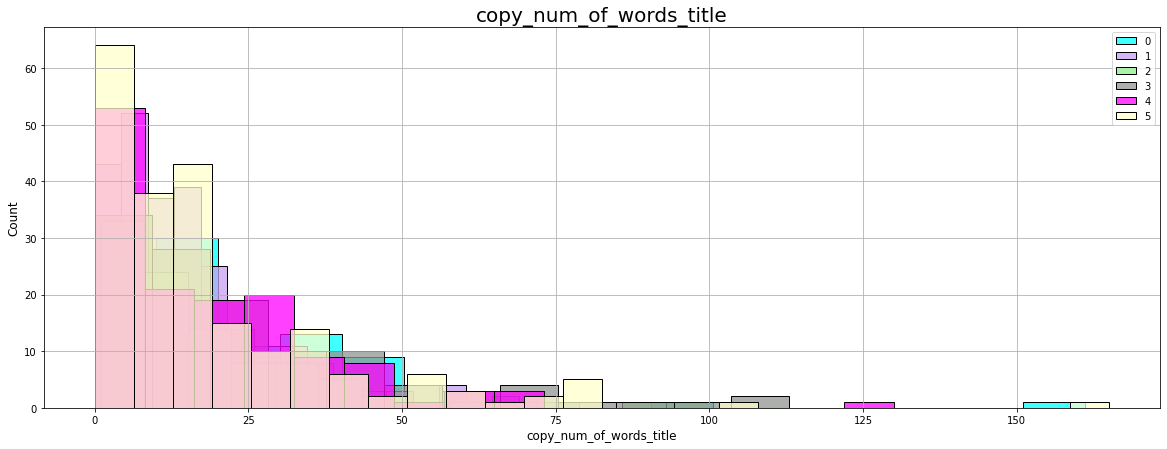

In [222]:
plt.figure(figsize=(20, 7))
plt.title('copy_num_of_words_title', fontsize=20)
sns.histplot(df_copy_text_0['copy_num_of_words_title'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_copy_text_1['copy_num_of_words_title'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_copy_text_2['copy_num_of_words_title'], color='#90EE90', kde=False, label='2');
sns.histplot(df_copy_text_3['copy_num_of_words_title'], color='#929591', kde=False, label='3');
sns.histplot(df_copy_text_4['copy_num_of_words_title'], color='#FF00FF', kde=False, label='4');
sns.histplot(df_copy_text_5['copy_num_of_words_title'], color='#FFFFCB', kde=False, label='5');
plt.ylabel('Count', fontsize=12)
plt.xlabel('copy_num_of_words_title', fontsize=12)
plt.legend()

plt.grid(True);

In [223]:
fig = px.histogram(df_copy_text, x="copy_num_of_words_title", color="Topic")
fig.show()

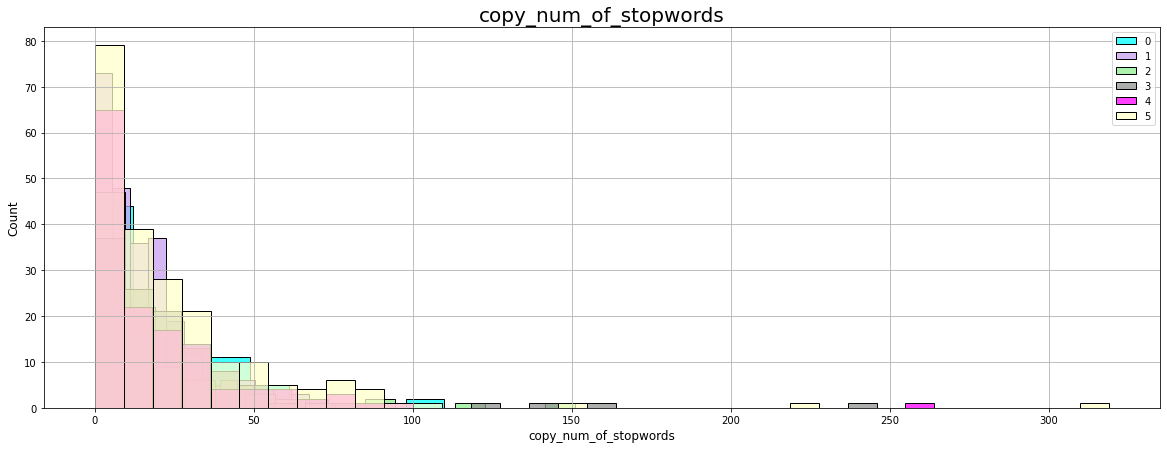

In [224]:
plt.figure(figsize=(20, 7))
plt.title('copy_num_of_stopwords', fontsize=20)
sns.histplot(df_copy_text_0['copy_num_of_stopwords'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_copy_text_1['copy_num_of_stopwords'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_copy_text_2['copy_num_of_stopwords'], color='#90EE90', kde=False, label='2');
sns.histplot(df_copy_text_3['copy_num_of_stopwords'], color='#929591', kde=False, label='3');
sns.histplot(df_copy_text_4['copy_num_of_stopwords'], color='#FF00FF', kde=False, label='4');
sns.histplot(df_copy_text_5['copy_num_of_stopwords'], color='#FFFFCB', kde=False, label='5');
plt.ylabel('Count', fontsize=12)
plt.xlabel('copy_num_of_stopwords', fontsize=12)
plt.legend()

plt.grid(True);

In [225]:
fig = px.histogram(df_copy_text, x="copy_num_of_stopwords", color="Topic")
fig.show()

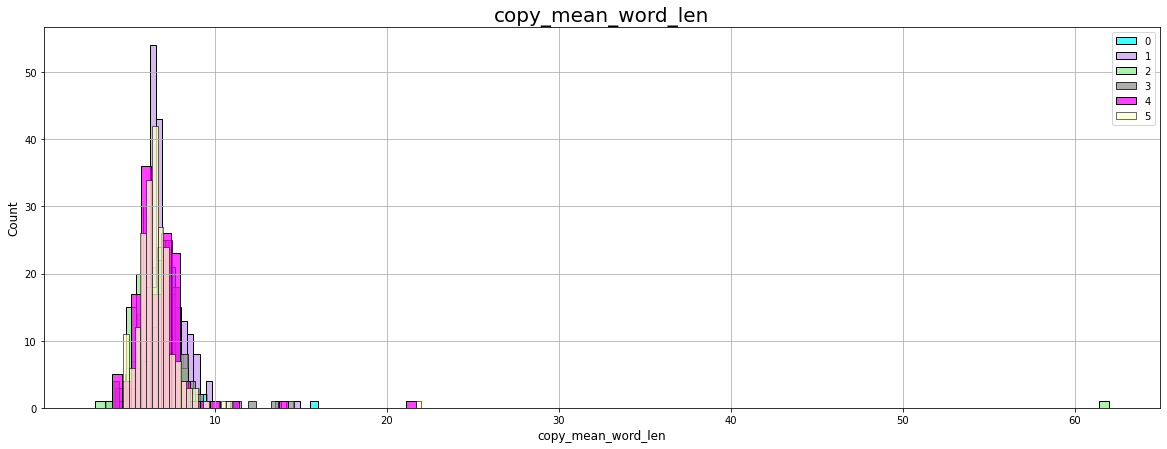

In [226]:
plt.figure(figsize=(20, 7))
plt.title('copy_mean_word_len', fontsize=20)
sns.histplot(df_copy_text_0['copy_mean_word_len'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_copy_text_1['copy_mean_word_len'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_copy_text_2['copy_mean_word_len'], color='#90EE90', kde=False, label='2');
sns.histplot(df_copy_text_3['copy_mean_word_len'], color='#929591', kde=False, label='3');
sns.histplot(df_copy_text_4['copy_mean_word_len'], color='#FF00FF', kde=False, label='4');
sns.histplot(df_copy_text_5['copy_mean_word_len'], color='#FFFFCB', kde=False, label='5');
plt.ylabel('Count', fontsize=12)
plt.xlabel('copy_mean_word_len', fontsize=12)
plt.legend()

plt.grid(True);

In [227]:
fig = px.histogram(df_copy_text, x="copy_mean_word_len", color="Topic")
fig.show()

По средней длине слова:
 * в теме про конференции она составляет 7 букв и выбросы редкие
 * в теме про патриотизм мы видим нормальное распределние вокруг 7 букв, выбросы редкие
 * в теме про культуру и быт она в среднем тоже 5-8 букв. Встречается какой-то выброс в 62, скорее всего это ошибка парсинга или пост был написан без разделения на слова
 * в теме про международные конкурсы ситуация аналогична теме про конференции, но выбросы более частые
 * в теме про фольклор  составляет скорее 6 букв, выбросы релкие
 * в теме про повседневность опять же нормальное распределение вокруг 7 букв, выбросы редкие

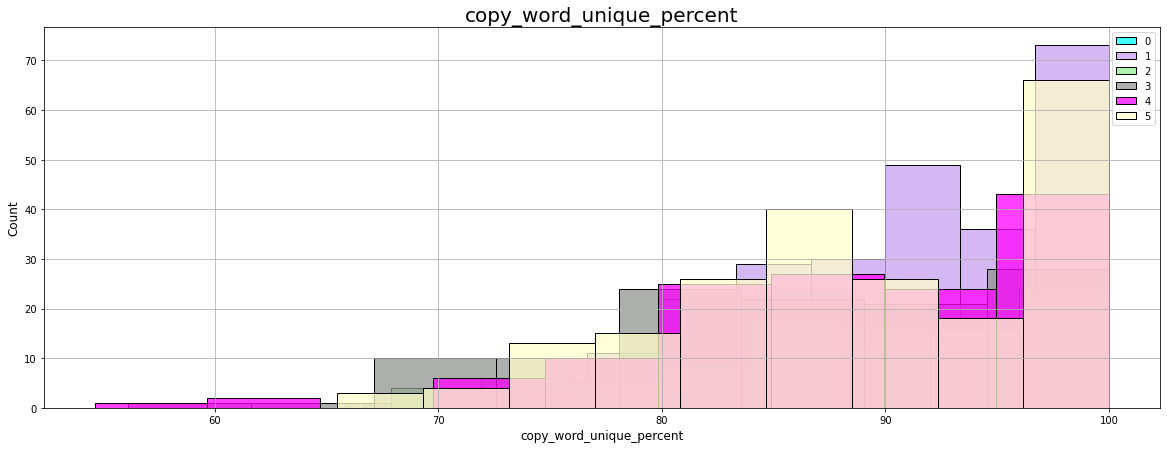

In [228]:
plt.figure(figsize=(20, 7))
plt.title('copy_word_unique_percent', fontsize=20)
sns.histplot(df_copy_text_0['copy_word_unique_percent'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_copy_text_1['copy_word_unique_percent'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_copy_text_2['copy_word_unique_percent'], color='#90EE90', kde=False, label='2');
sns.histplot(df_copy_text_3['copy_word_unique_percent'], color='#929591', kde=False, label='3');
sns.histplot(df_copy_text_4['copy_word_unique_percent'], color='#FF00FF', kde=False, label='4');
sns.histplot(df_copy_text_5['copy_word_unique_percent'], color='#FFFFCB', kde=False, label='5');
plt.ylabel('Count', fontsize=12)
plt.xlabel('copy_word_unique_percent', fontsize=12)
plt.legend()

plt.grid(True);

In [229]:
fig = px.histogram(df_copy_text, x="copy_word_unique_percent", color="Topic")
fig.show()

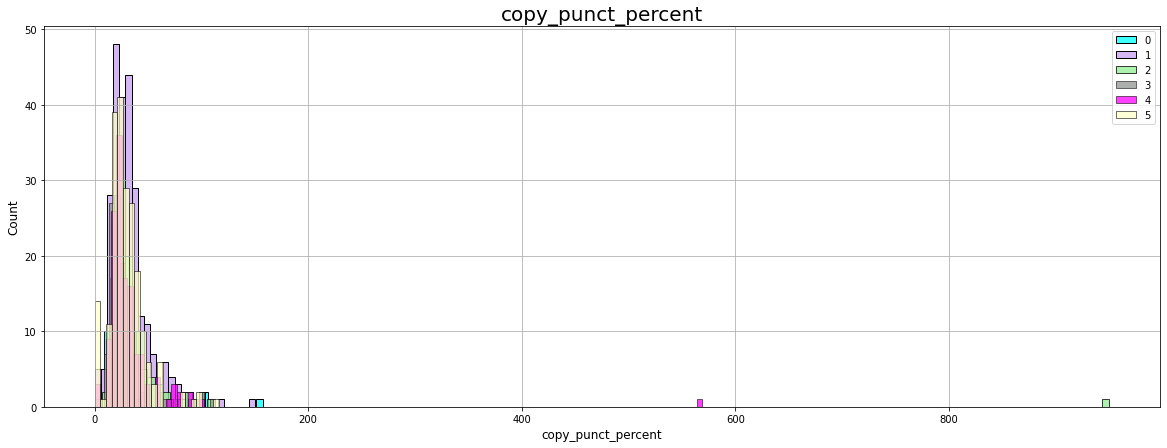

In [230]:
plt.figure(figsize=(20, 7))
plt.title('copy_punct_percent', fontsize=20)
sns.histplot(df_copy_text_0['copy_punct_percent'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_copy_text_1['copy_punct_percent'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_copy_text_2['copy_punct_percent'], color='#90EE90', kde=False, label='2');
sns.histplot(df_copy_text_3['copy_punct_percent'], color='#929591', kde=False, label='3');
sns.histplot(df_copy_text_4['copy_punct_percent'], color='#FF00FF', kde=False, label='4');
sns.histplot(df_copy_text_5['copy_punct_percent'], color='#FFFFCB', kde=False, label='5');
plt.ylabel('Count', fontsize=12)
plt.xlabel('copy_punct_percent', fontsize=12)
plt.legend()

plt.grid(True);

In [231]:
fig = px.histogram(df_copy_text, x="copy_punct_percent", color="Topic")
fig.show()

##### Word Cloud

###### Группа 0

In [232]:
df_copy_text_0['copy_text']

98     окружный «смотр деятельность этнокультурный це...
105    форум хант мансийск рада увидеть наш землячка ...
115    ☀️урок экософия «днк любовь родный дому»☀️ «та...
121    фестиваль таврид арт участвовать представитель...
122    фестиваль таврид арт участвовать представитель...
                             ...                        
846    xix югорский чтения✍🏻 📌опубликовать сборник ма...
871    маня усква манс маленький городок ворщикын ург...
874    выставка книга елена геннадиевич фёдоров библи...
891    📢«традиционный ремесло музейный пространство э...
905    знать музейный пространство северный столица в...
Name: copy_text, Length: 94, dtype: object

In [233]:
copy_text0_as_str = ''

In [234]:
for index, row in df_copy_text_0.iterrows(): 
    copy_text0_as_str = copy_text0_as_str + str(row['copy_text']) + ' '

При помощи регулярных выражений удалим лишние символы


In [235]:
copy_text0_as_str = re.sub('[,—\'\[\]]', '', copy_text0_as_str)
copy_text0_as_str

'окружный «смотр деятельность этнокультурный центр муниципальный образование югры» вартовчанин презентовать этнодеревня напомнить база отдых радуга сделать реконструкция стойбище хант представить летний зимний чума хлебный печь инвентарь охота рыбалка инфраструктура национальный спортивный забава полный убранство жилище региональный смотр призвать поддержать самобытный этнокультурный развитие народ югра параллельно это руководитель проект этнодеревня id16812769 екатерина жуков готовить один больший заявка всероссийский конкурс сфера этногрфический туризм вартовчанин представить городской опыт четыре номинация нижневартовск экоэтнодеревня натальярожкин форум хант мансийск рада увидеть наш землячка арин сэротэтто арина борисович род один маленький посёлок сюнай сало наш детство пройти он арин успешно работать югорский земля заниматься общественный деятельность 👍 сюнайсало янао кмнс хмао земляк ☀️урок экософия «днк любовь родный дому»☀️ «таврид арт» – платформа возможность молодой деятель

Составим "словарь" из 50 наиболее частотных слов


In [236]:
copy_text0_tokens = word_tokenize(copy_text0_as_str)
copy_text0_text = nltk.Text(copy_text0_tokens)
fdist_copy_text0 = FreqDist(copy_text0_text)
fdist_copy_text0_most_c = fdist_copy_text0.most_common(50)

Визуализируем облако частотных слов


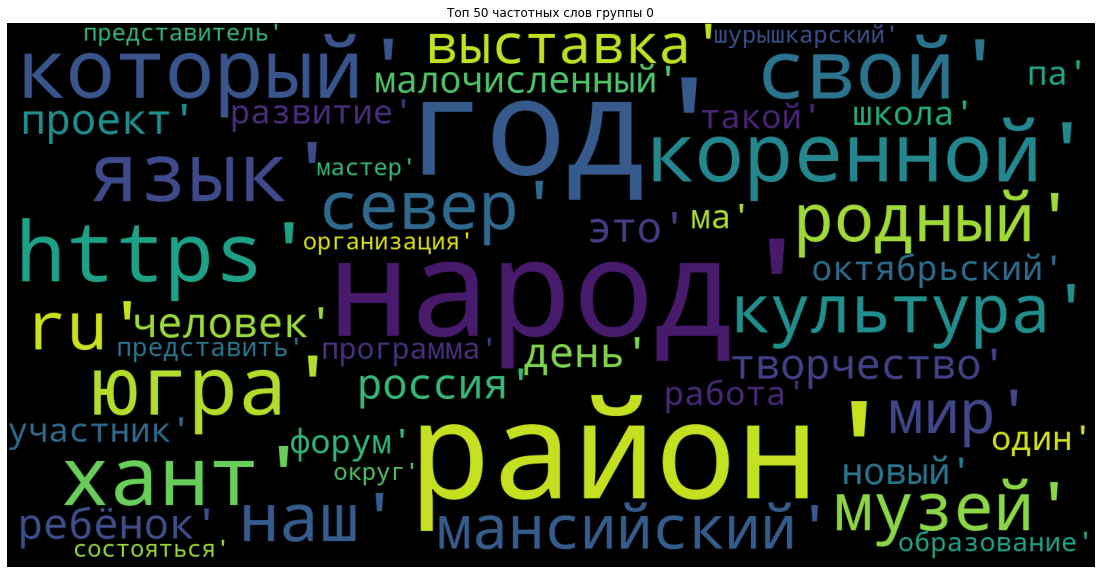

In [237]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_copy_text0_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

###### Группа 1

In [238]:
df_copy_text_1['copy_text']

0      молодой парламентарий курганский область 10 го...
1      сегодня рамка проект «интерактивный встреча «к...
2      неделя назад получить президентский грант прод...
3      хранить история помнить прошлое будущее дс № 5...
4      наш вика курган организация пограничник заурал...
                             ...                        
893    это насыщенный неделя несколько программа свеж...
894    сегодня цикл публикация «открыть суеват» расск...
899                                         мастер класс
903    🗃пополнять фонд предмет культура юганский хант...
912    art challenge день 29 тема обувь экспонатыкото...
Name: copy_text, Length: 254, dtype: object

In [239]:
copy_text1_as_str = ''

In [240]:
for index, row in df_copy_text_1.iterrows(): 
    copy_text1_as_str = copy_text1_as_str + str(row['copy_text']) + ' '

При помощи регулярных выражений удалим лишние символы


In [241]:
copy_text1_as_str = re.sub('[,—\'\[\]]', '', copy_text1_as_str)
copy_text1_as_str

'молодой парламентарий курганский область 10 год 27 сентябрь 2012 год зарегистрировать club35608492 региональный общественный организация молодой парламентарий курганский область инициатор создание объединение стать активист общественный молодёжный палата курганский областной дума председатель новый нко избрать id19345804 станислав бессонов который продолжать руководить организация 10 год объединение пройти путь маленький инициативный группа сильный ресурсный организация один самый известный некоммерческий организация регион молодой парламентарий сегодня это уникальный проект стать современный зауральский бренд молодой герой народ зауралье 400 000 участник проект 5 000 мероприятие организация 1 000 волонтёр собственный площадка мультицентр смолин акция организация проходить 9 город 6 посёлок городской тип 419 сельсовет курганский область 24 грант число 7 президентский десятка депутат управленец прошедшее школа молодой парламентарий работать благо курганский область поздравлять член вол

Составим "словарь" из 50 наиболее частотных слов


In [242]:
copy_text1_tokens = word_tokenize(copy_text1_as_str)
copy_text1_text = nltk.Text(copy_text1_tokens)
fdist_copy_text1 = FreqDist(copy_text1_text)
fdist_copy_text1_most_c = fdist_copy_text1.most_common(50)

Визуализируем облако частотных слов


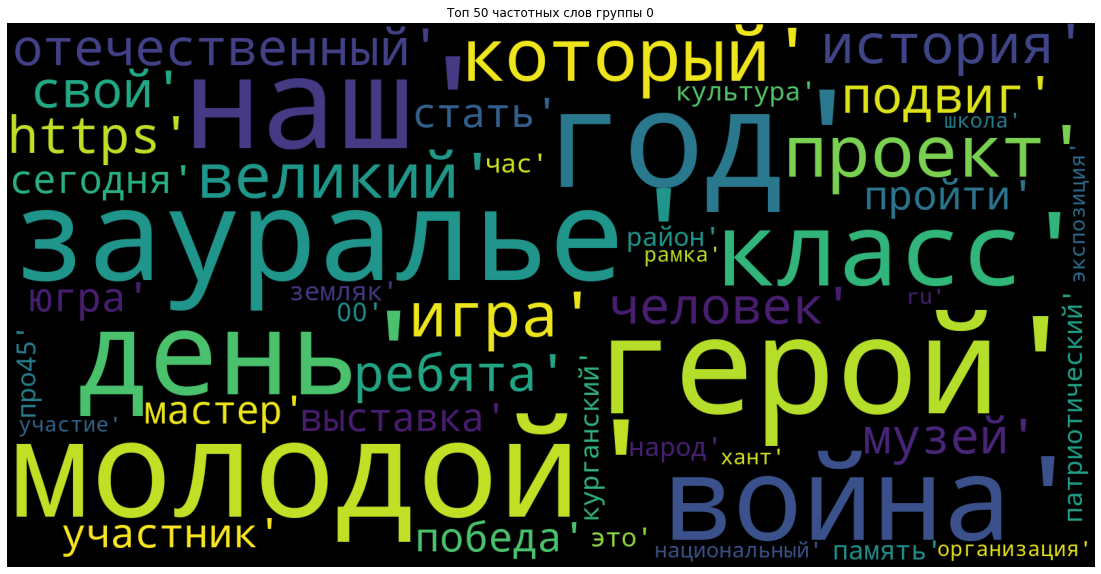

In [243]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_copy_text1_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

###### Группа 2

In [244]:
df_copy_text_2['copy_text']

106    мобилизовать парень нижневартовск мегион радуж...
109    нижневартовск поддержка «роснефти» её дочерний...
185    9 май 1945 год – это просто исторический дата ...
233    казаться земля комната всё остаться прежний вс...
239    хаӆщий муң асэв овас паӆаңич лапа вуй емпас ке...
                             ...                        
896    https vk com album 171484807 274070297 альбом ...
898    глубоко заблуждаться тот думать слово орнамент...
904    чудской древность национальный музей коми сфот...
906    🖐🏻выставка посвятить средневековый хантыйский ...
911    новосибирский этнограф показать интересный нах...
Name: copy_text, Length: 99, dtype: object

In [245]:
copy_text2_as_str = ''

In [246]:
for index, row in df_copy_text_2.iterrows(): 
    copy_text2_as_str = copy_text2_as_str + str(row['copy_text']) + ' '

При помощи регулярных выражений удалим лишние символы


In [247]:
copy_text2_as_str = re.sub('[,—\'\[\]]', '', copy_text2_as_str)
copy_text2_as_str

'мобилизовать парень нижневартовск мегион радужный нижневартовский район отправиться сегодня омск 💬 дело защита касаться наш родина кроме наш мужчина смочь защитить наш страна молиться наш защитник пусть господь хранить путь наш ребёнок должный знать история будущее понимать правильно реагировать фейковый информация недоброжелатель будущее забыть прошлое россия сильный государство проживать дружный многонациональный народ вместе сила сломить сказать id16812769 екатерина жуков вица президент общественный организация «спасение югры» трудно согласиться её слово рассказывать показывать подробность 👇🏻 мобилизация новостинижневартовск нижневартовск поддержка «роснефти» её дочерний общество «самотлорнефтегаз» пройти творческий молодёжный фестиваль мегаполисhd мегаполисновость югра 9 май 1945 год – это просто исторический дата это величие россия это сила дух наш многонациональный народ который мужественно противостоять любой агрессия извне бороться трудность готовый сделать возможный ради мир 

Составим "словарь" из 50 наиболее частотных слов


In [248]:
copy_text2_tokens = word_tokenize(copy_text2_as_str)
copy_text2_text = nltk.Text(copy_text2_tokens)
fdist_copy_text2 = FreqDist(copy_text2_text)
fdist_copy_text2_most_c = fdist_copy_text2.most_common(50)

Визуализируем облако частотных слов


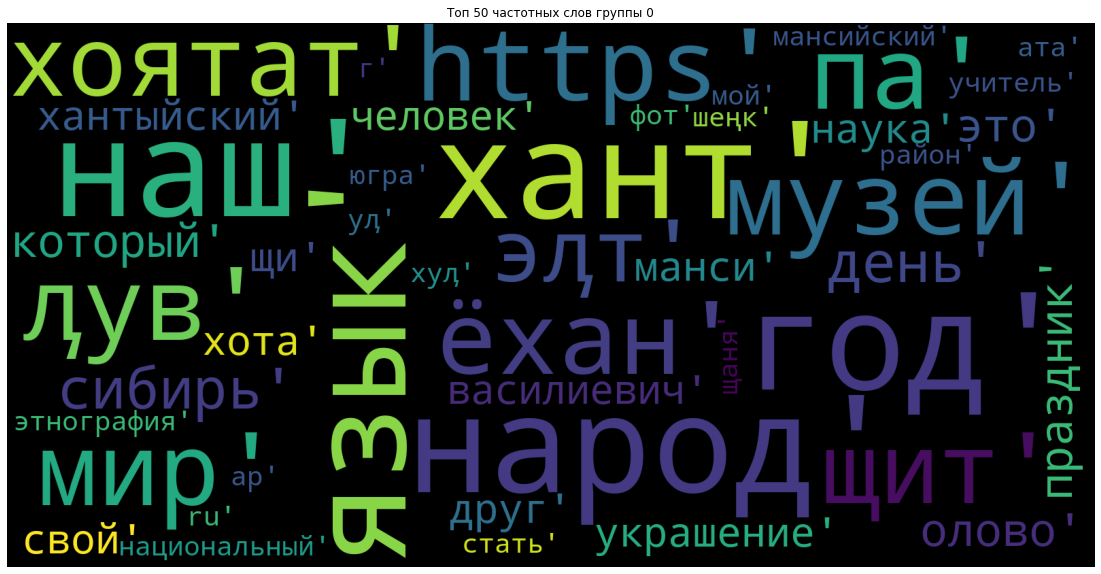

In [249]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_copy_text2_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

###### Группа 3

In [250]:
df_copy_text_3['copy_text']

100    4 6 октябрь 2022г г хант мансийск проходить кр...
101    ❗ город хант мансийск 6 7 октябрь пройти семин...
102    ✅ 4 6 октябрь 2022г г хант мансийск проходить ...
108    гость club173265908 «радуги» побывать советник...
110    ⭐ i школа общественный дипломатия кмн россия м...
                             ...                        
886    продолжать выкладывать фото мастерская кожа на...
897                                              умничка
900                                         право ошибка
907    🏛продолжать рассказывать свой фондах🏛 музыкаль...
909    линия судьба точка пересечение 💫 медвежий праз...
Name: copy_text, Length: 117, dtype: object

In [251]:
copy_text3_as_str = ''

In [252]:
for index, row in df_copy_text_3.iterrows(): 
    copy_text3_as_str = copy_text3_as_str + str(row['copy_text']) + ' '

При помощи регулярных выражений удалим лишние символы


In [253]:
copy_text3_as_str = re.sub('[,—\'\[\]]', '', copy_text3_as_str)
copy_text3_as_str

'4 6 октябрь 2022г г хант мансийск проходить крупный площадка гуманитарный сотрудничество участник реализация государственный национальный политика российский федерация – «всероссийский форум национальный единства» рамка форум проходить наш площадка «школа лидер коренной малочисленный народ югры» познакомиться современный технология сохранение родный язык опыт международный межрегиональный сотрудничество законодательный основа право коренной народ возможность грантовый поддержка собственный инициатива принять участие тематический семинар деловой игра практикум играть игра проект «нумас юнт» центр культурный наследие хант волдин который проводить id301855138 виктор банк ещё состояться долгожданный встреча id29915444 тимофей молдановое который подарить книга собственный написания😊 всероссийскийфорумнациональногоединство форумнациональногоединство ❗ город хант мансийск 6 7 октябрь пройти семинар совещание представитель орган местный самоуправление руководитель молодёжный центр главный цел

Составим "словарь" из 50 наиболее частотных слов


In [254]:
copy_text3_tokens = word_tokenize(copy_text3_as_str)
copy_text3_text = nltk.Text(copy_text3_tokens)
fdist_copy_text3 = FreqDist(copy_text3_text)
fdist_copy_text3_most_c = fdist_copy_text3.most_common(50)

Визуализируем облако частотных слов


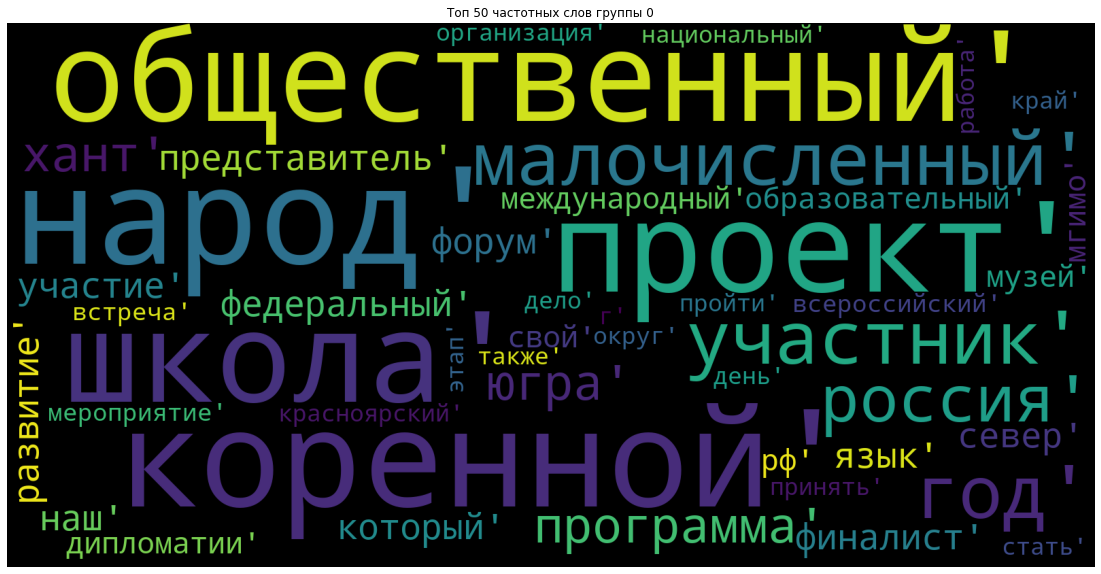

In [255]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_copy_text3_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

###### Группа 4

In [256]:
df_copy_text_4['copy_text']

91     🌲 р тром аган перевод «божий река» ✅ река мног...
95                                                 связь
104    больший дружный команда общественник югра ямал...
113    концерт приглашение экоцентр город мегион откр...
118                                  live мау «экоцентр»
                             ...                        
861    «непотерянный миры» этнофутуризм выставка «неп...
863    📖настоящий издание представлять себя сборник п...
868    17июляденьэтнографароссия лукин надежда васили...
882    🦌 2000 человек съехаться 20 март русскинский п...
887    девушка спасибо делиться работать рыбий кожа р...
Name: copy_text, Length: 138, dtype: object

In [257]:
copy_text4_as_str = ''

In [258]:
for index, row in df_copy_text_4.iterrows(): 
    copy_text4_as_str = copy_text4_as_str + str(row['copy_text']) + ' '

При помощи регулярных выражений удалим лишние символы


In [259]:
copy_text4_as_str = re.sub('[,—\'\[\]]', '', copy_text4_as_str)
copy_text4_as_str

'🌲 р тром аган перевод «божий река» ✅ река многолетний история жить хант хант жизньвлес север связь больший дружный команда общественник югра ямал поздравлять один выдающийся лидер коренной малочисленный народ север александр вячеславович новьюхов id630114081 александр новьюх проделать большой путь посвятить служение родный народ родный земля родный страна концерт приглашение экоцентр город мегион открытие vii региональный фестиваль «хатлые» ☀️солнышко радушный гостеприимный человек 💖 хатлый музыка человек звук любовь live мау «экоцентр» принять участие торжественный церемония награждение посвятить день государственный флаг россии🇷🇺 состояться дворец искусство нижневартовск поздравить имя депутат дума югра вручить заслужить награда благодарственный письмо совет федерация федеральный собрание россия хунзи светлана андреевич председатель община коренной малочисленный народ север «хунзи» почётный грамота дума югра 👏 воробьевый инна владимирович заместитель директор средний школа №32 👏сурк

Составим "словарь" из 50 наиболее частотных слов


In [260]:
copy_text4_tokens = word_tokenize(copy_text4_as_str)
copy_text4_text = nltk.Text(copy_text4_tokens)
fdist_copy_text4 = FreqDist(copy_text4_text)
fdist_copy_text4_most_c = fdist_copy_text4.most_common(50)

Визуализируем облако частотных слов


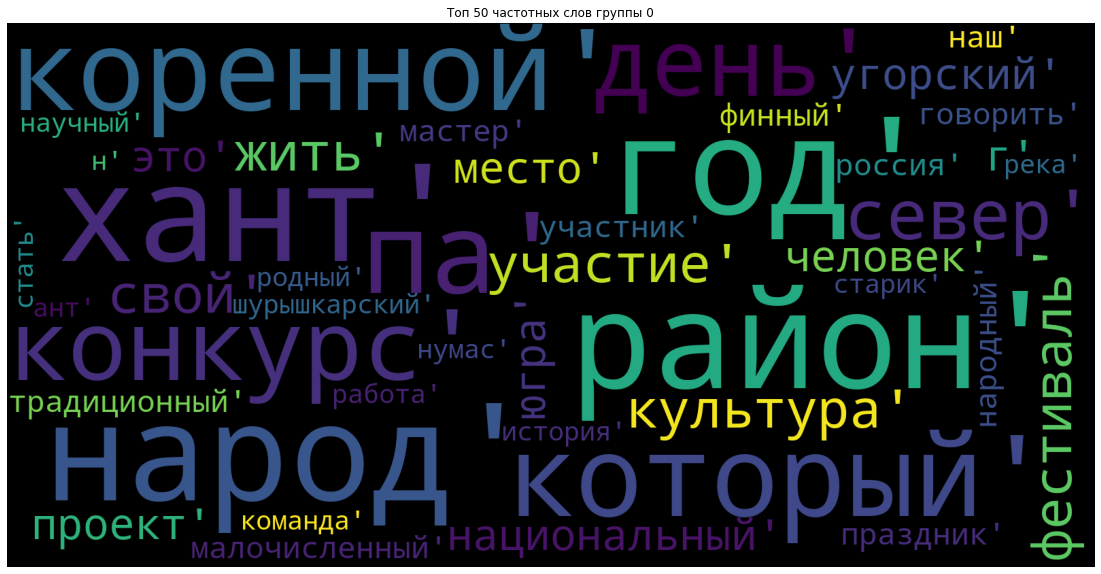

In [261]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_copy_text4_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

###### Группа 5

In [262]:
df_copy_text_5['copy_text']

92     проделать больший работа достигнуть тот резуль...
97     хант это финный угорский народ вообще перевод ...
99     ❗традиция будущее❗ 😃 ребёнок любой поколение б...
107    выходной пройти весело интересно польза вместе...
125    утро играть участник club41305677 комьюнити фо...
                             ...                        
895    окружный дом народный творчество студия «живой...
901                                    держать знать мой
902    мастерица id260730040 зинаида климов панаевска...
908    акция бабушкин акануть участник михляева татья...
910    акция бабушкин акануть участник фирсова ирина ...
Name: copy_text, Length: 211, dtype: object

In [263]:
copy_text5_as_str = ''

In [264]:
for index, row in df_copy_text_5.iterrows(): 
    copy_text5_as_str = copy_text5_as_str + str(row['copy_text']) + ' '

При помощи регулярных выражений удалим лишние символы


In [265]:
copy_text5_as_str = re.sub('[,—\'\[\]]', '', copy_text5_as_str)
copy_text5_as_str

'проделать больший работа достигнуть тот результат который сегодня уверенный работа дерево возродить ремесло наш предок ремесло северный народ хант это финный угорский народ вообще перевод слово «ханты» хантыйский язык означать человек поэтому ребята хант нож называться угр ✅ ❗традиция будущее❗ 😃 ребёнок любой поколение быть прошлое столетие либо нынешний любить играть игра коренной малочисленный народ север очень интересный главное полезный развивать игра club161818002 центр культурный наследие хант волдин представить уникальный проект «нумас юнт» напольный игра палочка щоԓ туслый кстати проект поддержать президентский фонд культурный инициатива 💥 представлять течение год округ создать центр напольный игра проходить муниципальный турнир самый хороший игрок 8 октябрь приехать город хант мансийск i региональный соревнование «нумас юнт» напольный игра палочка щоԓ туслый 😊👉🏻 ребёнок молодёжь число коренной малочисленный народ север красивый традиционный одежда огромный азарт играть игра в

Составим "словарь" из 50 наиболее частотных слов


In [266]:
copy_text5_tokens = word_tokenize(copy_text5_as_str)
copy_text5_text = nltk.Text(copy_text5_tokens)
fdist_copy_text5 = FreqDist(copy_text5_text)
fdist_copy_text5_most_c = fdist_copy_text5.most_common(50)

Визуализируем облако частотных слов


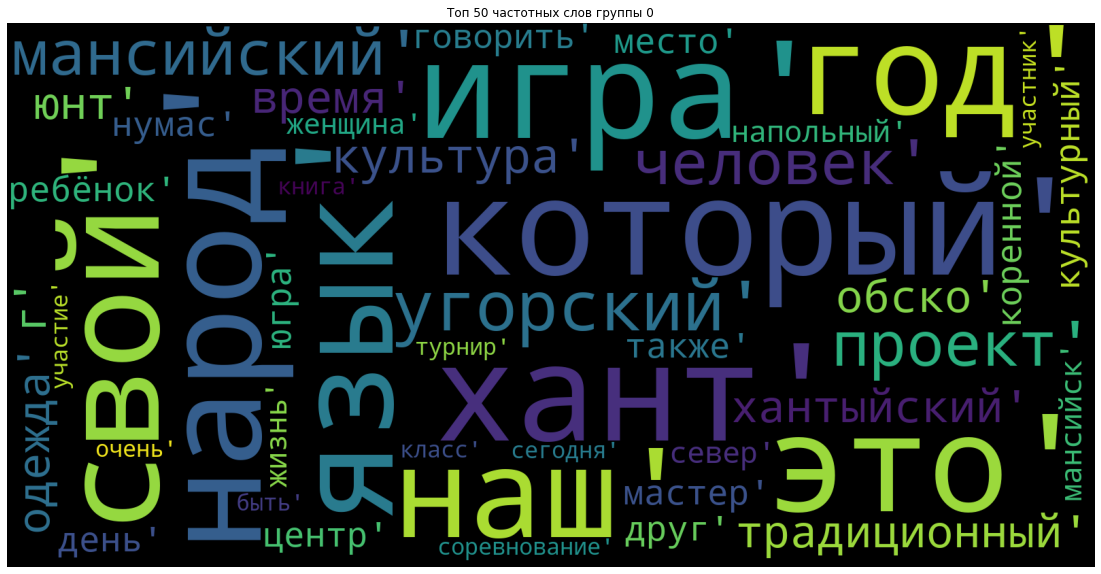

In [267]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_copy_text5_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

##### Likes

In [268]:
like_mean_0 = df_copy_text_0['likes_count'].mean()
like_mean_0

4.8936170212765955

In [269]:
like_mean_1 = df_copy_text_1['likes_count'].mean()
like_mean_1

6.149606299212598

In [270]:
like_mean_2 = df_copy_text_2['likes_count'].mean()
like_mean_2

5.393939393939394

In [271]:
like_mean_3 = df_copy_text_3['likes_count'].mean()
like_mean_3

3.3162393162393164

In [272]:
like_mean_4 = df_copy_text_4['likes_count'].mean()
like_mean_4

7.471014492753623

In [273]:
like_mean_5 = df_copy_text_5['likes_count'].mean()
like_mean_5

6.834123222748815

В целом, мы видим, что репосты собирают меньше лайков. Если смотреть на градацию, то она такая:
 * фольклор (7,47) > повседневность (6,83) > патриотизм (6,14) >  культура и быт (5,39) > конференции (4,89) > международные конкурсы (3,32)

##### Comments

In [28]:
comments_mean_0 = df_copy_text_0['comments_count'].mean()
comments_mean_0

0.35106382978723405

In [29]:
comments_mean_1 = df_copy_text_1['comments_count'].mean()
comments_mean_1

0.1220472440944882

In [30]:
comments_mean_2 = df_copy_text_2['comments_count'].mean()
comments_mean_2

0.18181818181818182

In [31]:
comments_mean_3 = df_copy_text_3['comments_count'].mean()
comments_mean_3

0.17094017094017094

In [32]:
comments_mean_4 = df_copy_text_4['comments_count'].mean()
comments_mean_4

0.391304347826087

In [33]:
comments_mean_5 = df_copy_text_5['comments_count'].mean()
comments_mean_5

0.27014218009478674

Касательно комментариев, на репостах их тоже в целом сильно меньше. Про темы, ситуация следующая:
 * фольклор (0,39) > конференции (0,35) > повседневность (0,27) > культура и быт(0,18) > международные конкурсы (0,17) > патриотизм (0,12)

##### Reposts

In [280]:
reposts_mean_0 = df_copy_text_0['reposts'].mean()
reposts_mean_0

0.5212765957446809

In [281]:
reposts_mean_1 = df_copy_text_1['reposts'].mean()
reposts_mean_1

0.5748031496062992

In [282]:
reposts_mean_2 = df_copy_text_2['reposts'].mean()
reposts_mean_2

0.8282828282828283

In [283]:
reposts_mean_3 = df_copy_text_3['reposts'].mean()
reposts_mean_3

0.37606837606837606

In [284]:
reposts_mean_4 = df_copy_text_4['reposts'].mean()
reposts_mean_4

0.7318840579710145

In [286]:
reposts_mean_5 = df_copy_text_5['reposts'].mean()
reposts_mean_5

0.8483412322274881

Репостов на репостах тоже сильно меньше. По темам:
 * повседневность (0.85) > культура и быт (0.82) > фольклор (0.73) > патриотизм (0.57) > конференции (0.52) > международные конкурсы (0.37)

##### Views

In [287]:
reposts_mean_0 = df_copy_text_0['views'].mean()
reposts_mean_0

220.87234042553192

In [288]:
reposts_mean_1 = df_copy_text_1['views'].mean()
reposts_mean_1

217.1535433070866

In [289]:
reposts_mean_2 = df_copy_text_2['views'].mean()
reposts_mean_2

185.4949494949495

In [290]:
reposts_mean_3 = df_copy_text_3['views'].mean()
reposts_mean_3

119.46153846153847

In [291]:
reposts_mean_4 = df_copy_text_4['views'].mean()
reposts_mean_4

262.768115942029

In [292]:
reposts_mean_5 = df_copy_text_5['views'].mean()
reposts_mean_5

224.0047393364929

Просмотров тоже на репостах меньше. По градации тем:
 * фольклор (263) > повседневность (224) > конференции (220) > патриотизм (217) > культура ии быт (185) > международные конкурсы (119) 

#### Comments

In [293]:
df_comments = df[df['comments'] != '0']

In [294]:
df_comments = df_comments.reset_index(drop=True)

In [296]:
df_comments['comments']

0      👏👏👏👍 истинный красавчик ещё мудрый 🔥 сказать б...
1      печально жаль это украина красиво лето😒 айвас ...
2      👍👍👍 красавчик хант хороший 👏👏👏 айвас рулить 🔥🔥...
3      круто 👍 катец👍 акробаты😂 наш традиционный обра...
4      катонкий делать система нужный ещё забор☝ моло...
                             ...                        
325    курильский язык айн rw rw tom wn qwr ytah ta n...
326                                      молодец виталий
327                           давно слышать родный речь❤
328    очень красивый исполнение перевод «день победы...
329    добрый день сумочка разный форма декоративный ...
Name: comments, Length: 330, dtype: object

In [297]:
count_vect = CountVectorizer()
doc_term_matrix = count_vect.fit_transform(df_comments['comments'].values.astype('U'))

In [312]:
LDA = LatentDirichletAllocation(n_components=4, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=4, random_state=42)

In [313]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 30 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 30 words for topic #0:
['поздравление', 'елла', 'благополучие', 'родный', 'пусть', 'творческий', 'очень', 'год', 'па', 'хант', 'любовь', 'ваш', 'юбилей', 'жизнь', 'удача', 'ильич', 'спасибо', 'весь', 'ям', 'цена', 'хороший', 'счастие', 'людмила', 'желать', 'успех', 'молодец', 'рождение', 'поздравлять', 'здоровье', 'день']


Top 30 words for topic #1:
['песня', 'знать', 'наш', 'ма', 'очень', 'ар', 'проходить', 'ребёнок', 'человек', 'молодец', 'любить', 'язык', 'умащий', 'петь', 'ходить', 'тамара', 'яма', 'брусника', 'тум', 'хант', 'сказка', 'ата', 'такой', 'щи', 'тумтака', 'елла', 'па', 'шек', 'спасибо', 'ям']


Top 30 words for topic #2:
['ваш', 'супер', 'фото', 'олень', 'слово', 'жить', 'держать', 'свой', 'ям', 'нравиться', 'класс', 'какой', 'наш', 'делать', 'поздравлять', 'год', 'нож', 'такой', 'удача', 'хороший', 'привет', 'спасибо', 'владимирович', 'софья', 'очень', 'человек', 'красота', 'это', 'хант', 'молодец']


Top 30 words for topic #3:
['история', 'гора', 'голова', 'манси

Эмпирическим путём было выяснено, что наиболее разумным является деление на 4 группы:
 * поздравления
 * патриотические высказывания
 * оценка 
 * история

In [314]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(330, 4)

In [315]:
df_comments['Topic'] = topic_values.argmax(axis=1)

In [316]:
df_comments['Topic'].value_counts()

2    104
0     97
1     69
3     60
Name: Topic, dtype: int64

Мы видим, что наиболее популярны комментарии с оценкой (104), далее идут поздравления (97), затем патриотические высказывания (69) и в конце истории (60)

In [317]:
df_comments.to_csv('df_comments.csv', index = False)

##### Графики

In [318]:
df_comments = pd.read_csv('df_comments.csv')

In [319]:
df_comments

from_id   owner_id                                     domain  \
0   -143613888 -143613888  https://vk.com/feed?w=wall-143613888_1924   
1   -143613888 -143613888  https://vk.com/feed?w=wall-143613888_1909   
2   -143613888 -143613888  https://vk.com/feed?w=wall-143613888_1876   
3   -143613888 -143613888  https://vk.com/feed?w=wall-143613888_1864   
4   -143613888 -143613888  https://vk.com/feed?w=wall-143613888_1831   
..         ...        ...                                        ...   
325   -9239445   -9239445    https://vk.com/feed?w=wall-9239445_1912   
326   -9239445   -9239445    https://vk.com/feed?w=wall-9239445_1905   
327   -9239445   -9239445    https://vk.com/feed?w=wall-9239445_1903   
328   -9239445   -9239445    https://vk.com/feed?w=wall-9239445_1899   
329  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_401   

                    date                                               text  \
0    2022-10-09 19:29:19  слушать путешествие любой время это кайф предс...   
1    2022-09-28 14:34:55               понестись сезон скоро открыть зимний   
2    2022-09-16 17:57:23          порыбачить спорить бросок сделать поймать   
3    2022-09-14 17:51:19                    добыча рыба традиционный способ   
4    2022-09-09 15:55:46  добыча рыба способ учить наш предок способный ...   
..                   ...                                                ...   
325  2021-06-01 16:48:46                                                  0   
326  2021-05-19 09:38:08                                                  0   
327  2021-05-17 10:42:38                         https youtu be vrxfkukbgya   
328  2021-05-15 13:00:11                         https youtu be ulr 0qtkk88   
329  2021-01-18 10:45:31                                                  0   

                                             copy_text            copy_date  \
0                                                    0                  NaN   
1                                                    0                  NaN   
2                                                    0                  NaN   
3                                                    0                  NaN   
4                                                    0                  NaN   
..                                                 ...                  ...   
325                        md id27513598 инесса яунгад  2021-06-01 14:19:12   
326  пӛтьä вәть пәҷ вө̆ԓ вўщий вәӆата пащий о̄лэн з...  2021-05-19 09:26:18   
327                                                  0                  NaN   
328                                                  0                  NaN   
329  мужской сумочка оленевод охотник условие тайга...  2021-01-18 06:15:22   

     likes_count  comments_count  reposts  ...  comments_num_of_unique_word  \
0            343              28        3  ...                           47   
1            158              13        5  ...                           17   
2            356              30       10  ...                           30   
3            203               5        9  ...                           14   
4            244               9       18  ...                           61   
..           ...             ...      ...  ...                          ...   
325           28               1        3  ...                           25   
326            7               1        2  ...                            2   
327           16               1        7  ...                            8   
328            9               1        3  ...                            9   
329            6               2        9  ...                           27   

    comments_num_of_letters comments_num_of_punct comments_num_of_words_upper  \
0                       334                    28                           1   
1                       101                     6                           0   
2                       241                    27   

In [320]:
df_comments_0 = df_comments[df_comments['Topic'] == 0]

In [321]:
df_comments_1 = df_comments[df_comments['Topic'] == 1]

In [322]:
df_comments_2 = df_comments[df_comments['Topic'] == 2]

In [323]:
df_comments_3 = df_comments[df_comments['Topic'] == 3]

##### Гистограммы

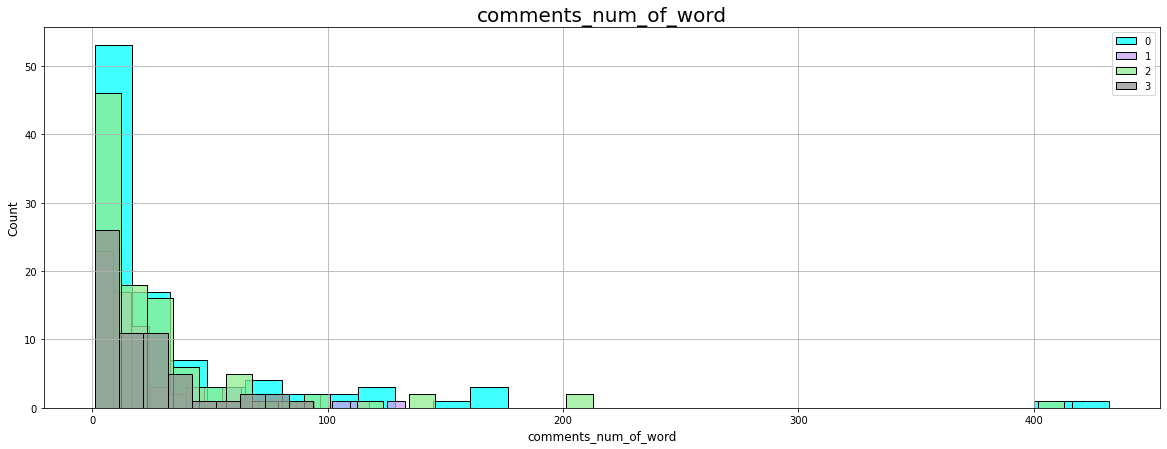

In [326]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_word', fontsize=20)
sns.histplot(df_comments_0['comments_num_of_word'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_comments_1['comments_num_of_word'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_comments_2['comments_num_of_word'], color='#90EE90', kde=False, label='2');
sns.histplot(df_comments_3['comments_num_of_word'], color='#929591', kde=False, label='3');
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_word', fontsize=12)
plt.legend()

plt.grid(True);

In [327]:
fig = px.histogram(df_comments, x="comments_num_of_word", color="Topic")
fig.show()

 * под постами с тематикой поздравления в среднем меньше 50 слов, но встречаются выбросы до более чем 430 слов
 * под постами с тематикой патриотизма в среднем меньше 20 слов, выбросы доходят до более чем 130 слов
 * под постами с тематикой оценки в среднем меньше 30 слов, выбросы доходят до более чем 410
 * под постами с тематикой историй в среднем меньше 20 слов, выбросы доходят до 100 слов

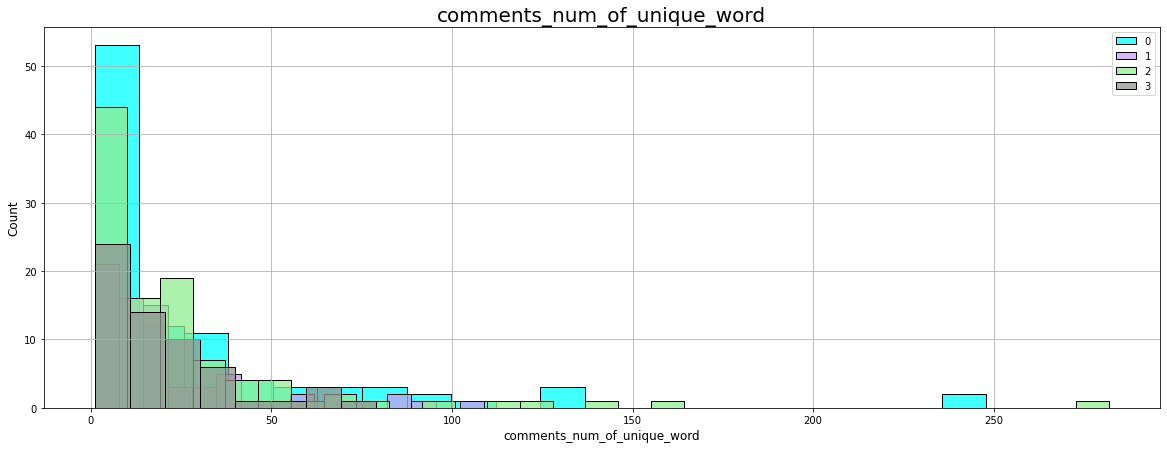

In [328]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_unique_word', fontsize=20)
sns.histplot(df_comments_0['comments_num_of_unique_word'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_comments_1['comments_num_of_unique_word'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_comments_2['comments_num_of_unique_word'], color='#90EE90', kde=False, label='2');
sns.histplot(df_comments_3['comments_num_of_unique_word'], color='#929591', kde=False, label='3');
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_unique_word', fontsize=12)
plt.legend()

plt.grid(True);

In [329]:
fig = px.histogram(df_comments, x="comments_num_of_unique_word", color="Topic")
fig.show()

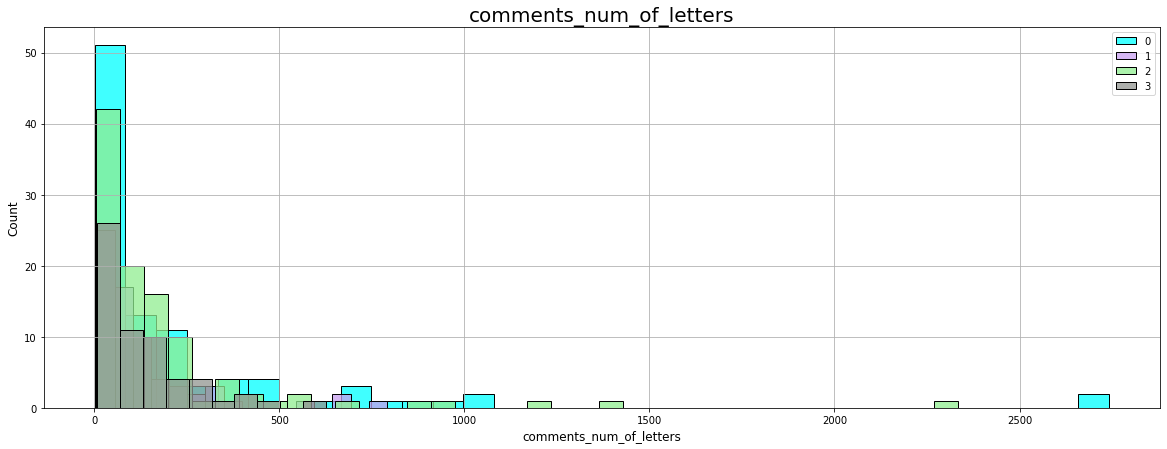

In [330]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_letters', fontsize=20)
sns.histplot(df_comments_0['comments_num_of_letters'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_comments_1['comments_num_of_letters'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_comments_2['comments_num_of_letters'], color='#90EE90', kde=False, label='2');
sns.histplot(df_comments_3['comments_num_of_letters'], color='#929591', kde=False, label='3');
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_letters', fontsize=12)
plt.legend()

plt.grid(True);

In [331]:
fig = px.histogram(df_comments, x="comments_num_of_letters", color="Topic")
fig.show()

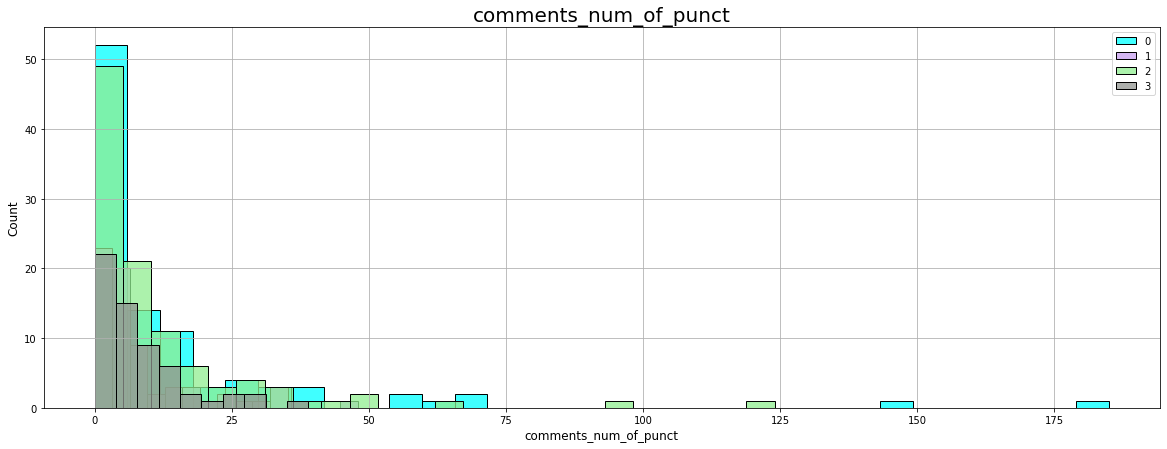

In [332]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_punct', fontsize=20)
sns.histplot(df_comments_0['comments_num_of_punct'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_comments_1['comments_num_of_punct'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_comments_2['comments_num_of_punct'], color='#90EE90', kde=False, label='2');
sns.histplot(df_comments_3['comments_num_of_punct'], color='#929591', kde=False, label='3');
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_punct', fontsize=12)
plt.legend()

plt.grid(True);

In [333]:
fig = px.histogram(df_comments, x="comments_num_of_punct", color="Topic")
fig.show()

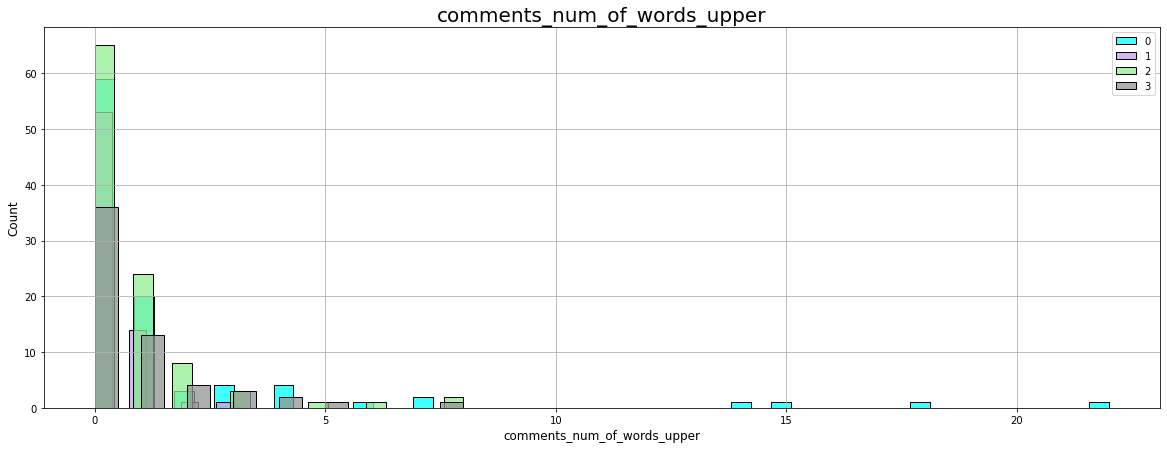

In [334]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_words_upper', fontsize=20)
sns.histplot(df_comments_0['comments_num_of_words_upper'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_comments_1['comments_num_of_words_upper'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_comments_2['comments_num_of_words_upper'], color='#90EE90', kde=False, label='2');
sns.histplot(df_comments_3['comments_num_of_words_upper'], color='#929591', kde=False, label='3');
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_words_upper', fontsize=12)
plt.legend()

plt.grid(True);

In [335]:
fig = px.histogram(df_comments, x="comments_num_of_words_upper", color="Topic")
fig.show()

В среднем, слов, написанных капсом не так много под постами каждой тематики и распределения выглядят похоже. Но выбросы больше других встречаются в тематики поздравления и доходят до 22 слов капсом под одним постом

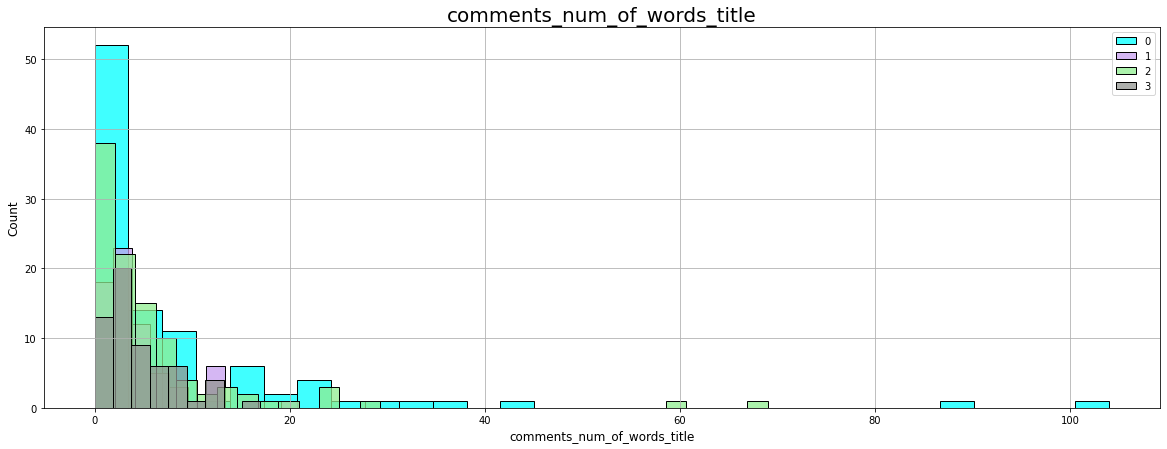

In [336]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_words_title', fontsize=20)
sns.histplot(df_comments_0['comments_num_of_words_title'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_comments_1['comments_num_of_words_title'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_comments_2['comments_num_of_words_title'], color='#90EE90', kde=False, label='2');
sns.histplot(df_comments_3['comments_num_of_words_title'], color='#929591', kde=False, label='3');
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_words_title', fontsize=12)
plt.legend()

plt.grid(True);

In [337]:
fig = px.histogram(df_comments, x="comments_num_of_words_title", color="Topic")
fig.show()

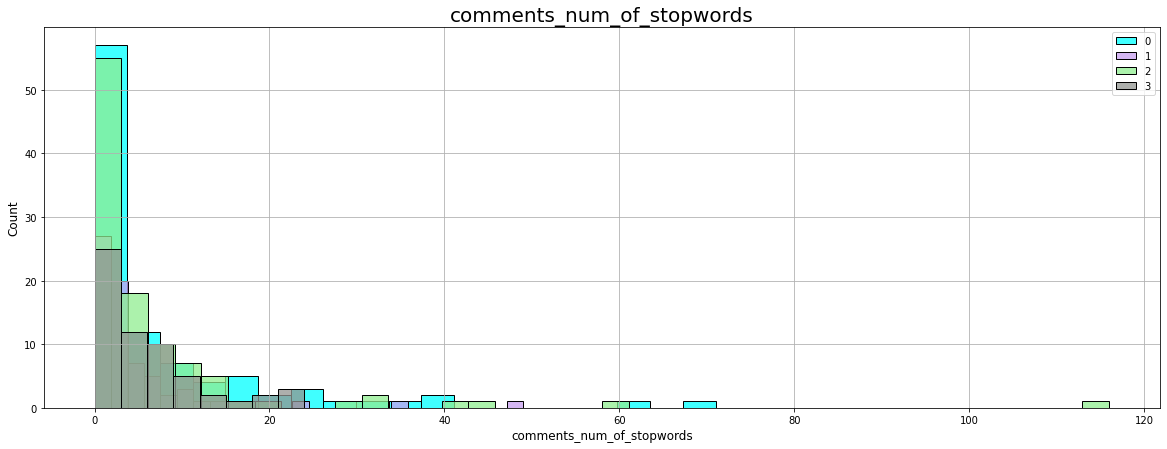

In [338]:
plt.figure(figsize=(20, 7))
plt.title('comments_num_of_stopwords', fontsize=20)
sns.histplot(df_comments_0['comments_num_of_stopwords'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_comments_1['comments_num_of_stopwords'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_comments_2['comments_num_of_stopwords'], color='#90EE90', kde=False, label='2');
sns.histplot(df_comments_3['comments_num_of_stopwords'], color='#929591', kde=False, label='3');
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_num_of_stopwords', fontsize=12)
plt.legend()

plt.grid(True);

In [339]:
fig = px.histogram(df_comments, x="comments_num_of_stopwords", color="Topic")
fig.show()

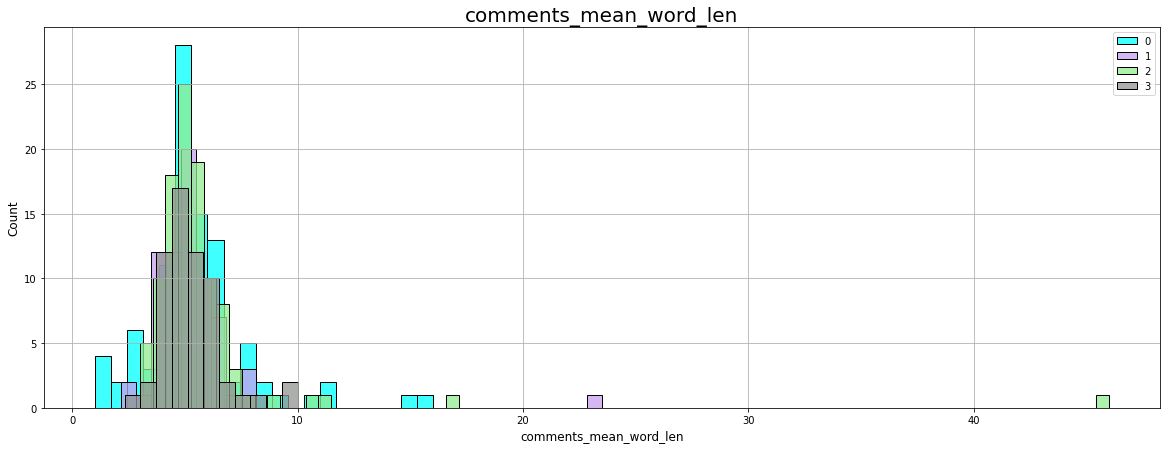

In [340]:
plt.figure(figsize=(20, 7))
plt.title('comments_mean_word_len', fontsize=20)
sns.histplot(df_comments_0['comments_mean_word_len'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_comments_1['comments_mean_word_len'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_comments_2['comments_mean_word_len'], color='#90EE90', kde=False, label='2');
sns.histplot(df_comments_3['comments_mean_word_len'], color='#929591', kde=False, label='3');
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_mean_word_len', fontsize=12)
plt.legend()

plt.grid(True);

In [341]:
fig = px.histogram(df_comments, x="comments_mean_word_len", color="Topic")
fig.show()

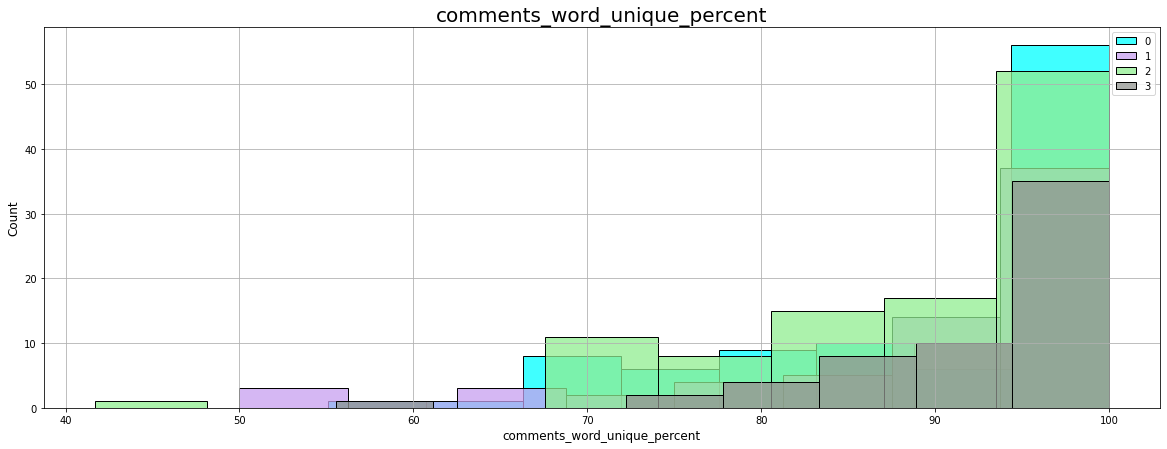

In [342]:
plt.figure(figsize=(20, 7))
plt.title('comments_word_unique_percent', fontsize=20)
sns.histplot(df_comments_0['comments_word_unique_percent'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_comments_1['comments_word_unique_percent'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_comments_2['comments_word_unique_percent'], color='#90EE90', kde=False, label='2');
sns.histplot(df_comments_3['comments_word_unique_percent'], color='#929591', kde=False, label='3');
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_word_unique_percent', fontsize=12)
plt.legend()

plt.grid(True);

In [343]:
fig = px.histogram(df_comments, x="comments_word_unique_percent", color="Topic")
fig.show()

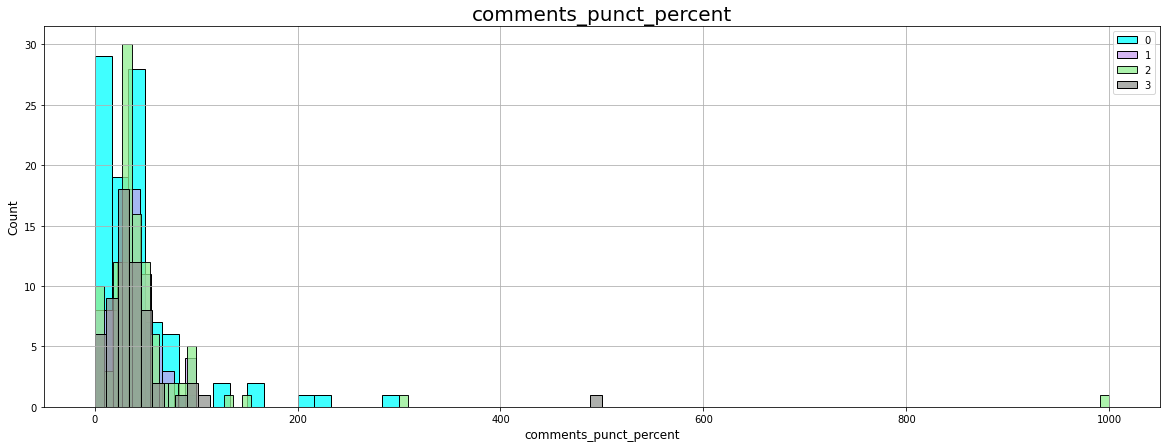

In [344]:
plt.figure(figsize=(20, 7))
plt.title('comments_punct_percent', fontsize=20)
sns.histplot(df_comments_0['comments_punct_percent'], color='#00FFFF', kde=False, label='0');
sns.histplot(df_comments_1['comments_punct_percent'], color='#C79FEF', kde=False, label='1');
sns.histplot(df_comments_2['comments_punct_percent'], color='#90EE90', kde=False, label='2');
sns.histplot(df_comments_3['comments_punct_percent'], color='#929591', kde=False, label='3');
plt.ylabel('Count', fontsize=12)
plt.xlabel('comments_punct_percent', fontsize=12)
plt.legend()

plt.grid(True);

In [345]:
fig = px.histogram(df_comments, x="comments_punct_percent", color="Topic")
fig.show()

In [325]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   from_id                       330 non-null    int64  
 1   owner_id                      330 non-null    int64  
 2   domain                        330 non-null    object 
 3   date                          330 non-null    object 
 4   text                          329 non-null    object 
 5   copy_text                     330 non-null    object 
 6   copy_date                     86 non-null     object 
 7   likes_count                   330 non-null    int64  
 8   comments_count                330 non-null    int64  
 9   reposts                       330 non-null    int64  
 10  views                         330 non-null    int64  
 11  likers                        316 non-null    object 
 12  comments                      329 non-null    object 
 13  comme

##### Word Cloud

###### Группа 0

In [346]:
df_comments_0['comments']

3      круто 👍 катец👍 акробаты😂 наш традиционный обра...
4      катонкий делать система нужный ещё забор☝ моло...
8      🤗 зима гора 😍😍😍🤗🤗🤗👍👍👍❤❤❤ класс обалденный фотк...
11     ягель ❤❤❤❤❤❤умница золотой добрый день вы связ...
15     гриб красавчик ✌️ круто❤ 👍👍👍 сказать место здр...
                             ...                        
321                                                  👍👌💖
322                                            👏👏👏👍👍👍🌷🌷🌷
326                                      молодец виталий
328    очень красивый исполнение перевод «день победы...
329    добрый день сумочка разный форма декоративный ...
Name: comments, Length: 97, dtype: object

In [347]:
comments0_as_str = ''

In [348]:
for index, row in df_comments_0.iterrows(): 
    comments0_as_str = comments0_as_str + str(row['comments']) + ' '

При помощи регулярных выражений удалим лишние символы


In [349]:
comments0_as_str = re.sub('[,—\'\[\]]', '', comments0_as_str)
comments0_as_str

'круто 👍 катец👍 акробаты😂 наш традиционный образ ловля рыба хант шурышкарский район катонкий делать система нужный ещё забор☝ молодец классно 👍🤗 интересно ваш предок ловить такой способ молодец забывать свой традиция предок владимир айваседой 👍💣💥 здорово молодец хант корчага деревня пискарий ловить сухарь закинуть внутрь закинуть настоящий трудяга жить дикий природа питаться дар прекрасно счастливый человек здоровье 🤗 зима гора 😍😍😍🤗🤗🤗👍👍👍❤❤❤ класс обалденный фотка зима свой плюс точнее минус минус это комар они надоедающие😁 👍 👍 молодец братишка сразу видно местный абориген пускай зов предок душа фото🔥🔥👍👍 👍👍👍👍 фото класс здорово просто великолепно ягель ❤❤❤❤❤❤умница золотой добрый день вы связаться повод нож молодец👍👍👍👍 кросава 👍🏻🌲 гость приехать пара год молодец какой ясный чёткий понимание свой предназначение полезный родный край любовь земля предок начинаться великий дело успех 👍👏✊ молодец 👍✌ 👍🏻 👍 некоторый просто видеть оттащить ухо красота гриб красавчик ✌️ круто❤ 👍👍👍 сказать место 

Составим "словарь" из 50 наиболее частотных слов


In [350]:
comments0_tokens = word_tokenize(comments0_as_str)
comments0_text = nltk.Text(comments0_tokens)
fdist_comments0 = FreqDist(comments0_text)
fdist_comments0_most_c = fdist_comments0.most_common(50)

Визуализируем облако частотных слов


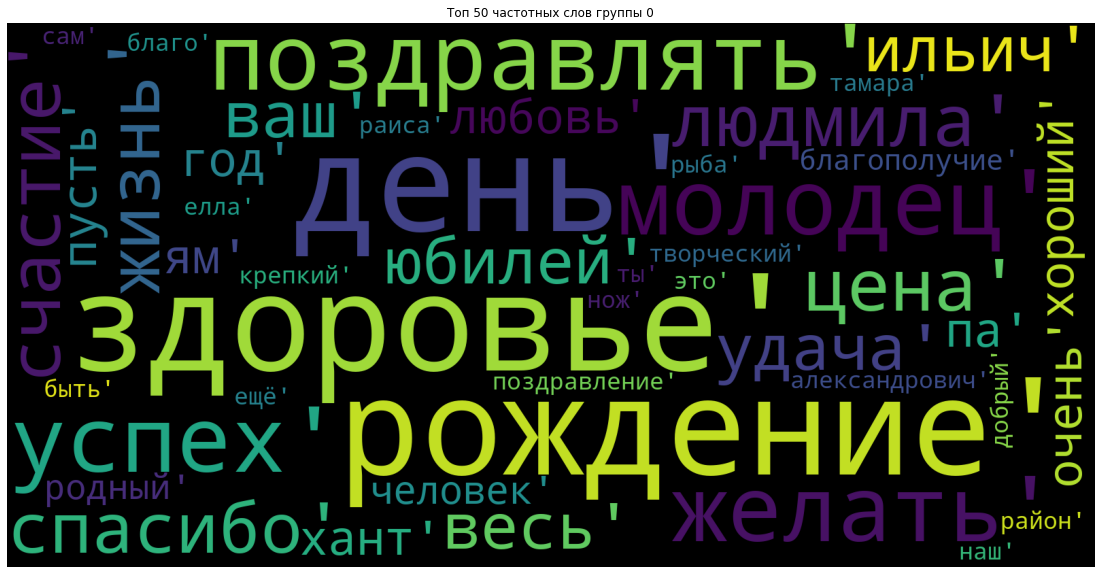

In [351]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_comments0_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

###### Группа 1

In [352]:
df_comments_1['comments']

1      печально жаль это украина красиво лето😒 айвас ...
2      👍👍👍 красавчик хант хороший 👏👏👏 айвас рулить 🔥🔥...
9      красава вущий улата хан ехата классно 👍 супер ...
12     красава 💪💪💪 босиком 😳 ой красавчик морс👍 ям щи...
13     красавчик беречь щука озёрный 10 17кг бро прик...
                             ...                        
306    группа «ковчега» написать собака иметь возможн...
308    пункт приём стать ненужный животное город лото...
309                                найтись спасибо вечер
311                   сак ёмас мария тихонович пумащип 🤗
318    пожалуйста проходить мимо 🙏🙏🙏пожалуйст 10 50 1...
Name: comments, Length: 69, dtype: object

In [353]:
comments1_as_str = ''

In [354]:
for index, row in df_comments_1.iterrows(): 
    comments1_as_str = comments1_as_str + str(row['comments']) + ' '

При помощи регулярных выражений удалим лишние символы


In [355]:
comments1_as_str = re.sub('[,—\'\[\]]', '', comments1_as_str)
comments1_as_str

'печально жаль это украина красиво лето😒 айвас мобилизация проходить 👍👍👍 красавчик хант хороший 👏👏👏 айвас рулить 🔥🔥🔥 молодец коренной 👍👍👍 ям щи хослан умащий ванта 👍👍👍 👍 👍 🦈👍 👍 👍 красава пять тысяча переводить 😄 👍 брат красавчить красавчик😊 классный щука 👍👍👍 красава вущий улата хан ехата классно 👍 супер 👍👍👍 вчера ветреный вечер дождик полить красава 💪💪💪 босиком 😳 ой красавчик морс👍 ям щи ой неспелый собирать почернеть 🤔😢 пальщи щи па хошлый ан😁 👍👍👍👍👍 привет откуда столько ягель 👍👍👍 класс 👍👍 молодец трудяга 🍓🍓🍒 здоровый товарищ привет ты ямал 👍 👍👍 👍👍 красавчик беречь щука озёрный 10 17кг бро прикольно прыгать волна пускать бывало проваливаться весело 😁 😲 фига страшноватый 😯😞 это шутка провалиться счастливый удача выкарабкаться привет снять мама видео спрятаться видно мамуля привет огромный👍👍👍 👍👍👍👍👍 шест себя таскать опасно бояться такой место ходить такой болото знать наступать нужда нечего такой волна ходить опыт страшнота ранний ребёнок ходить плавун кататься качели 😆 родитель люля вы

Составим "словарь" из 50 наиболее частотных слов


In [356]:
comments1_tokens = word_tokenize(comments1_as_str)
comments1_text = nltk.Text(comments1_tokens)
fdist_comments1 = FreqDist(comments1_text)
fdist_comments1_most_c = fdist_comments1.most_common(50)

Визуализируем облако частотных слов


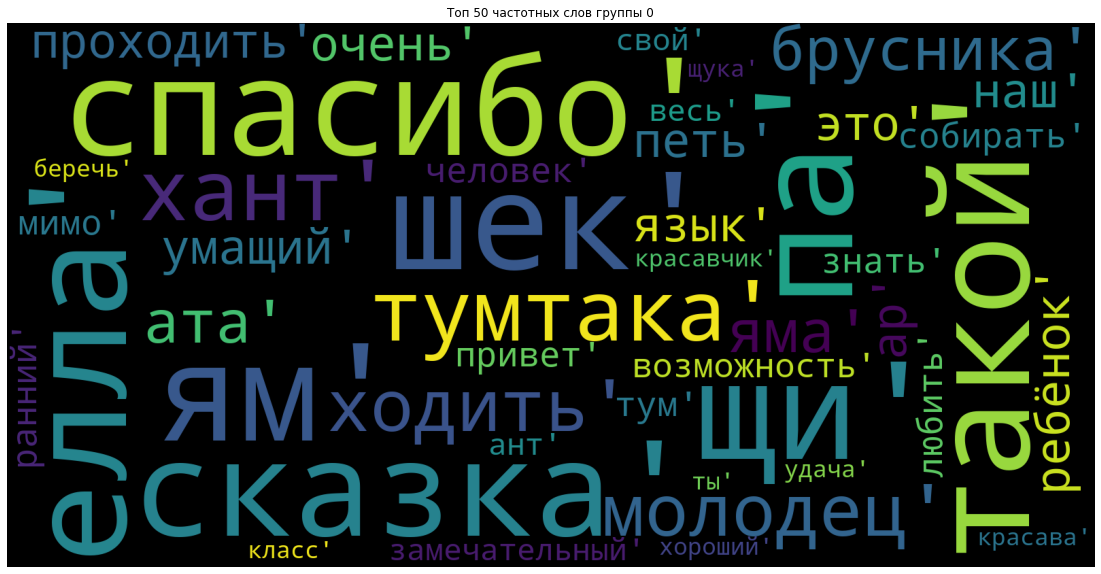

In [357]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_comments1_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

###### Группа 2

In [358]:
df_comments_2['comments']

0      👏👏👏👍 истинный красавчик ещё мудрый 🔥 сказать б...
5      😂👍 😄 🤣🤣🤣 приколист 🤣🤣🤣🤣 зачёт родиться топор р...
6      есть нож злой быть 🤣🤣🤣🤔 нож 🤔 😆😆😆 😆😆😆👍👍👍 🤣😃 👍👍...
7                    хороший река хороший момент связать
10     кора растопка костёр сувенир хороший 👍👍👍 берёз...
                             ...                        
307    стерилизовать кошка идти акция льготный стерил...
314                                              супер 👍
317    читать янкылма это написать восхищаться дух за...
323    мой соболезнование родный близкие владислав ми...
324                                              молодец
Name: comments, Length: 104, dtype: object

In [359]:
comments2_as_str = ''

In [360]:
for index, row in df_comments_2.iterrows(): 
    comments2_as_str = comments2_as_str + str(row['comments']) + ' '

При помощи регулярных выражений удалим лишние символы


In [361]:
comments2_as_str = re.sub('[,—\'\[\]]', '', comments2_as_str)
comments2_as_str

'👏👏👏👍 истинный красавчик ещё мудрый 🔥 сказать благодарить 🙏 отличный слова👍 красава👍 правильно сказать 👍🤝 молодец 👍 хант ненец отпуск это уважуха 💪 💪 очень правильный мудрый слово природа сам фото описовать красота просто слово великолепно 👍 👏👏👏👍👍👍🤝 😂👍 😄 🤣🤣🤣 приколист 🤣🤣🤣🤣 зачёт родиться топор рука ваван красава🤣🤣🤣🤣🤣🤣🤣 🤣🤣🤣👍 😆🤣 😁 😃 😁 привет показать человек вар чистить многие спрашивать думать это класс👋 😁😁😁 здорово сам классный успех дело 😁 😃 😄😄😄 есть нож злой быть 🤣🤣🤣🤔 нож 🤔 😆😆😆 😆😆😆👍👍👍 🤣😃 👍👍👍👍 рыба путикат медвежий лапа 👍🏻 👍 щука мороженный 😲 ресторан колорит тайга начать работа 👍😁 хороший река хороший момент связать кора растопка костёр сувенир хороший 👍👍👍 берёза тундра найти 😄 наш бабушка чёрный жевачка делать разведение костёр очень нужный вещь так далее ч ап юх молодец пусть великий торум рядом молодец 👍🤗 беречь хант уникальный 👊👍 красота съездить 👍👍когда домой рыба идти хороший ждать репортаж ухта занести 👍 😍😍😍 😍 😍😍😍😍 очень нравиться именно ролик 🏔\U0001f90d 😇👍 красота 🥰 красота 

Составим "словарь" из 50 наиболее частотных слов


In [362]:
comments2_tokens = word_tokenize(comments2_as_str)
comments2_text = nltk.Text(comments2_tokens)
fdist_comments2 = FreqDist(comments2_text)
fdist_comments2_most_c = fdist_comments2.most_common(50)

Визуализируем облако частотных слов


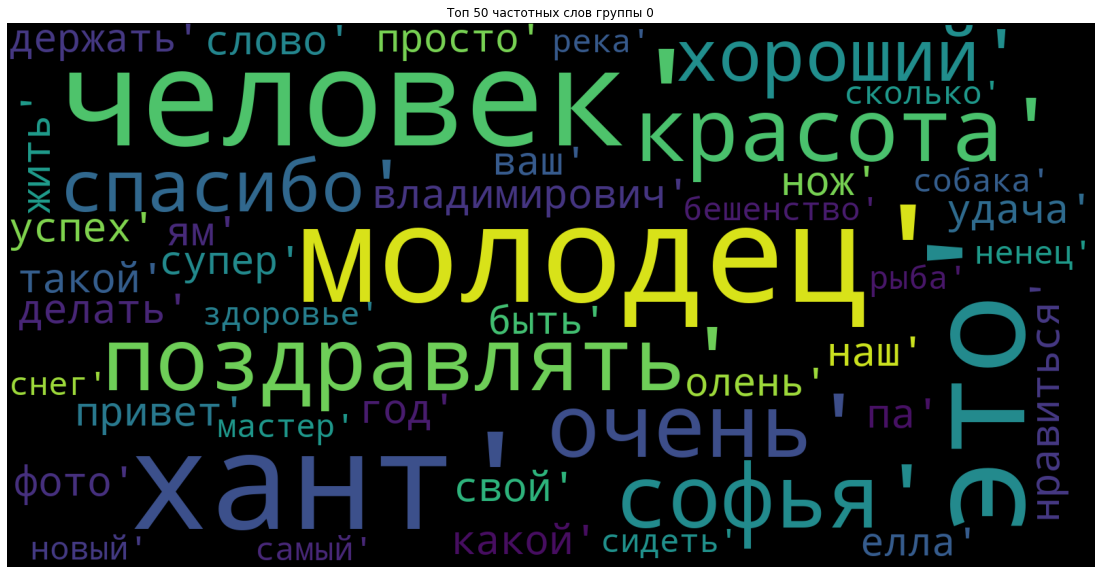

In [363]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_comments2_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

###### Группа 3

In [364]:
df_comments_3['comments']

14                                приятный аппетит 😋 ням
24     🙏🙏🙏 она сынок мама заменить держаться искренне...
26     👍😊 аааа вкуснятина 😆😆😆😆 че огурчик 😄 класс ням...
30     👍👍👍👍 это лайк молодец везти считаться член сем...
31                                          почему жилет
38     игорь дом видеть собака игрушка охрана собака ...
41     почему снимок 😱🙉 работать парень некогда весна...
56     настоящий мужчина хант чётко чижик дернит 🤣👍во...
62     👍👍👍👍 самый счастливый край это наш родный серд...
65     норма контент вк🙂 двой сель тяжело оленям😐 оче...
66     снегоход огонь👍 вк отсталый сидеть пытаться вд...
82                                       дневние дневник
88                       героизм шенгк ям ма такан аматс
91     хант ху муй верна ант хошалый ёшалый тус номпс...
98               тувхула иси ям хула мохсанга юкан пойти
106    привет это водопад красиво чистый вода мой люб...
108                                           вкуснятина
112          спасибо сергей под

In [365]:
comments3_as_str = ''

In [366]:
for index, row in df_comments_3.iterrows(): 
    comments3_as_str = comments3_as_str + str(row['comments']) + ' '

При помощи регулярных выражений удалим лишние символы


In [367]:
comments3_as_str = re.sub('[,—\'\[\]]', '', comments3_as_str)
comments3_as_str

'приятный аппетит 😋 ням 🙏🙏🙏 она сынок мама заменить держаться искренне жаль прививать пёсик год обязательно😭 твой друг белый яр приют видеть плохой лайк успеть убить один мы прийти бросаться человек бешенный жаль ваш друг уверить появиться друг ничуть плохой очень жаль ой жалко думать чёрный погибнуть этот привыкнуть жа аль 😢 👍😊 аааа вкуснятина 😆😆😆😆 че огурчик 😄 класс ням ням хотеть вкуснятинку👍 лук вообще класс пду классный перекус селькуп также готовить рыба чопёс чопёс сделать случиться 👍👍👍👍 это лайк молодец везти считаться член семья прывыкать погибнуть жалко здоровье пёсик 🙏 везти везти ампа лаять большой зверь волк прислать стойбище олень правда один шавка залаять испугаться волк просто мимо пройти ночью утро след видеть почему жилет игорь дом видеть собака игрушка охрана собака мучить использовать дело почему снимок 😱🙉 работать парень некогда весна столько забота настоящий мужчина хант чётко чижик дернит 🤣👍вот оленевод отлично 👍👍👍 щикем ям 👍👍👍👍👍 внутри кисова почему дарнит смеят

Составим "словарь" из 50 наиболее частотных слов


In [368]:
comments3_tokens = word_tokenize(comments3_as_str)
comments3_text = nltk.Text(comments3_tokens)
fdist_comments3 = FreqDist(comments3_text)
fdist_comments3_most_c = fdist_comments3.most_common(50)

Визуализируем облако частотных слов


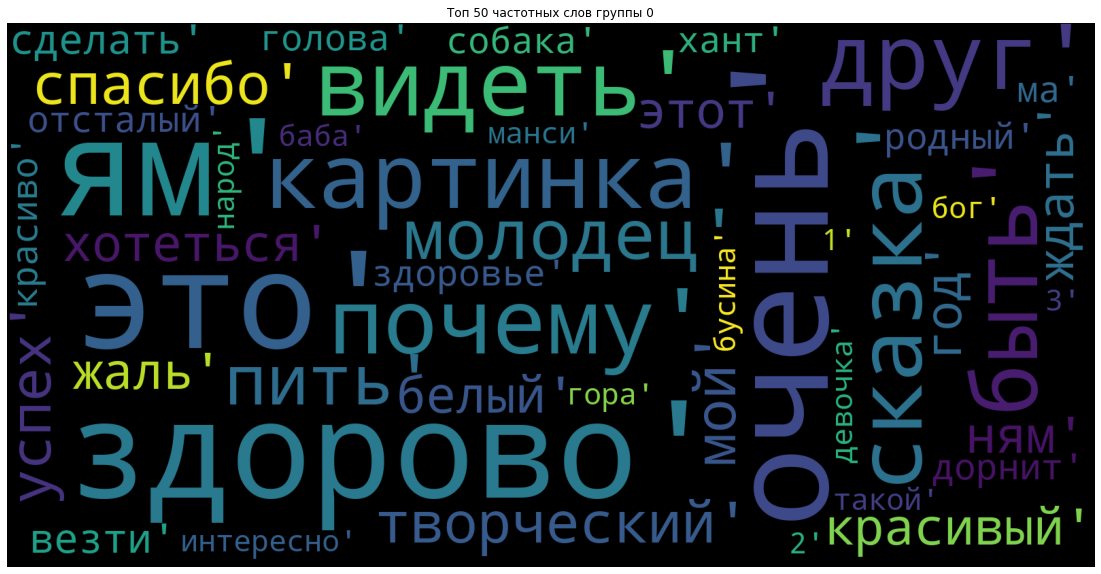

In [369]:
# Создаем текст для облака частотных слова
text_wordcloud= ' '.join(map(str, fdist_comments3_most_c)) 
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100,background_color="black", collocations=True).generate(text_wordcloud)

# Визуализация 
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Топ 50 частотных слов группы 0')
plt.axis("off")
plt.show()

## NER

In [8]:
df = pd.read_csv('/content/df.csv')

In [9]:
df

from_id   owner_id                                     domain  \
0    -106097095 -106097095  https://vk.com/feed?w=wall-106097095_1001   
1    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_999   
2    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_998   
3    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_997   
4    -106097095 -106097095   https://vk.com/feed?w=wall-106097095_996   
...         ...        ...                                        ...   
1795  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_381   
1796  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_380   
1797  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_378   
1798  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_377   
1799  -96479998  -96479998    https://vk.com/feed?w=wall-96479998_376   

                     date                                               text  \
0     2022-10-10 05:20:00  Наши коллеги, [club535572|молодые парламентари...   
1     2022-09-27 06:11:23                                                NaN   
2     2022-09-22 12:17:36                                                NaN   
3     2022-09-06 05:34:14                                                NaN   
4     2022-08-31 06:13:48  У нас отличная новость! [club35608492|Молодые ...   
...                   ...                                                ...   
1795  2020-11-16 19:12:58                                                NaN   
1796  2020-11-10 17:57:30                                                NaN   
1797  2020-11-07 16:36:22                                                NaN   
1798  2020-11-01 06:53:13                                                NaN   
1799  2020-10-30 13:48:09                                                NaN   

                                              copy_text            copy_date  \
0                                                   NaN                  NaN   
1     Молодым парламентариям Курганской области - 10...  2022-09-27 04:45:00   
2     Сегодня в рамках проекта «Интерактивные встреч...  2022-09-16 11:00:03   
3     Неделю назад получили президентский грант на п...  2022-09-06 05:24:04   
4                                                   NaN                  NaN   
...                                                 ...                  ...   
1795  Акция " Бабушкина акань"  Участник - Михляева ...  2020-11-16 15:00:28   
1796  По линиям судьбы в точку пересечения 💫  Медвеж...  2020-11-10 10:00:03   
1797  Акция "Бабушкина акань" Участник - Фирсова Ири...  2020-11-07 07:57:50   
1798  Новосибирские этнографы показали интересные на...  2020-11-01 05:00:08   
1799  Art Challenge. День 29  Тема - обувь.  #экспон...  2020-10-29 17:29:43   

      likes_count  comments_count  reposts  views  \
0              20               0        1    266   
1              10               0        1    169   
2               1               0        1    108   
3              15               0        0    150   
4              39               0        3    714   
...           ...             ...      ...    ...   
1795            3               0        0    167   
1796            9               0        3    198   
1797            4               0        0    168   
1798            7               0        0    208   
1799            2               0        0    175   

                                                 likers comments commentators  
0     4810511,11807114,9026440,44981958,12143479,212...      NaN          NaN  
1     171380505,296234332,51998297,25752544,93463818...      NaN          NaN  
2                                              19345804      NaN          NaN  
3     171380505,8134498,19345804,77370660,106923760,...      NaN          NaN  
4     171380505,824871,1738121,4810511,8134498,11138...      NaN          NaN  
...                                                 ...      ...          ...  
1795        

### Text

In [10]:
df['text'] = df['text'].fillna('0')

In [11]:
df_text = df[df['text'] != '0']

In [12]:
pipe = stanza.Pipeline(lang='ru', processors='tokenize,ner', package={'ner':'wikiner'})

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| ner       | wikiner   |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [13]:
docs = df_text.head(4)

In [21]:
#def use_pipe():
#  doc = pipe(docs['text'][0])
docs['pipe'] = docs['text'].apply(lambda x: pipe(x[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
docs['pipe'][0]

[
  [
    {
      "id": 1,
      "text": "Н",
      "start_char": 0,
      "end_char": 1,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    }
  ]
]

In [ ]:
doc = pipe(docs['text'][0])

In [477]:
a = pd.DataFrame(columns=['text', 'count'])

In [483]:
len(doc.ents)

58

In [513]:
a

text count
0     0     0
1     0     0
2     0     0
3     0     0
4     0     0
5     0     0
6     0     0
7     0     0
8     0     0
9     0     0
10    0     0
11    0     0
12    0     0
13    0     0
14    0     0
15    0     0
16    0     0
17    0     0
18    0     0
19    0     0
20    0     0
21    0     0
22    0     0
23    0     0
24    0     0
25    0     0
26    0     0
27    0     0
28    0     0
29    0     0
30    0     0
31    0     0
32    0     0
33    0     0
34    0     0
35    0     0
36    0     0
37    0     0
38    0     0
39    0     0
40    0     0
41    0     0
42    0     0
43    0     0
44    0     0
45    0     0
46    0     0
47    0     0
48    0     0
49    0     0
50    0     0
51    0     0
52    0     0
53    0     0
54    0     0
55    0     0
56    0     0
57    0     0

In [512]:
for i in range(len(doc.ents)):
  a = a.append(pd.Series({'text' : '0', 'count' : 0}), ignore_index=True)

In [517]:
a['text'][0]

'0'

In [518]:
for i in range(len(doc.ents)):
  a['text'][i] = doc.ents[i].text

In [519]:
a

text count
0                                               Югры]     0
1                         Великой Отечественной войны     0
2                                           Думе Югры     0
3                                      Северный фронт     0
4                                             Победы!     0
5                         Великой Отечественной войны     0
6                Ханты-Мансийского автономного округа     0
7                                                Югры     0
8                       Гавриилы Епифановича Собянина     0
9                       Николая Дмитриевича Мултанова     0
10                                    Гавриил Собянин     0
11                                         Шайтановка     0
12                                  Чердынского уезда     0
13                                   Пермской области     0
14  Берёзовский район Омской (ныне Тюменской) области     0
15                                 Гавриил Епифанович     0
16                                    I Мировой войне     0
17                        Великая Отечественная война     0
18  48 Ропшинской Краснознаменной дивизии имени М....     0
19                         2-го Прибалтийского фронта     0
20                           орденом Красного Знамени     0
21                               медалями «За отвагу»     0
22                                «За боевые заслуги»     0
23                                            Гарозас     0
24                                   Либавского уезда     0
25   Латвийской Советской Социалистической Республики     0
26                                  Гавриилу Собянину     0
27                             Героя Советского Союза     0
28                                      Ордена Ленина     0
29                            медали «Золотая Звезда»     0
30                                   Николай Мултанов     0
31                                              Казым     0
32                        Великой Отечественной войны     0
33                                        Русскинская     0
34                                              Крыму     0
35                                 Николай Дмитриевич     0
36                                              Омска     0
37                                             Родину     0
38                                             Победы     0
39                                    Марфе Кечимовой     0
40                                               Югры     0
41                        Великой Отечественной войны     0
42                                               Югры     0
43                                   Ринат Халилуллин     0
44  Президентского фонда культурных инициатив и ли...     0
45               Молодежного парламента при Думе Югры     0
46                                «#Победаоднанавсех»     0
47                                     «Чемпионы Югры     0
48                                   «Война народная»     0
49                            МолодёжныйпарламентЮгры     0
50                                         ЮграОнлайн     0
51                                               Югра     0
52                                               ХМАО     0
53                                               МП86     0
54                                       ЮграТебеИдёт     0
55                                       РусскийЦентр     0
56                                              МПДНР     0
57              СвоихНеБросаем #ZаМир #ZаПравду #кино     0

In [26]:
a = pd.DataFrame(columns=['text', 'count'])

In [29]:
for i, row in docs.iterrows():
  doc = pipe(docs['text'][0])

  for i in range(len(doc.ents)):
    a = a.append(pd.Series({'text' : doc.ents[i].text, 'count' : 0}), ignore_index=True)

In [30]:
a

text count
0                                    Югры]     0
1              Великой Отечественной войны     0
2                                Думе Югры     0
3                           Северный фронт     0
4                                  Победы!     0
..                                     ...   ...
227                                   МП86     0
228                           ЮграТебеИдёт     0
229                           РусскийЦентр     0
230                                  МПДНР     0
231  СвоихНеБросаем #ZаМир #ZаПравду #кино     0

[232 rows x 2 columns]

In [31]:
ner = pd.DataFrame(columns=['text', 'count'])

In [32]:
for i, row in df_text.iterrows():
  doc = pipe(docs['text'][0])

  for i in range(len(doc.ents)):
    ner = ner.append(pd.Series({'text' : doc.ents[i].text, 'count' : 0}), ignore_index=True)

In [33]:
ner.to_csv('ner.csv', index = False)

In [34]:
ner = pd.read_csv('ner.csv')

In [35]:
ner

text  count
0                                      Югры]      0
1                Великой Отечественной войны      0
2                                  Думе Югры      0
3                             Северный фронт      0
4                                    Победы!      0
...                                      ...    ...
47265                                   МП86      0
47266                           ЮграТебеИдёт      0
47267                           РусскийЦентр      0
47268                                  МПДНР      0
47269  СвоихНеБросаем #ZаМир #ZаПравду #кино      0

[47270 rows x 2 columns]

In [36]:
ner.value_counts()

text                                                        count
Великой Отечественной войны                                 0        3260
Югры                                                        0        2445
2-го Прибалтийского фронта                                  0         815
СвоихНеБросаем #ZаМир #ZаПравду #кино                       0         815
Омска                                                       0         815
Ордена Ленина                                               0         815
Пермской области                                            0         815
Победы                                                      0         815
Победы!                                                     0         815
Президентского фонда культурных инициатив и личных средств  0         815
Ринат Халилуллин                                            0         815
Родину                                                      0         815
РусскийЦентр                                  